# Fetus Brain Detection

2024-05-27 16:46:39.601061: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 16:46:39.645538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/autofs/space/bal_004/users/jd1677/singularity-images/tensorflow_2.13.0-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Issue loading cv2
2024-05-27 16:46:50.914547: I tensorflow/core/c

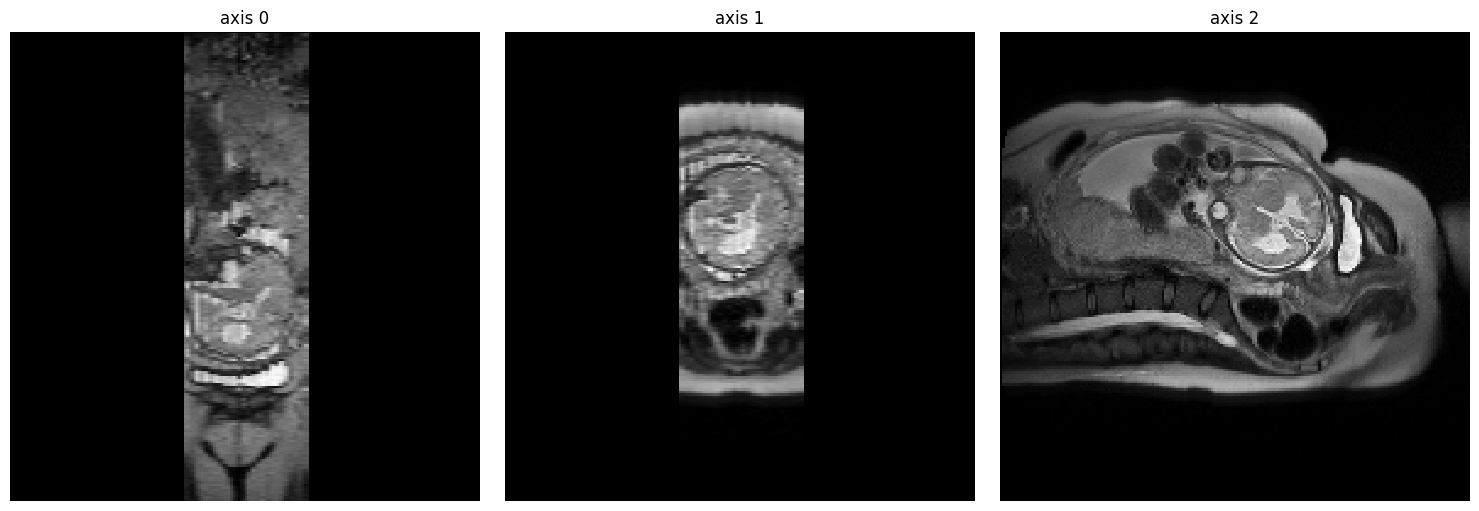

In [1]:
import tensorflow as tf
import numpy as np
from utils import *
import param_3d
import data
import model_3d
from data_3d import *

image_mask_pairs = load_validation_data("validation",192)
a, b = image_mask_pairs[0]

mean_slice_numbers = tuple(np.median(indices) for indices in np.where(b != 0))
ne.plot.volume3D(a,slice_nos=mean_slice_numbers);

In [93]:
positions, indices = generate_position_map((192,192,192), 12, 4)
input_volume = a[None, ..., None]


labels=generate_labels((192,192,192), positions, indices, 12, 4, b)
fragments = extract_fragments(input_volume, positions, 12)

# i=0
# train_indx = []
print("here")
train_data = [] 
train_labels = [] 
i = 0
for label in labels:
    if label == 1:
        x_db_calib = load_db_calib_train_from_generator(positions[i], b, dim=12) 
        new_label = convert_to_binary_vector(x_db_calib)
        train_data.append(fragments[i])
        train_labels.append(new_label)
    i += 1

# Convert lists to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

print("second")

# Initialize and compile the model
model = Calibration3DNet(num_classes=135)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fragments = np.array(fragments)
model.fit(train_data, train_labels, epochs=10, batch_size=32)
# Train the model

here
second
Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 60652.7461 - accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 1567370.1250 - accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 13559091.0000 - accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 65894376.0000 - accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 232915696.0000 - accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 656651648.0000 - accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 1594293120.0000 - accuracy: 0.0000e+00
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 3427672576.0000 - accuracy: 0.0000e+00
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 6834379776.0000 - accuracy: 0.0000e+00
Epoch 10/10
6/6 [====

In [92]:
train_labels.shape

(1, 135)

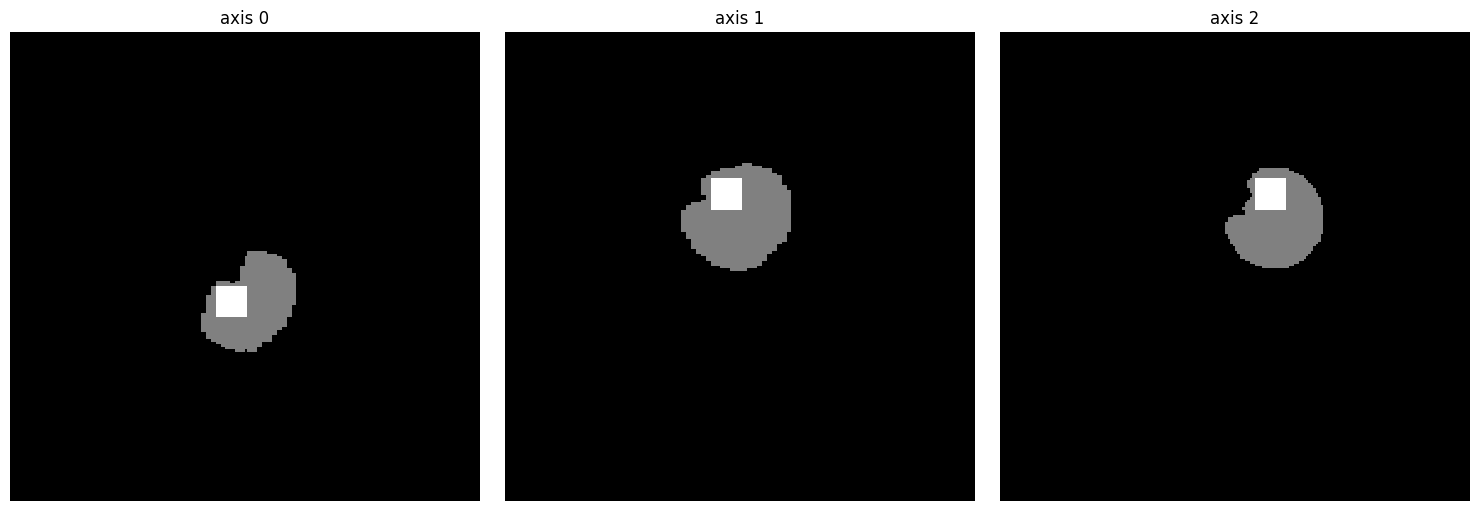

1.0


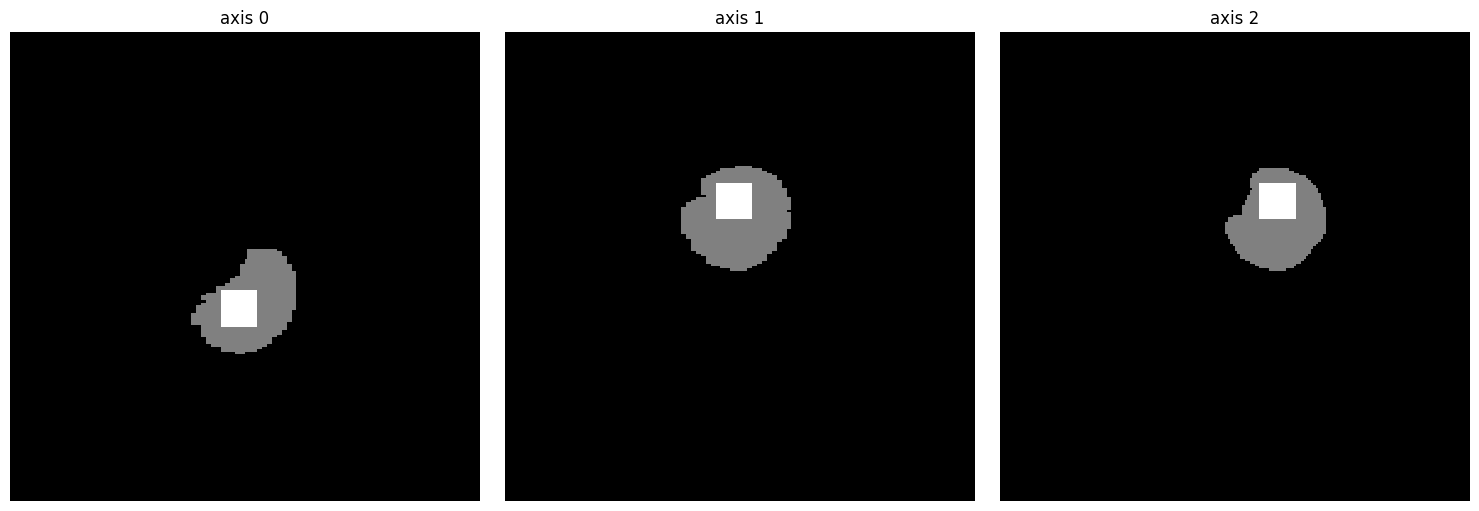

1.0


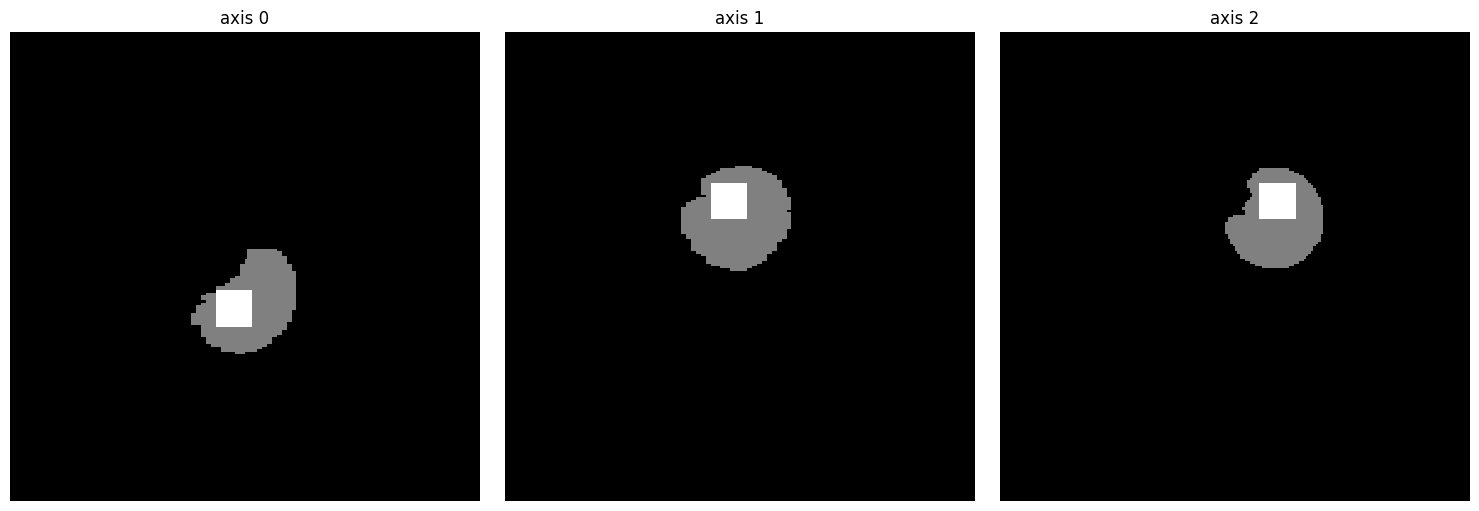

0.9956268221574344


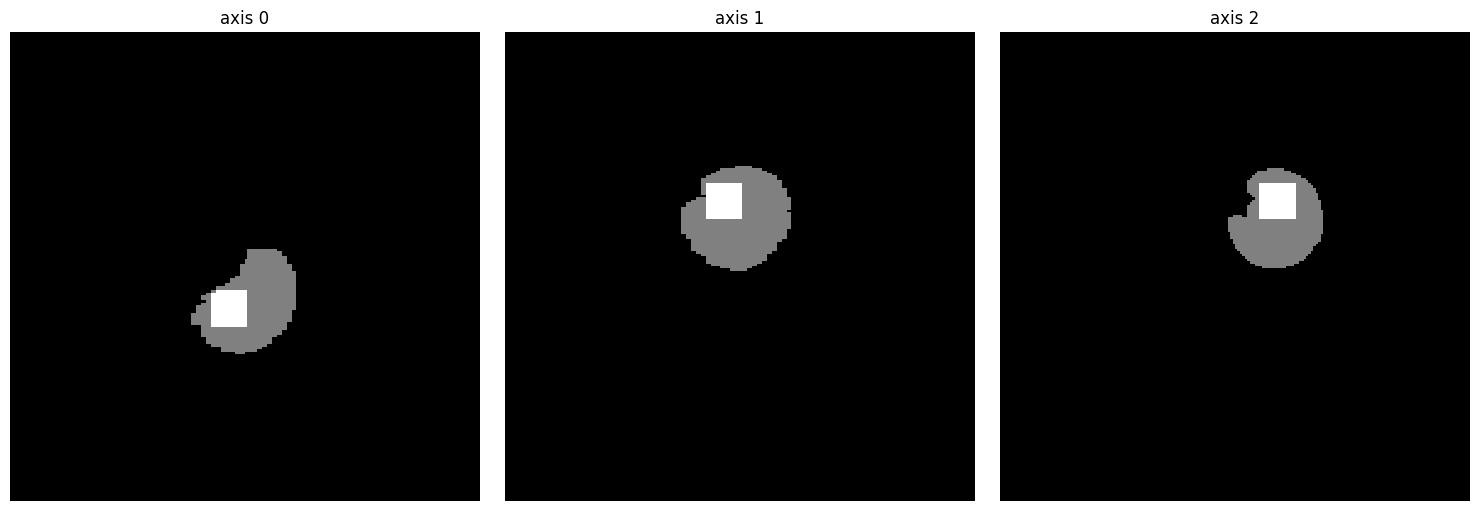

0.9978134110787172


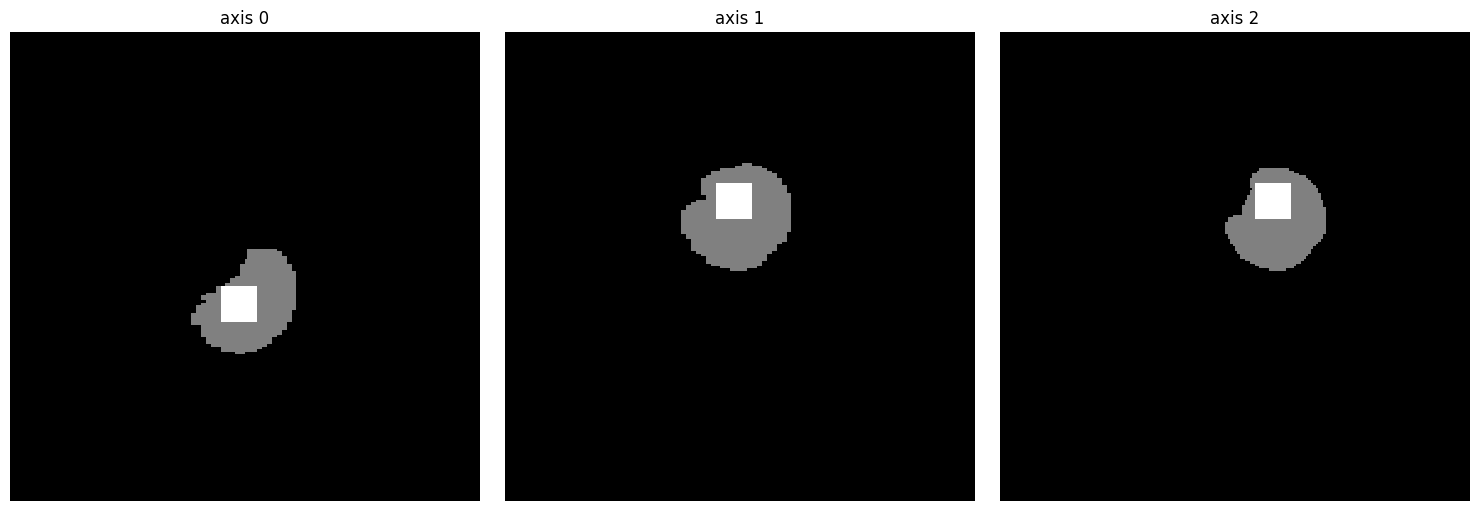

0.9970845481049563


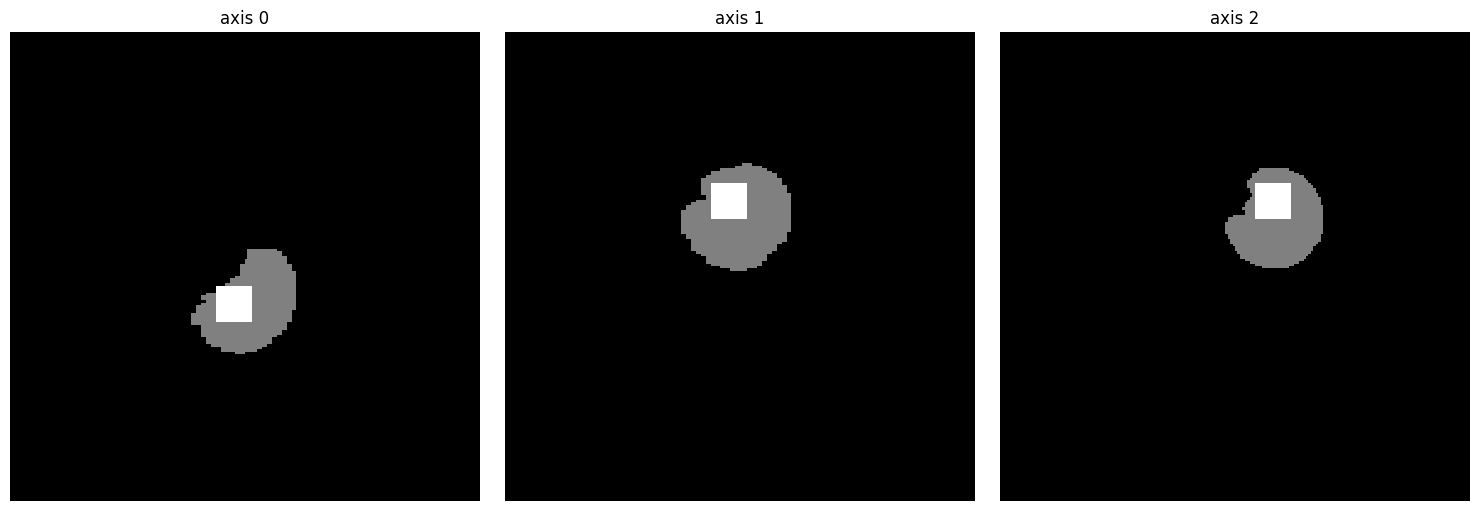

0.9876093294460642


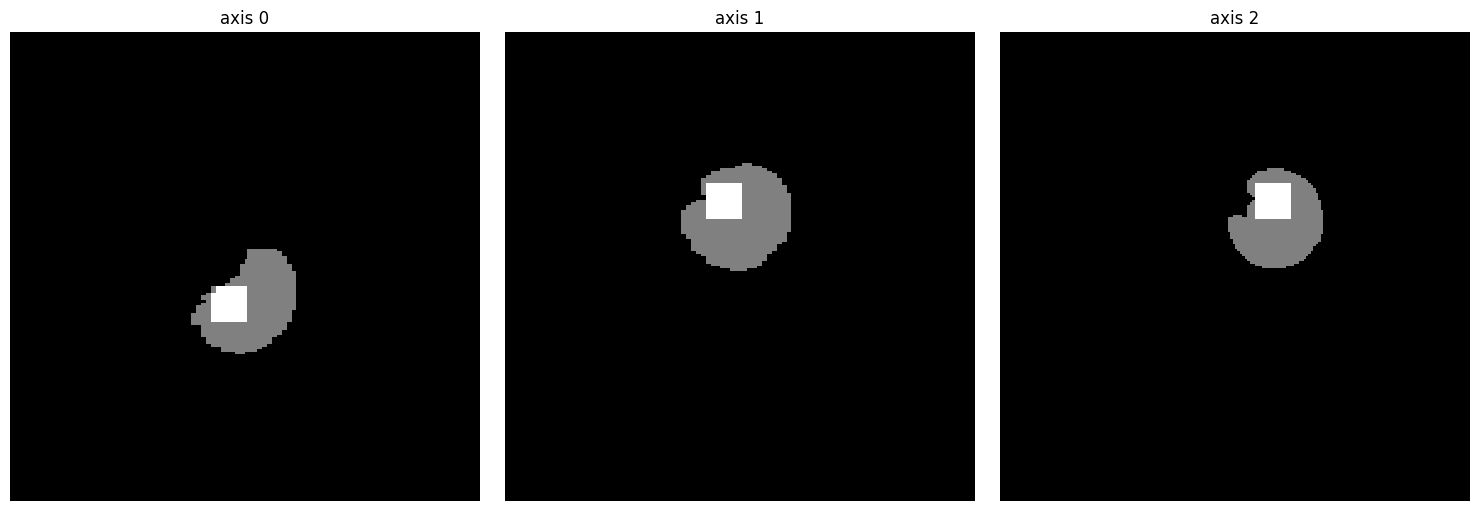

0.9817784256559767


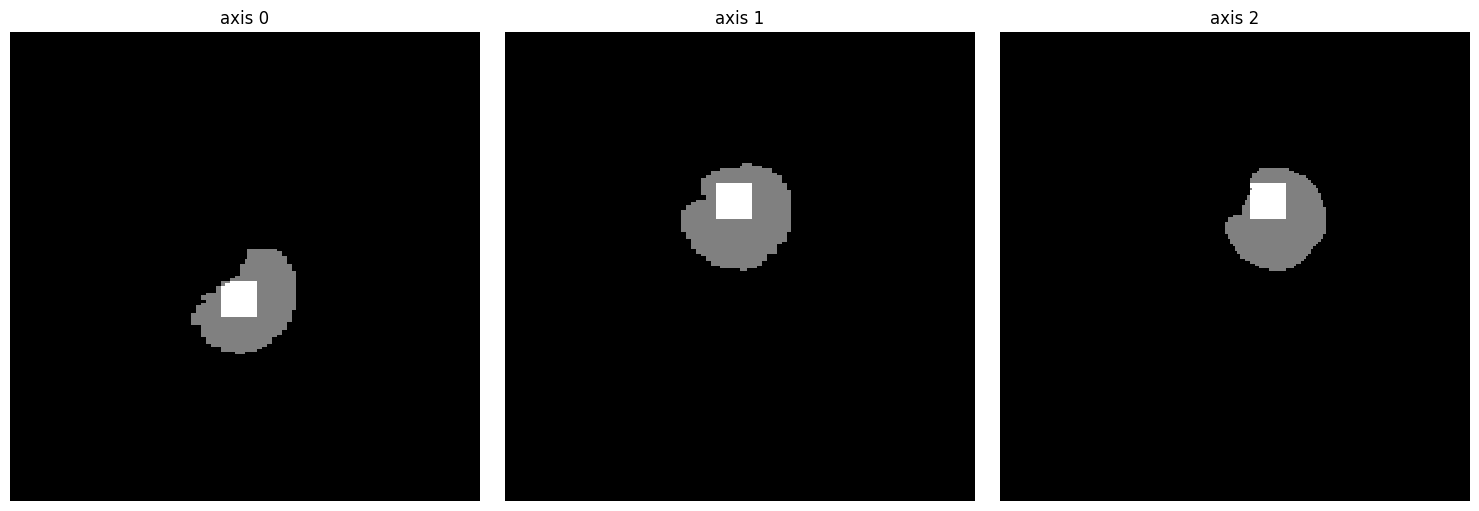

0.9730320699708455


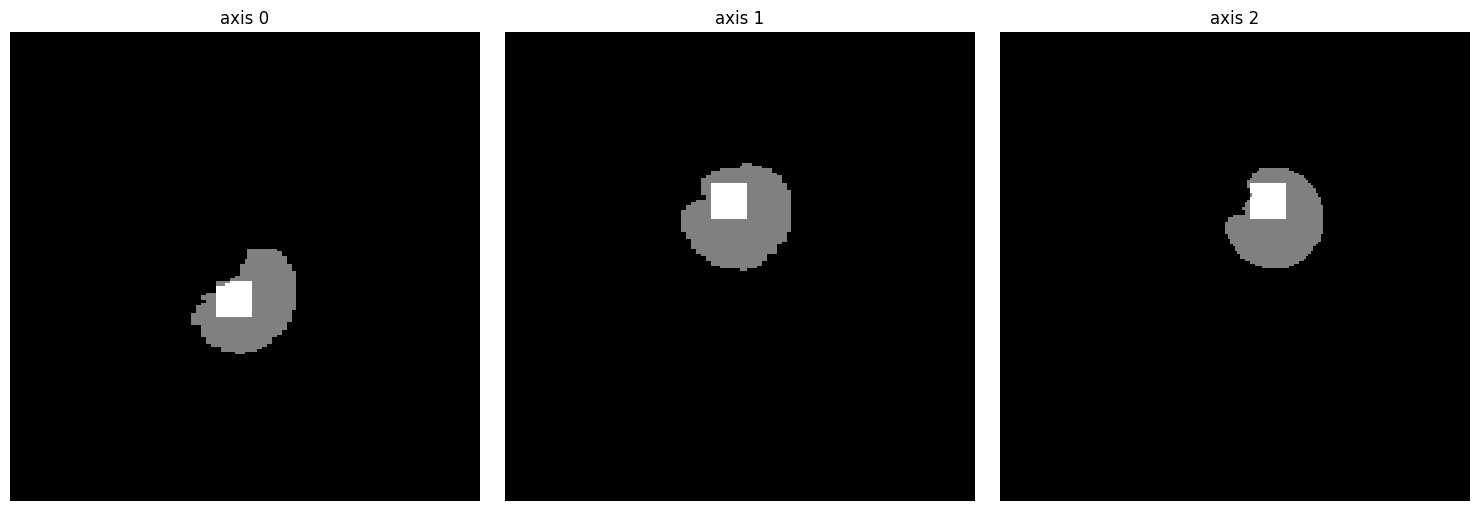

0.9489795918367347


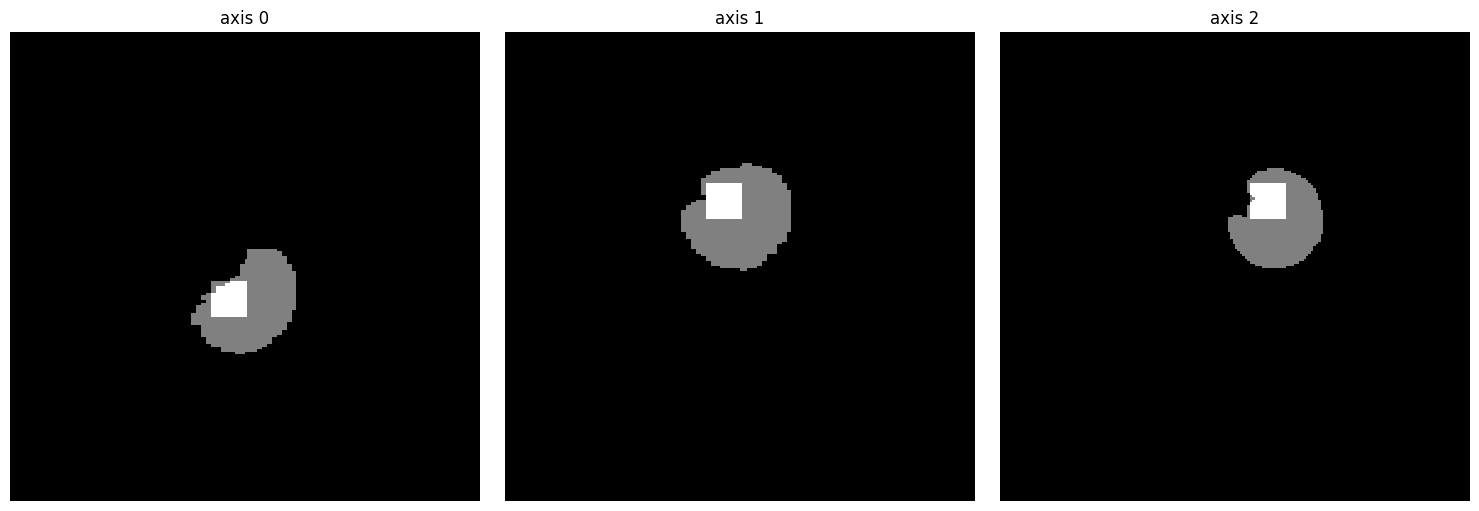

1.0


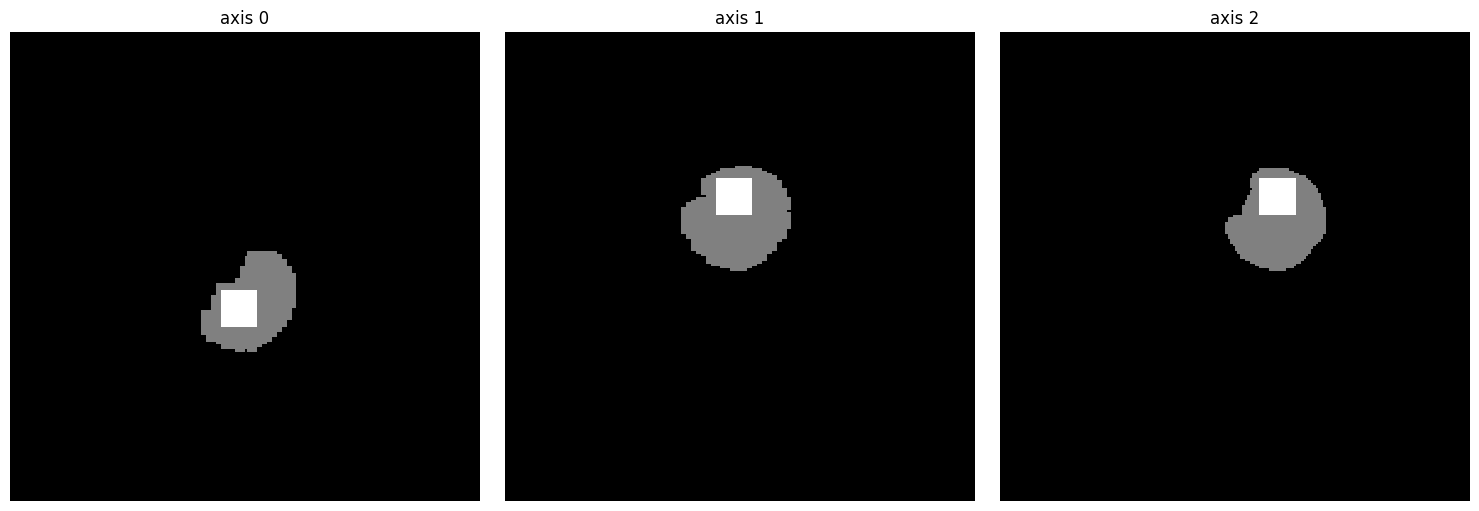

1.0


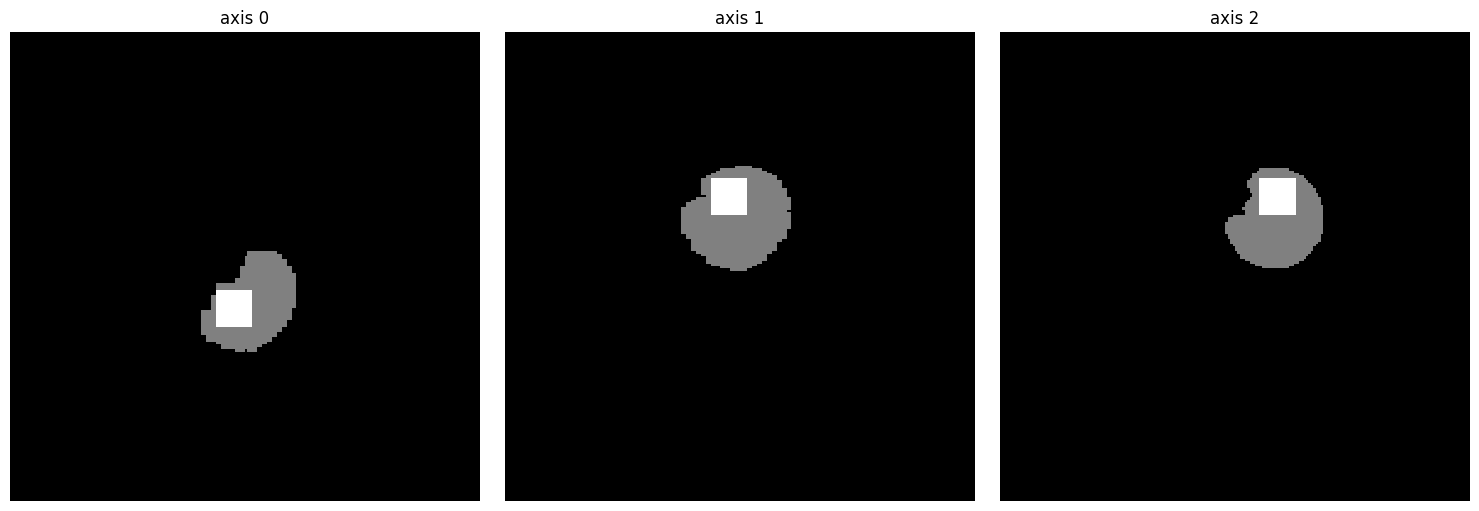

0.9956268221574344


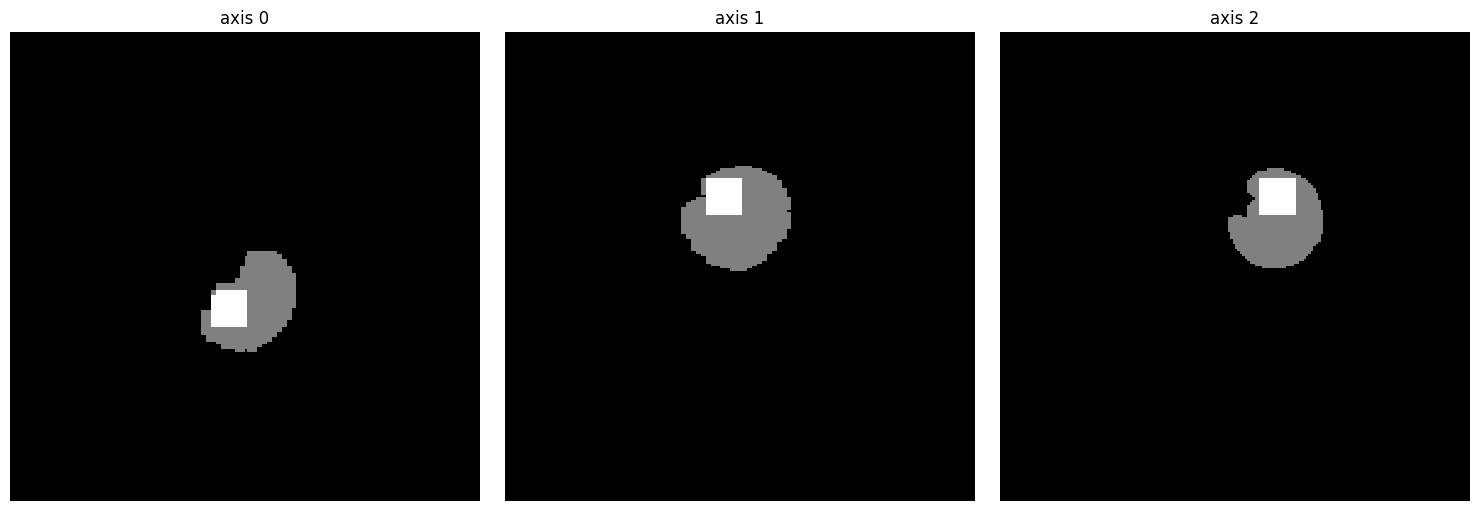

0.9978134110787172


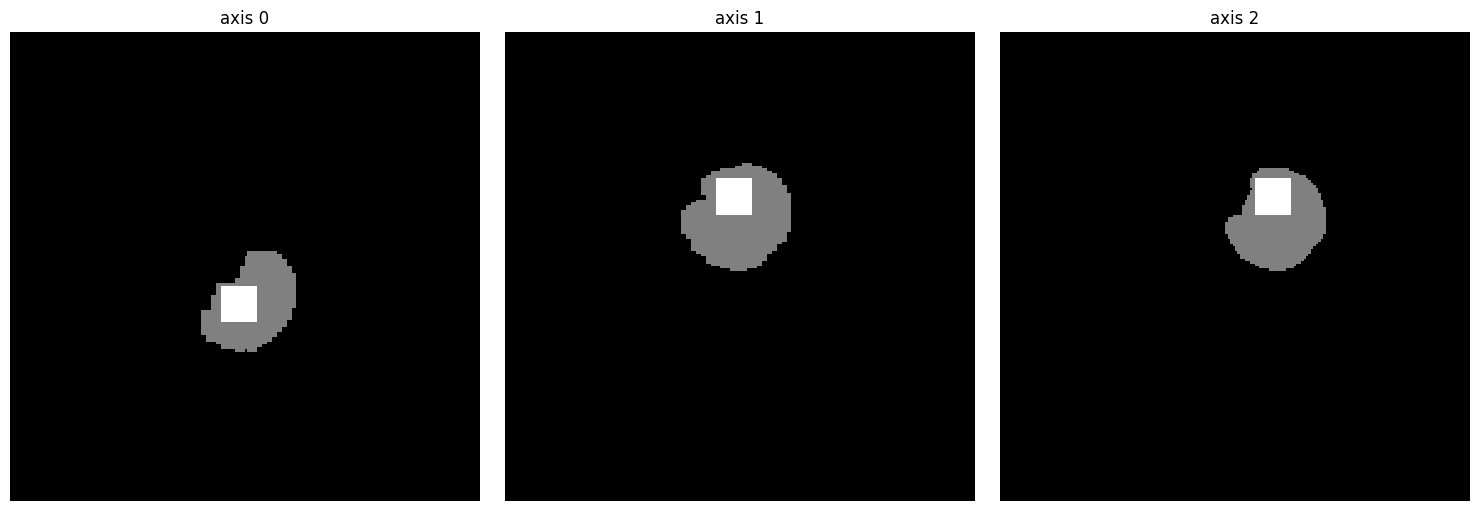

0.9970845481049563


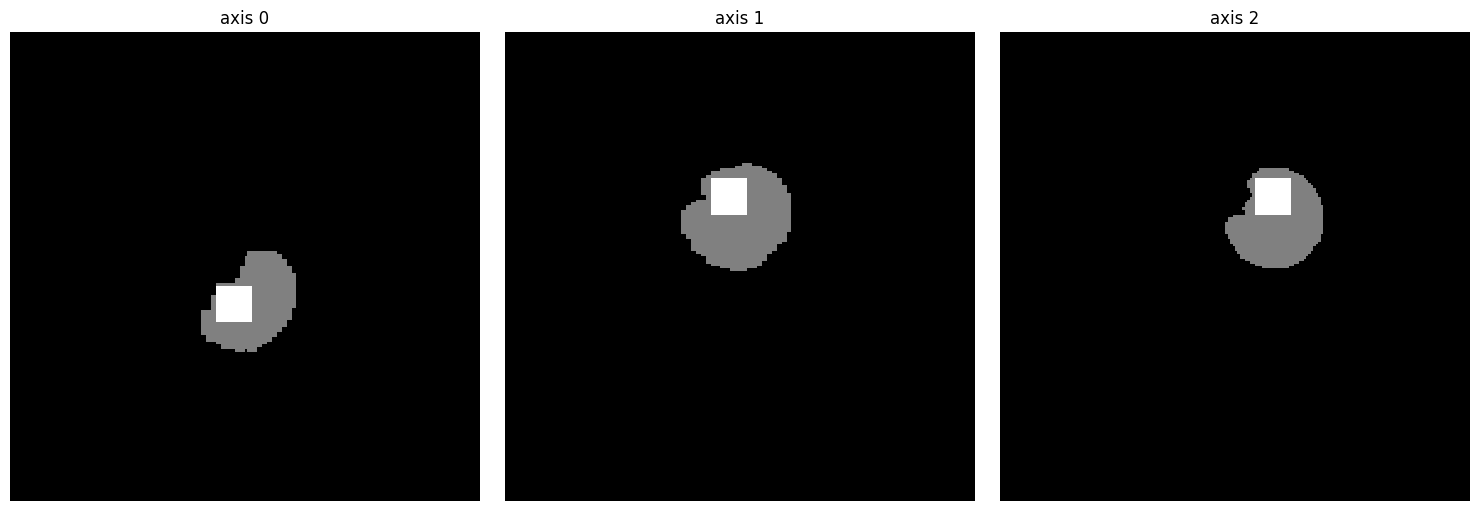

0.9868804664723032


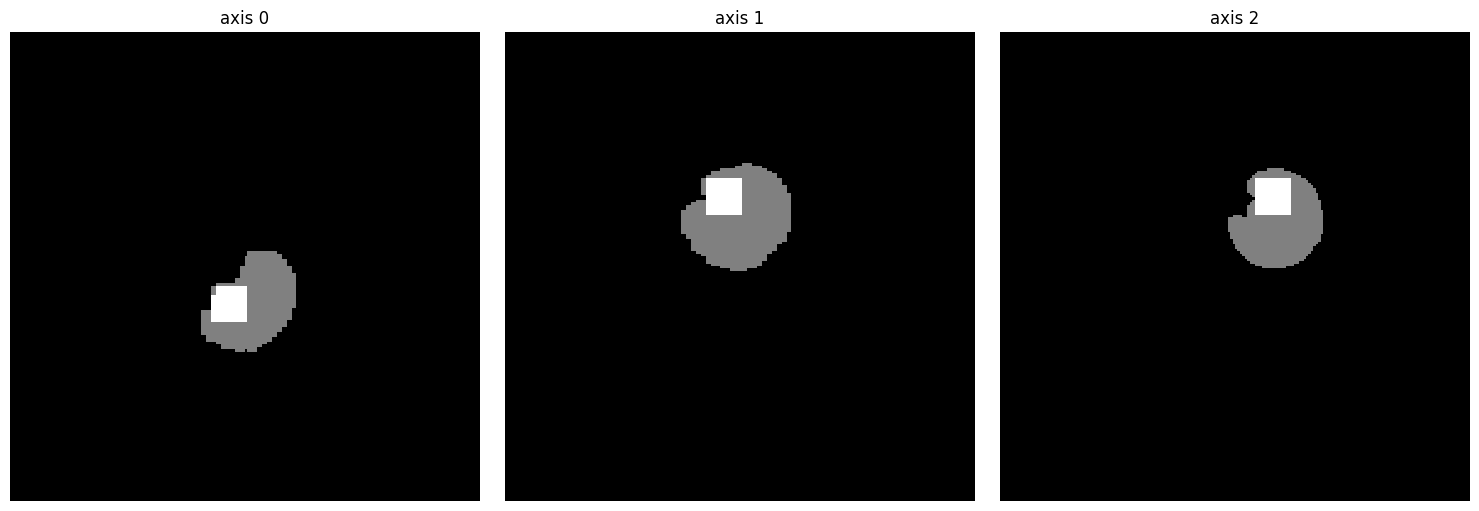

0.9825072886297376


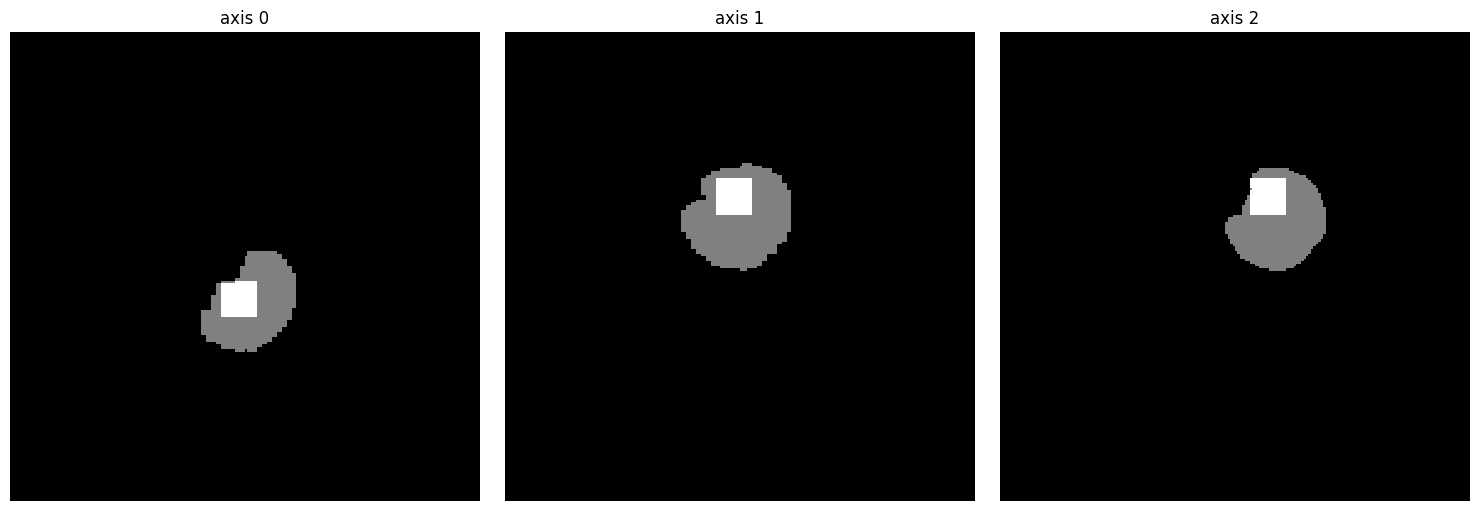

0.9730320699708455


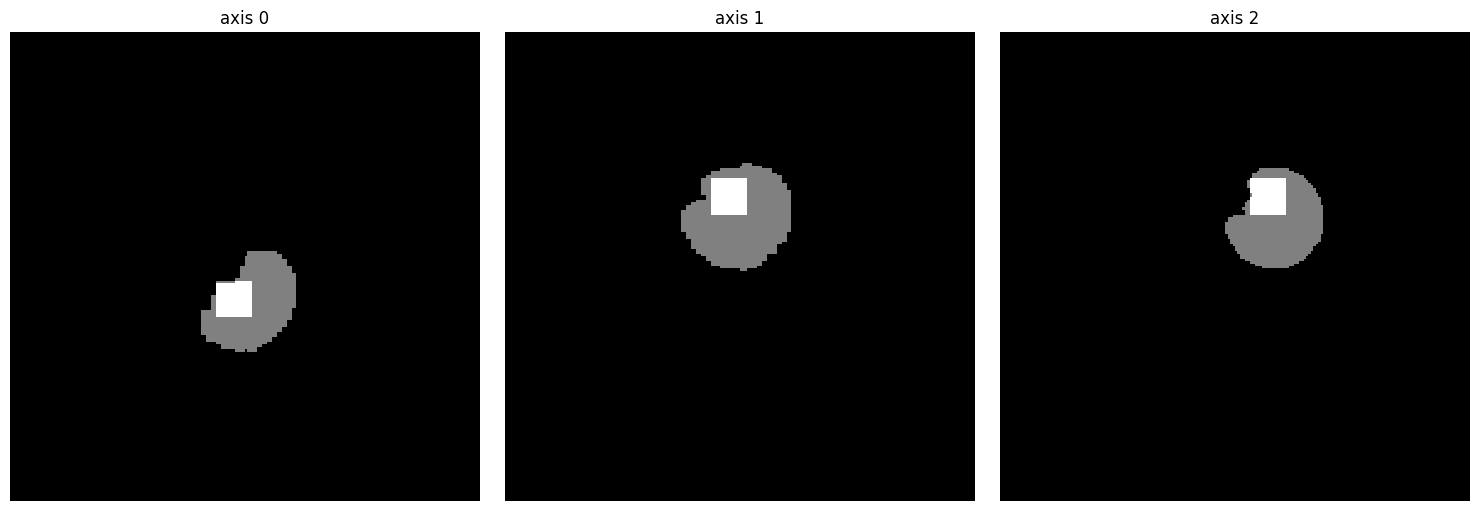

0.9453352769679301


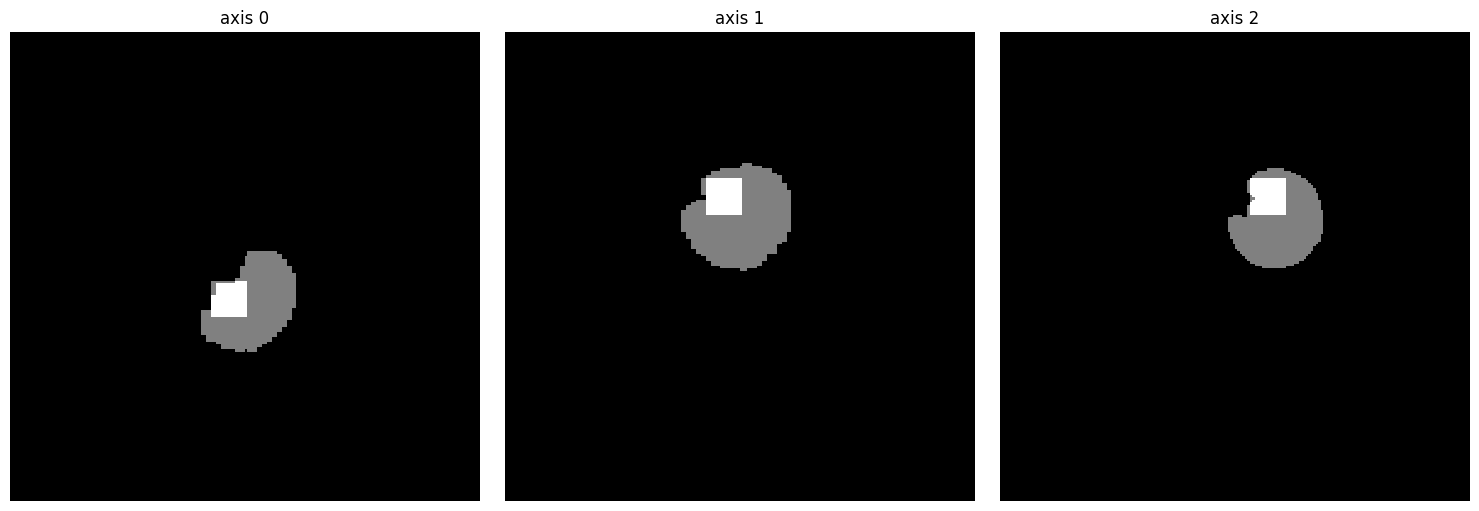

1.0


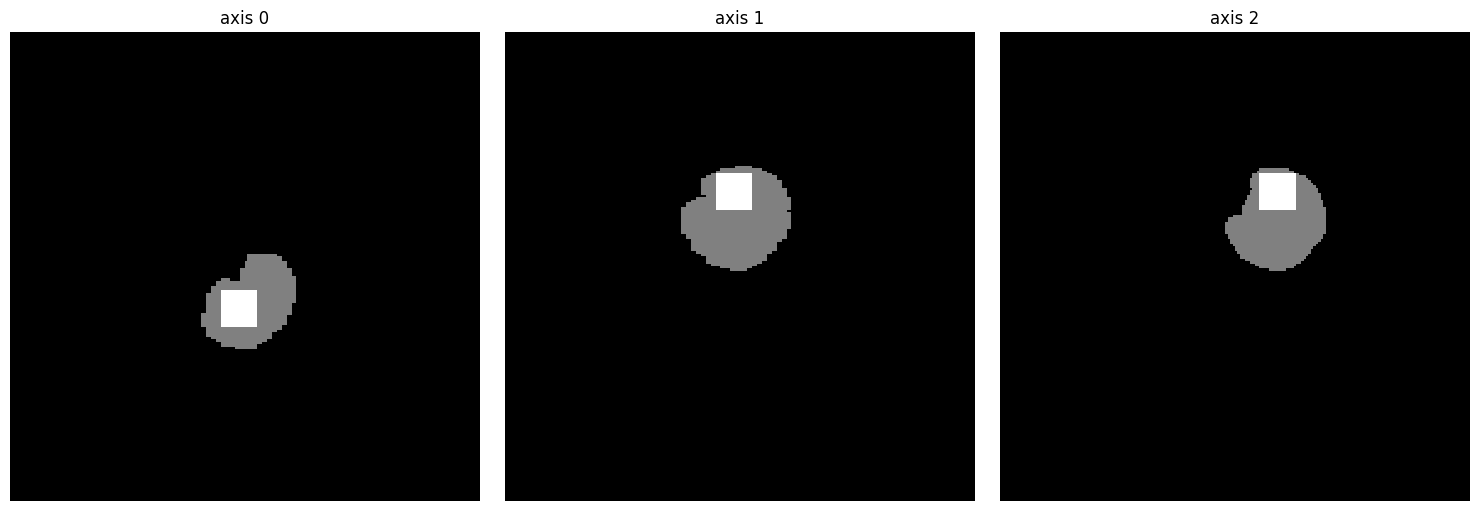

0.9978134110787172


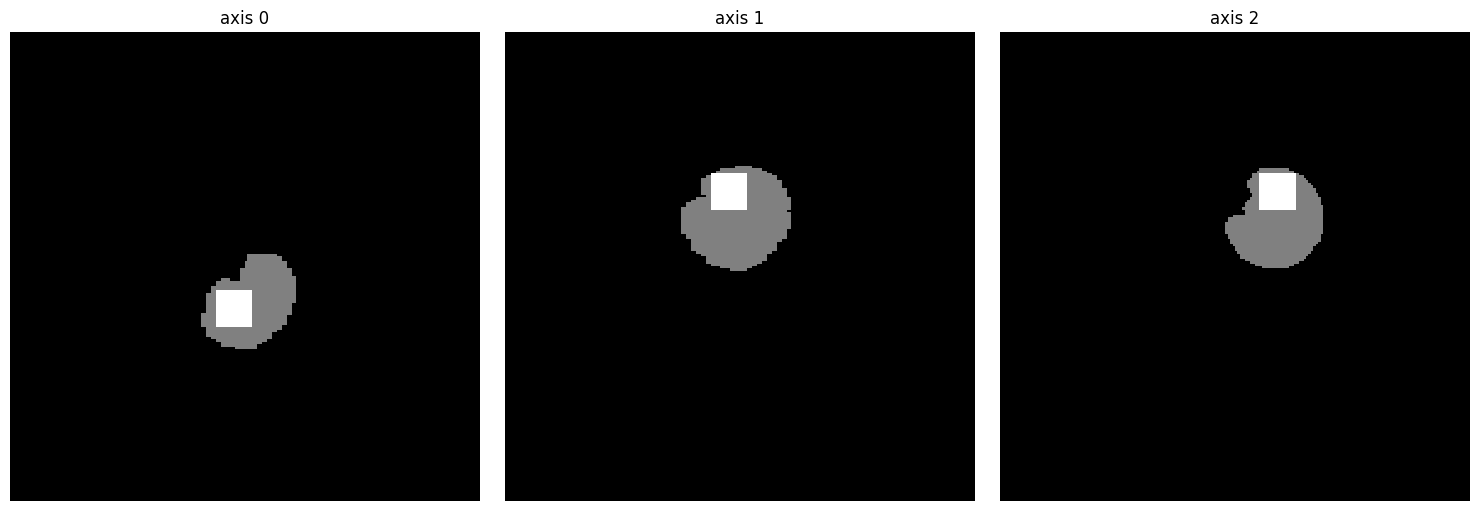

0.9795918367346939


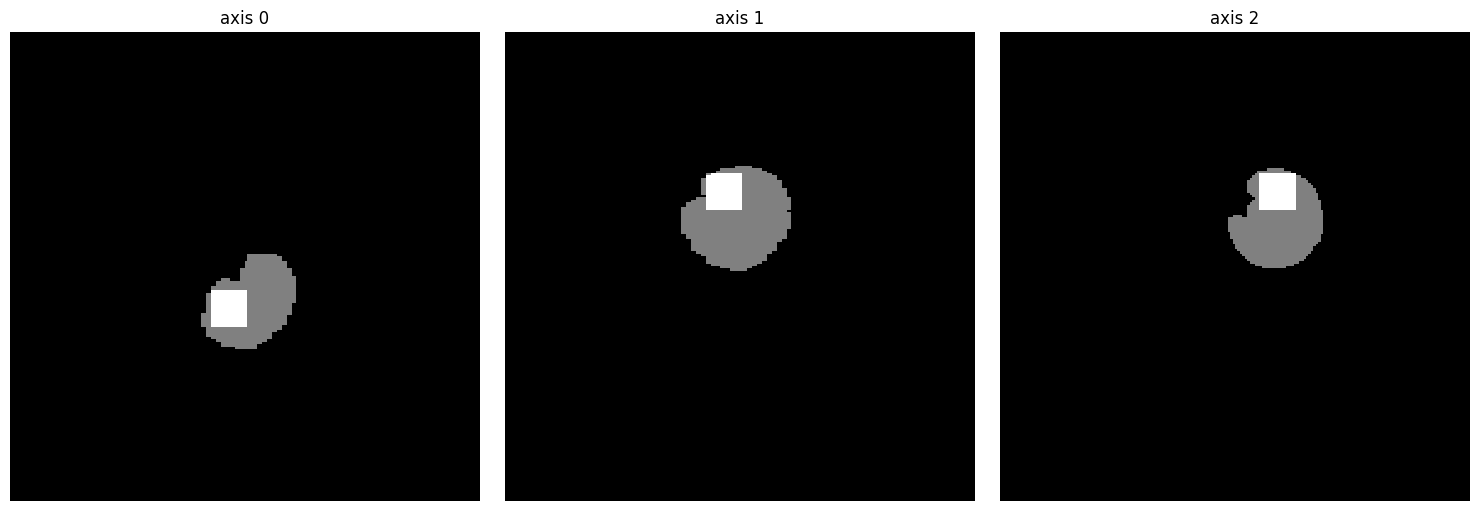

0.9978134110787172


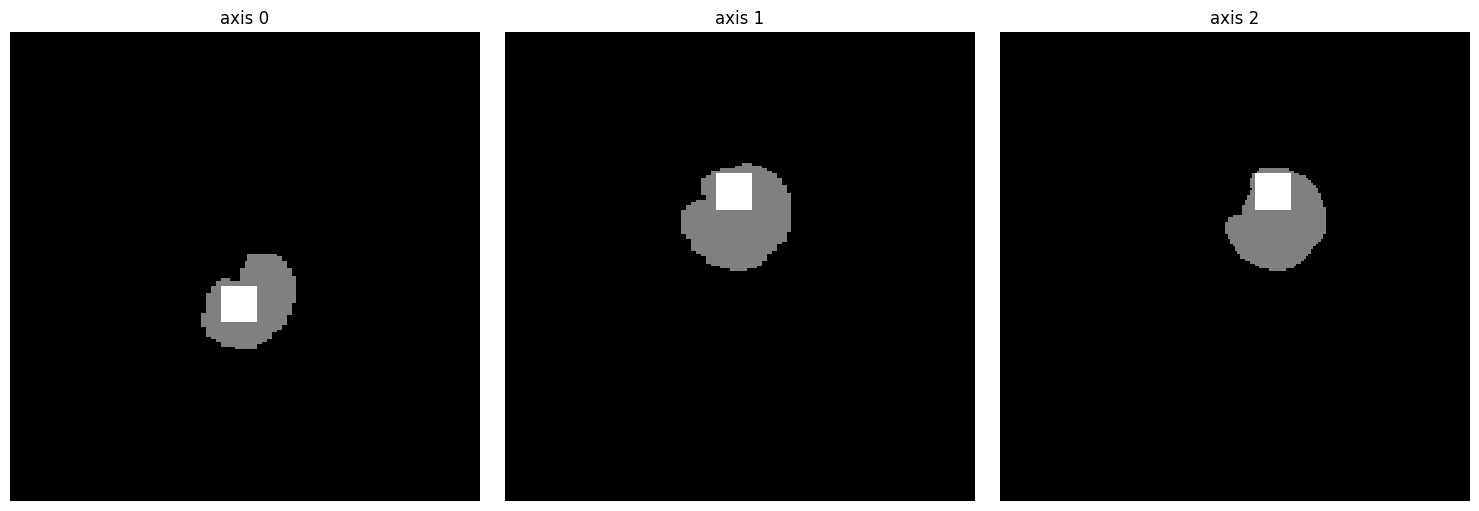

0.9941690962099126


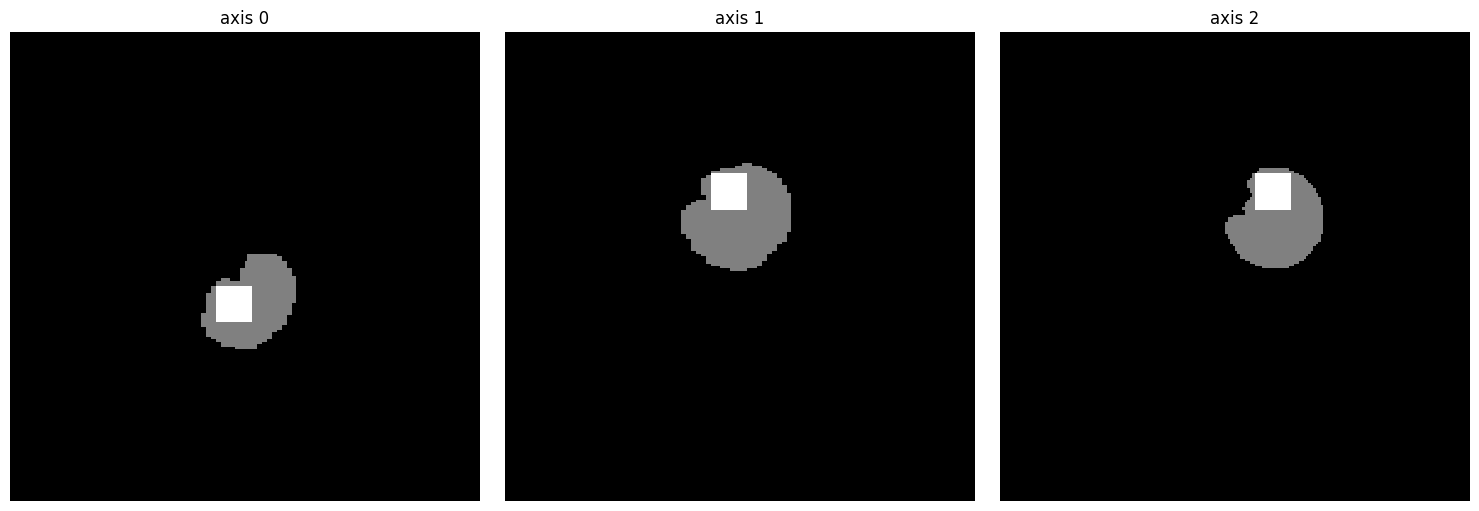

0.9701166180758017


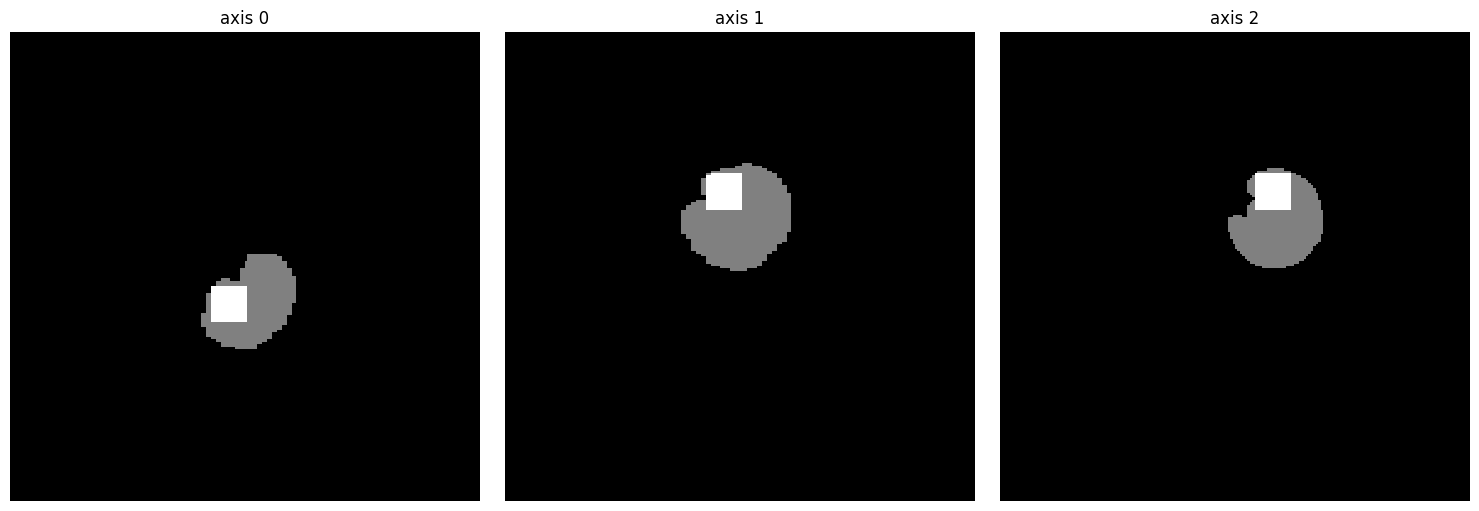

0.9766763848396501


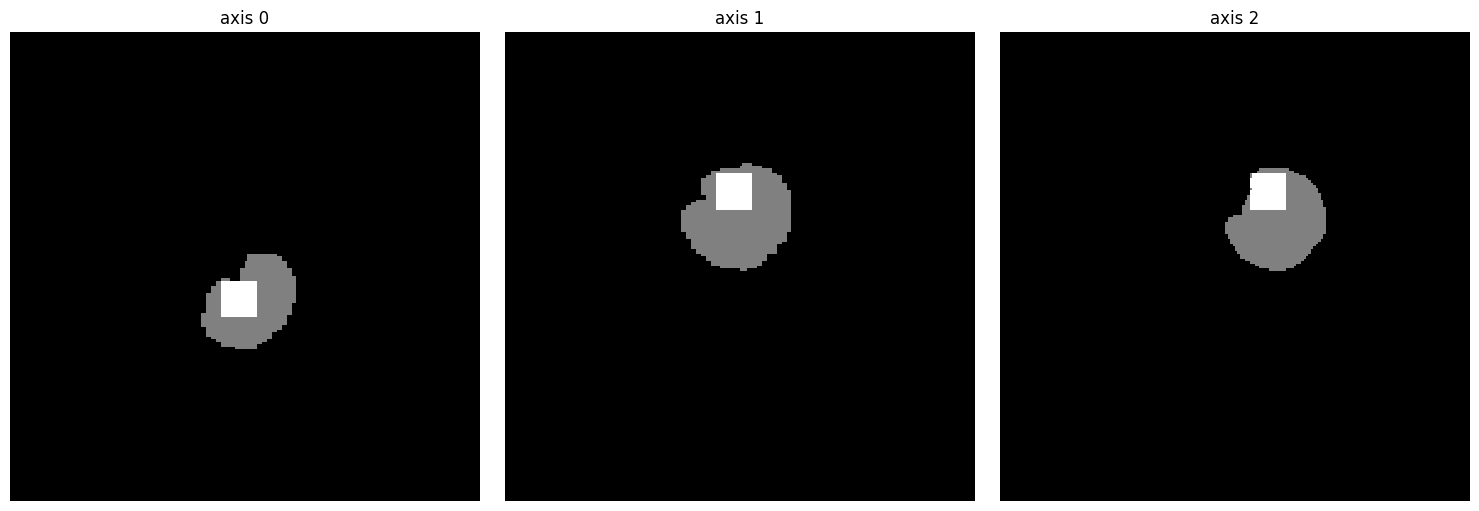

0.9635568513119533


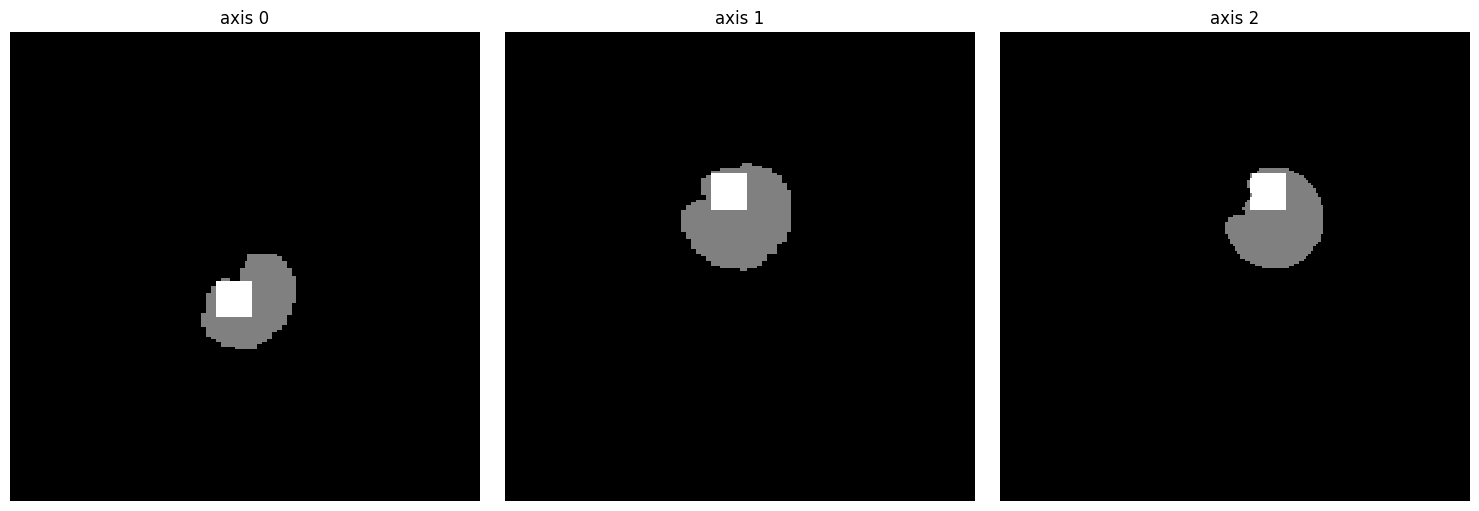

0.922740524781341


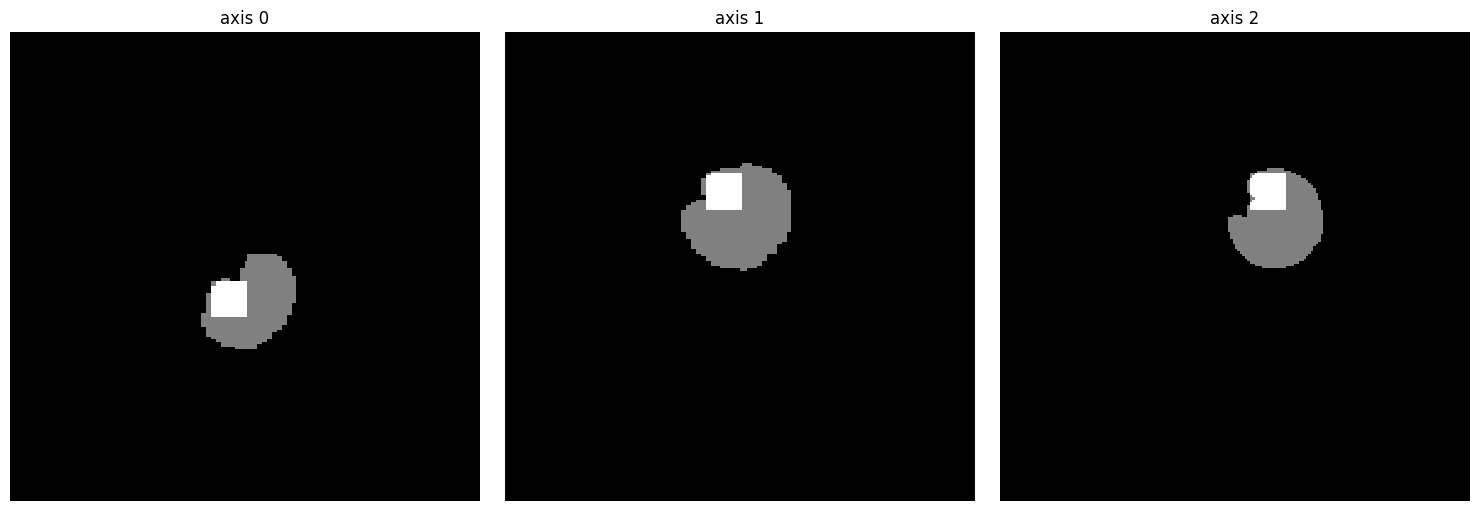

1.0


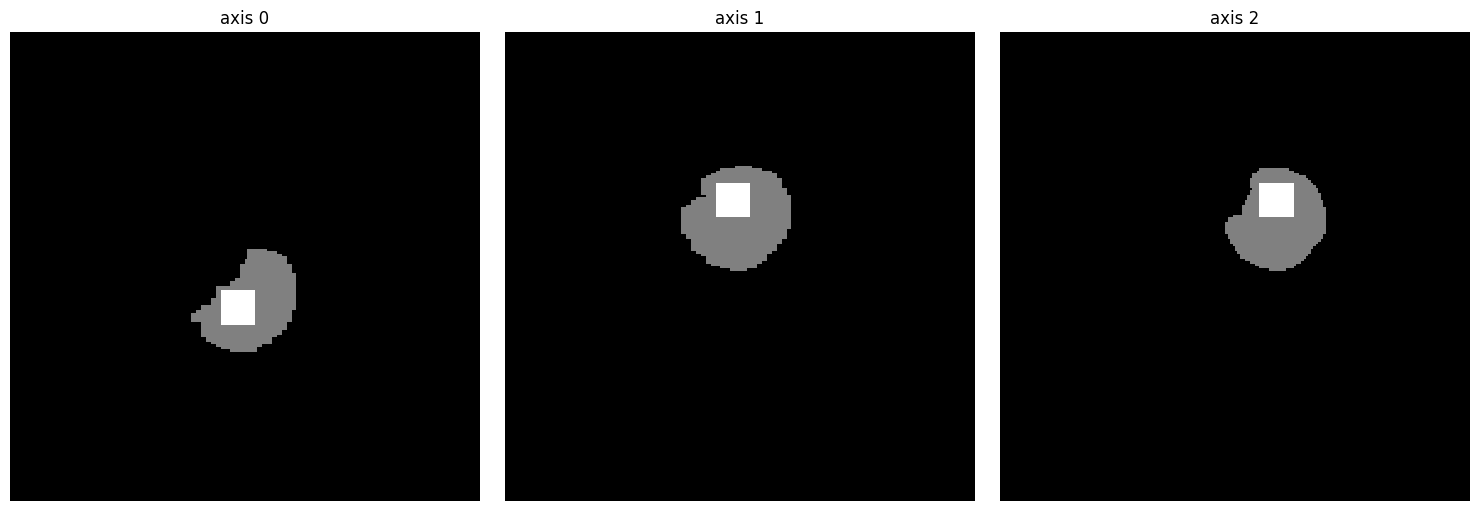

1.0


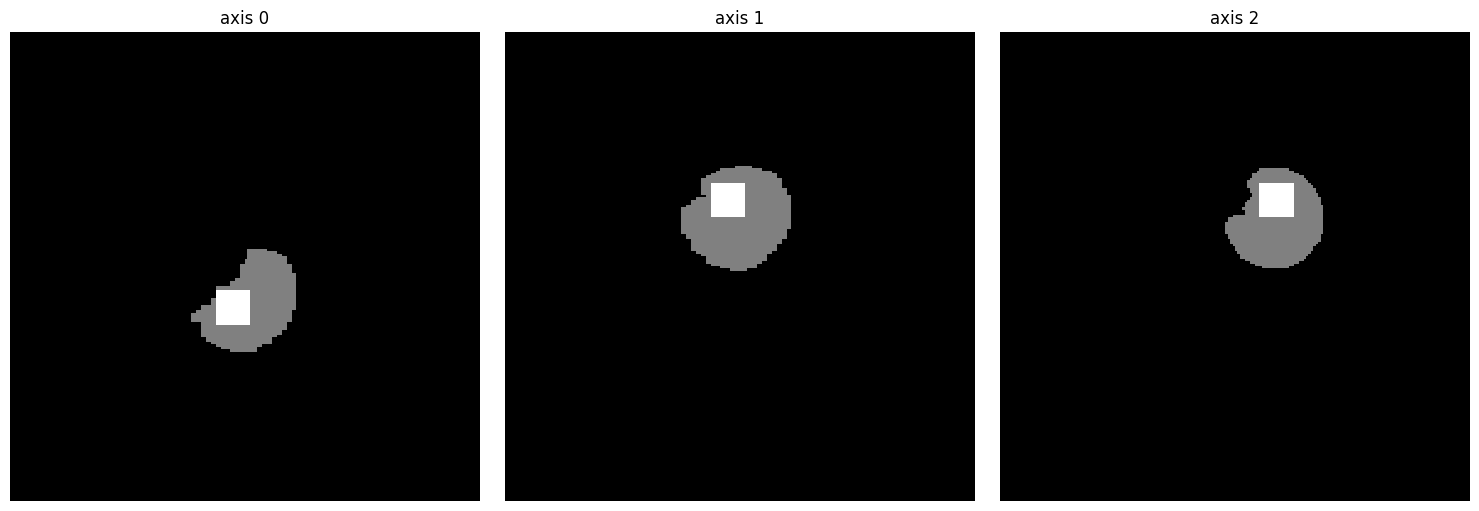

0.9945380063723259


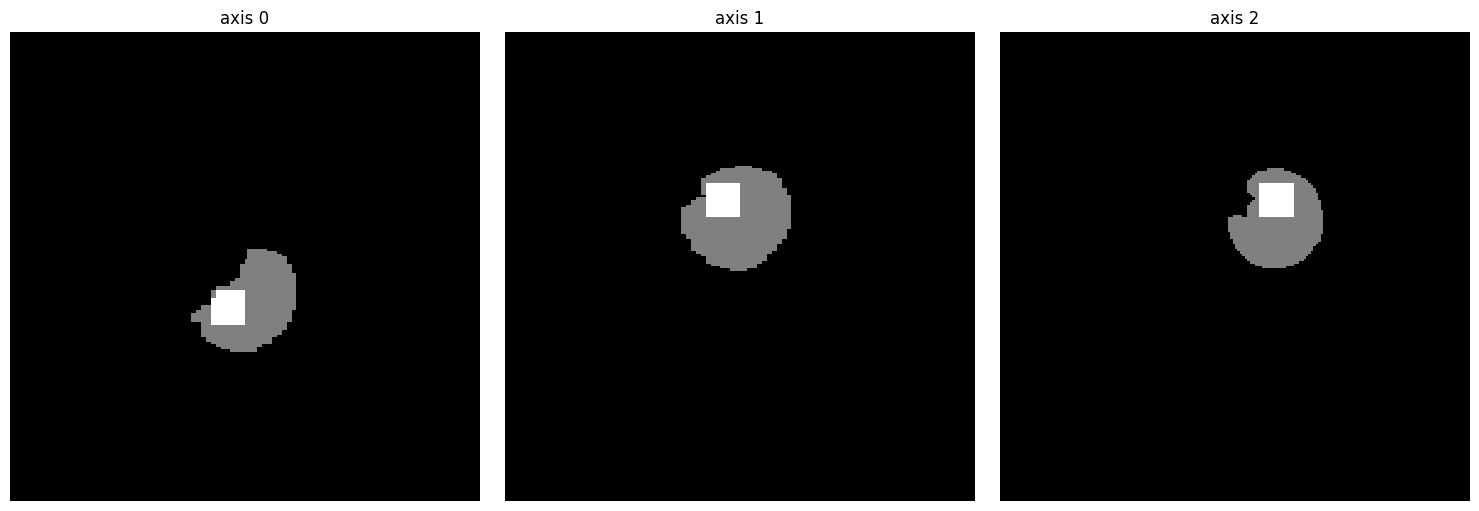

0.997269003186163


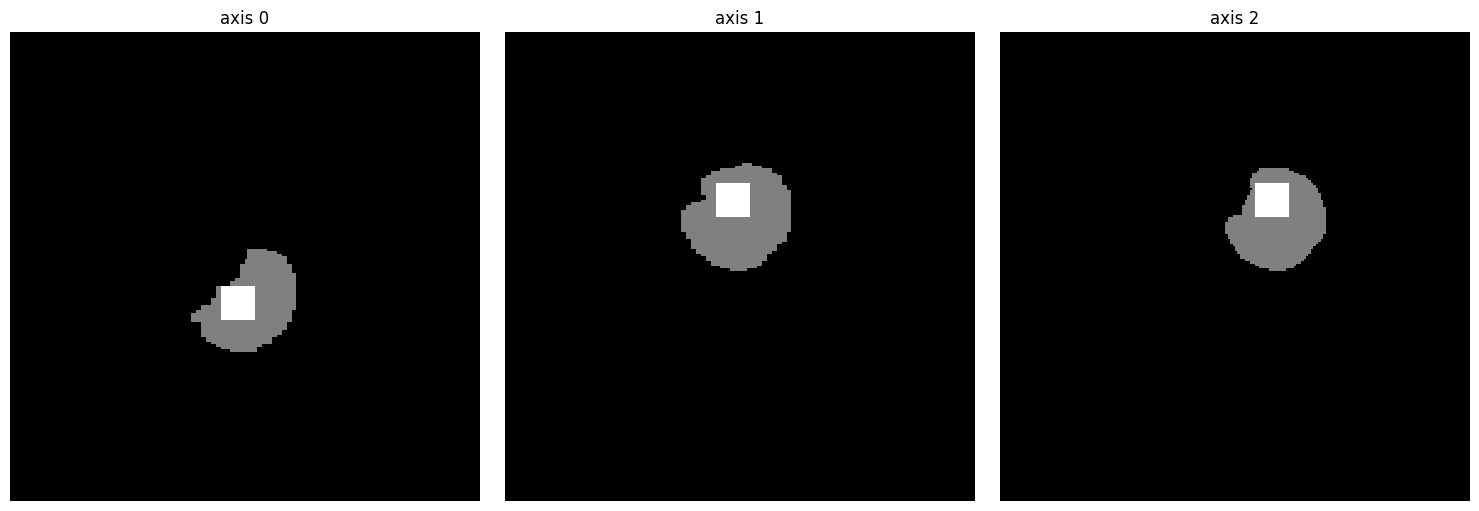

0.996358670914884


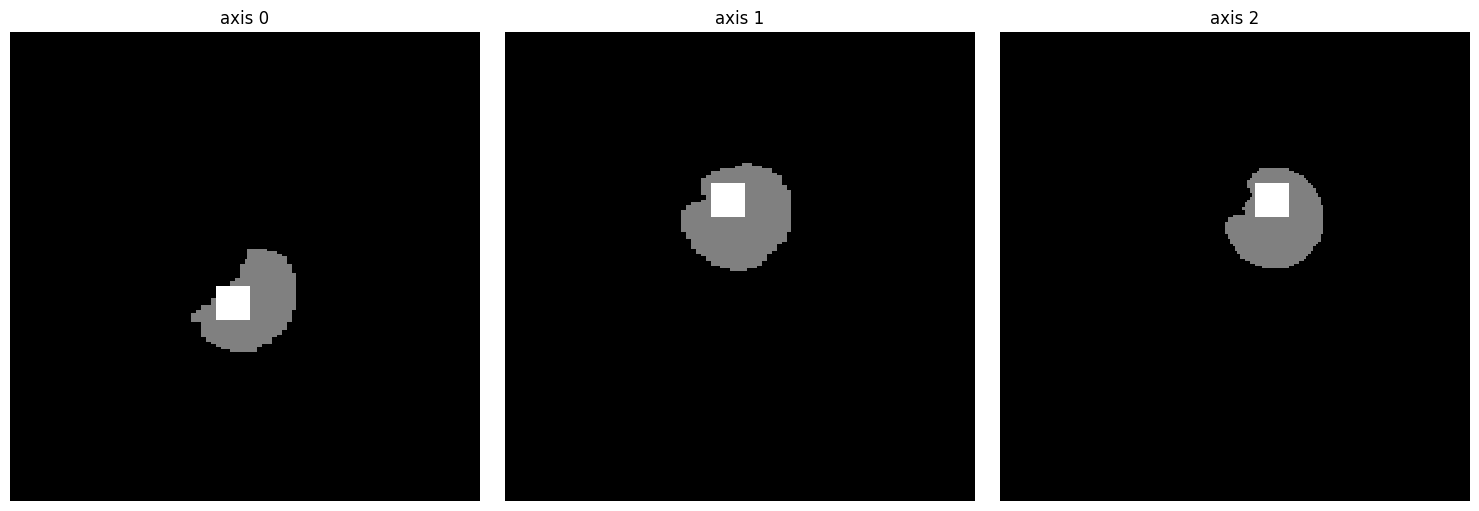

0.9845243513882567


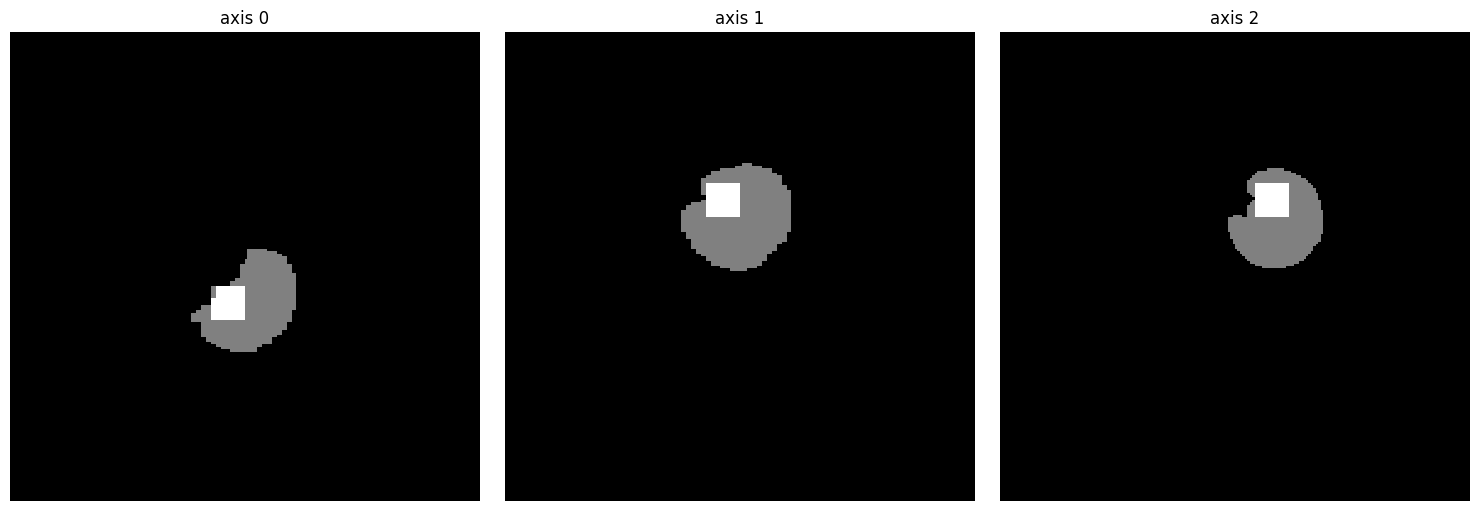

0.9781520254893036


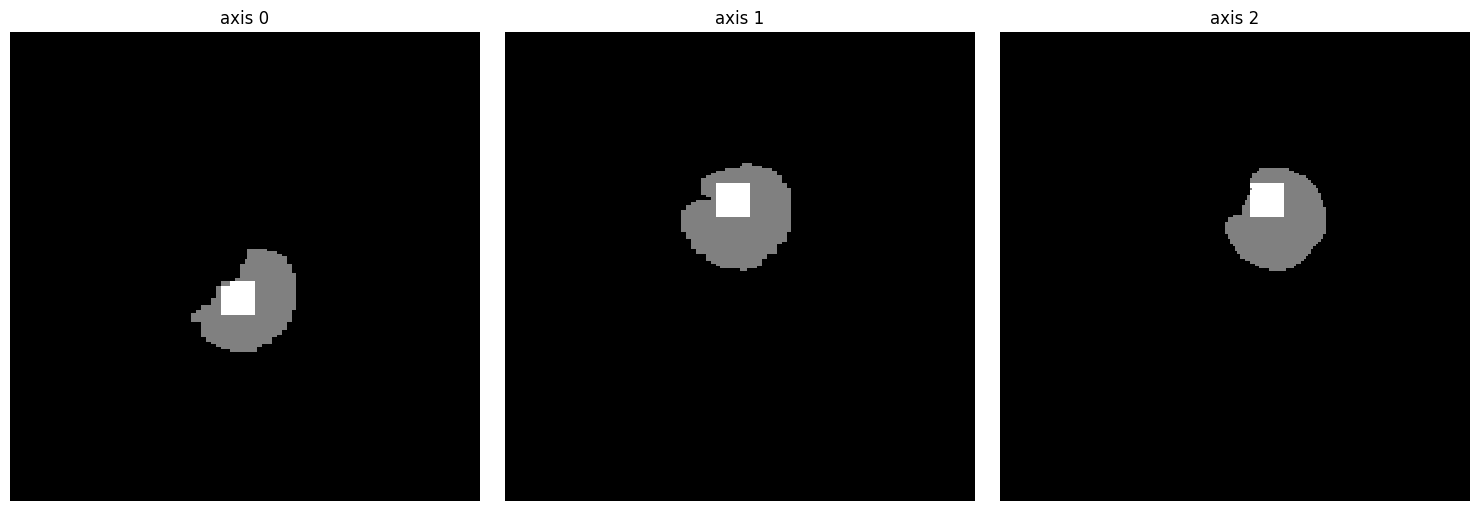

0.9672280382339554


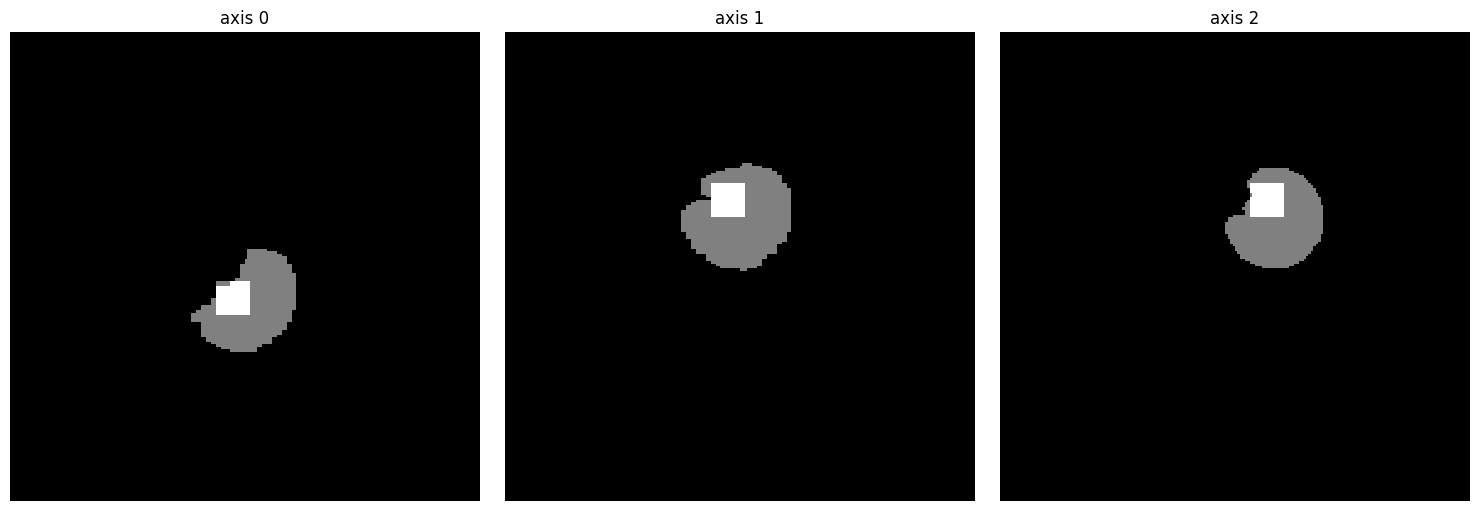

0.9371870732817479


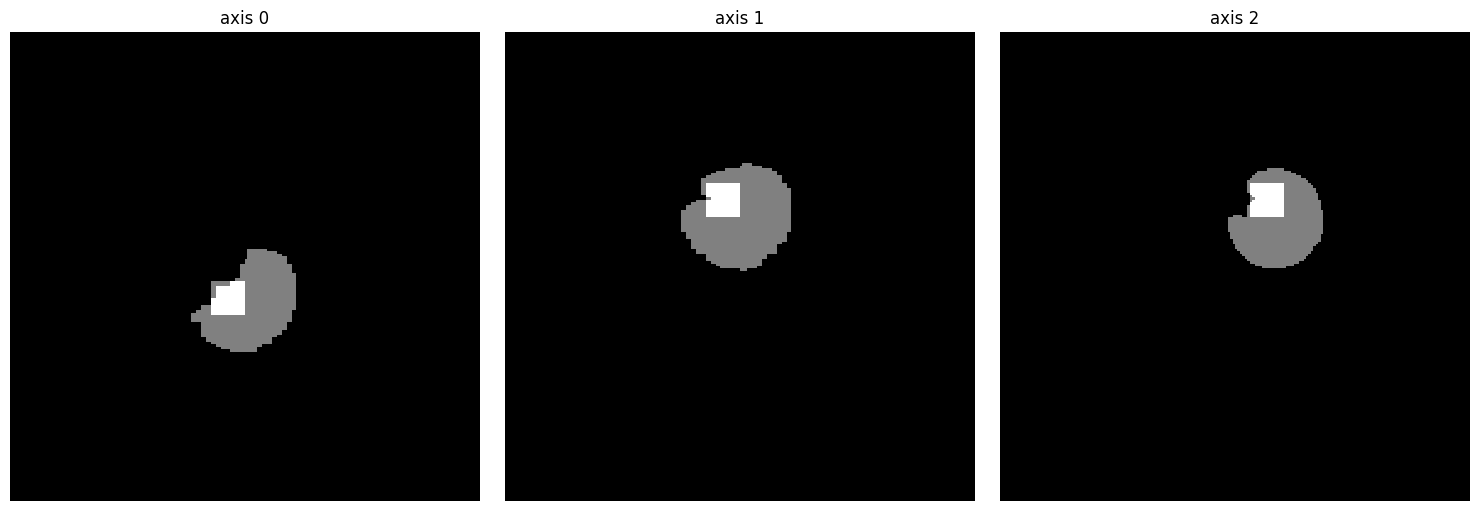

1.0


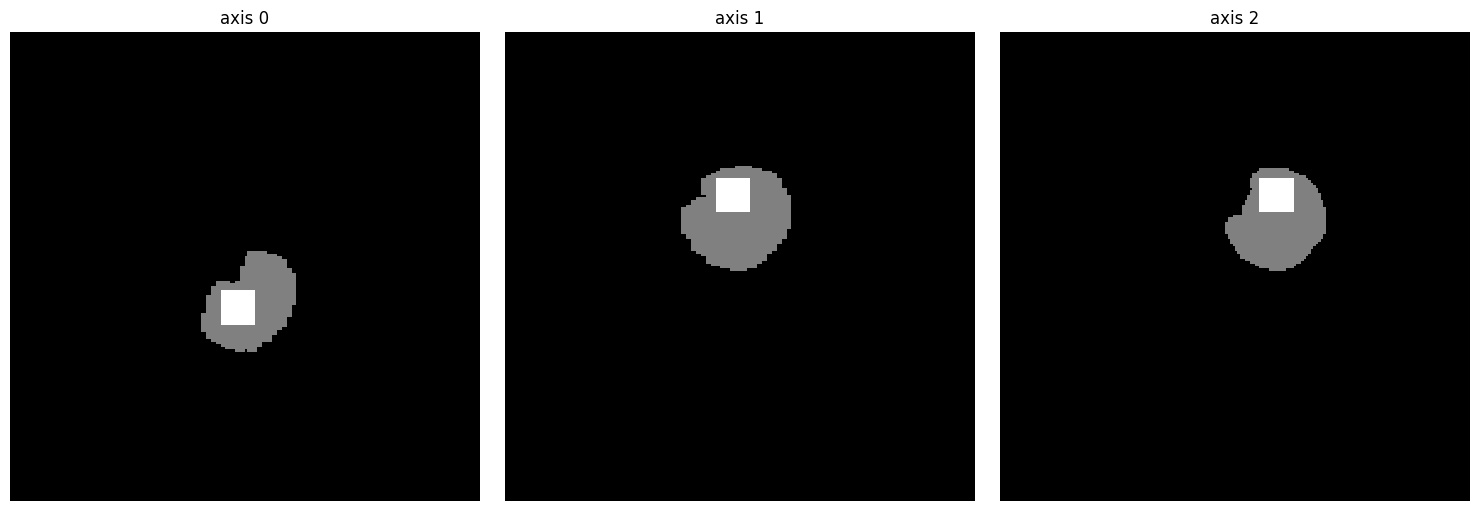

1.0


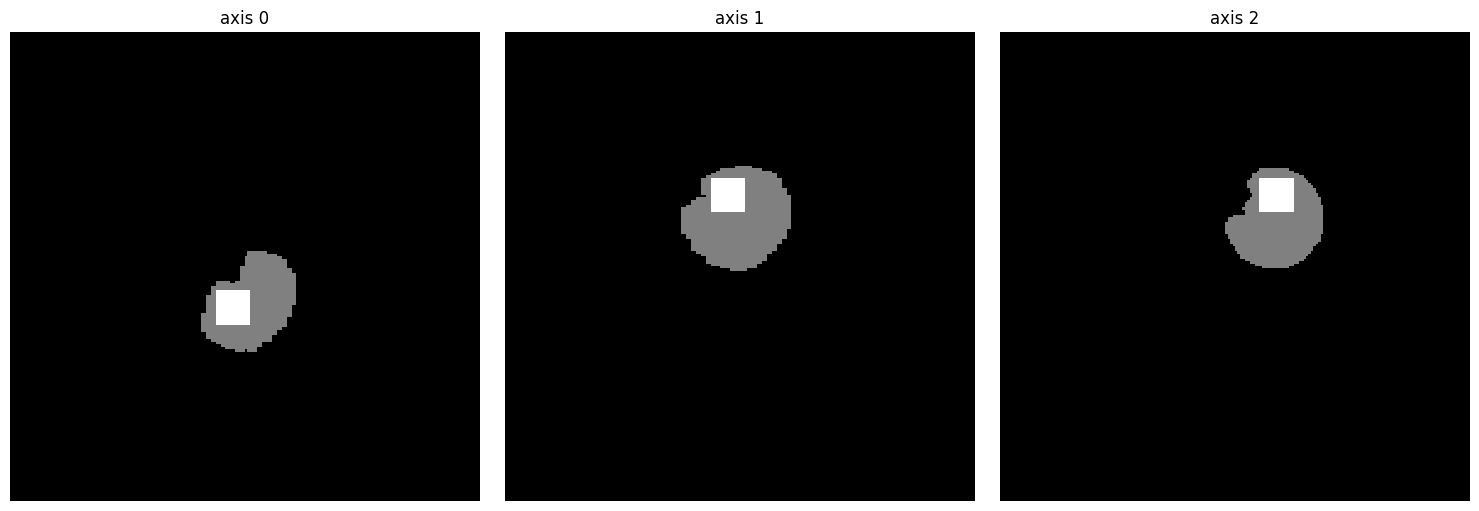

0.9945380063723259


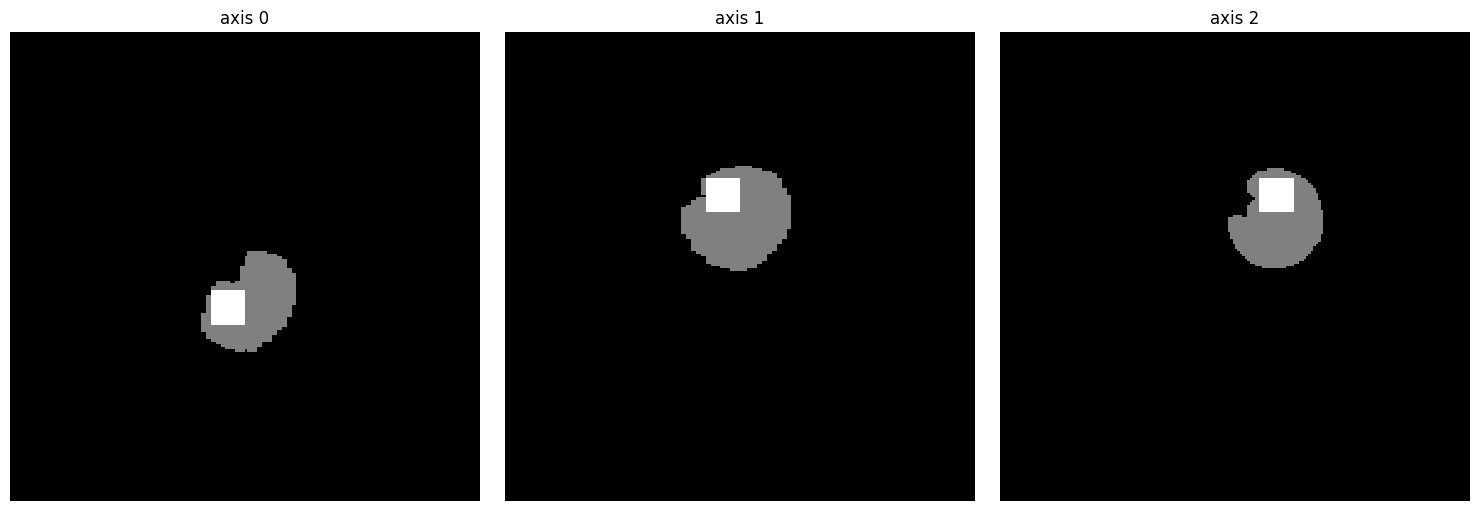

0.997269003186163


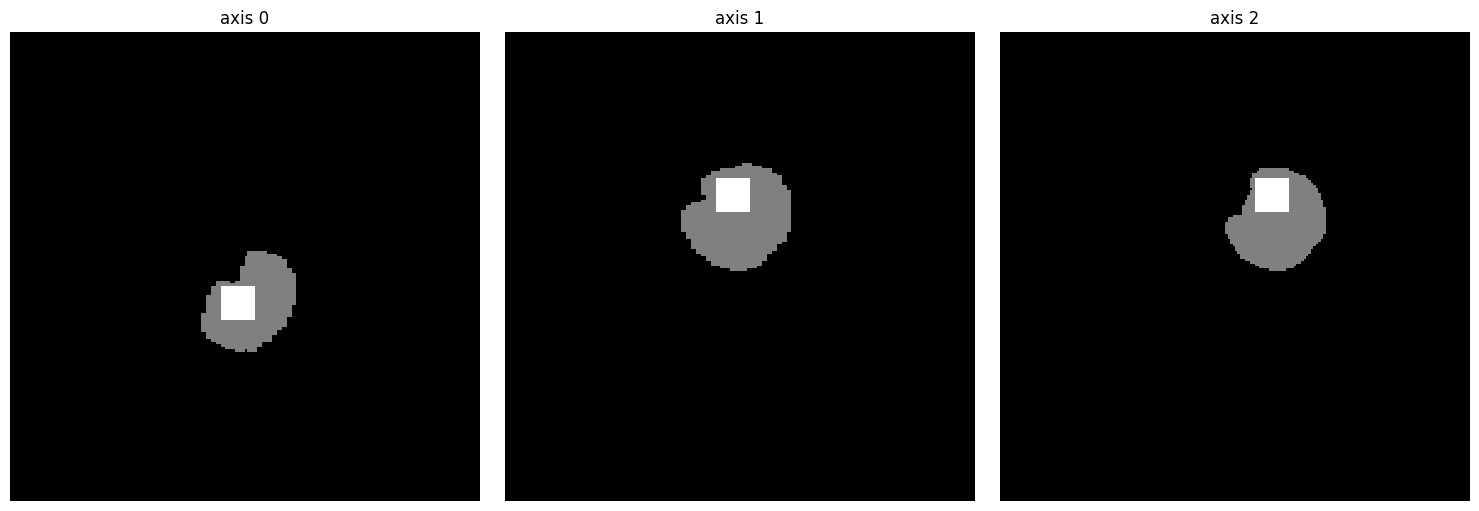

0.996358670914884


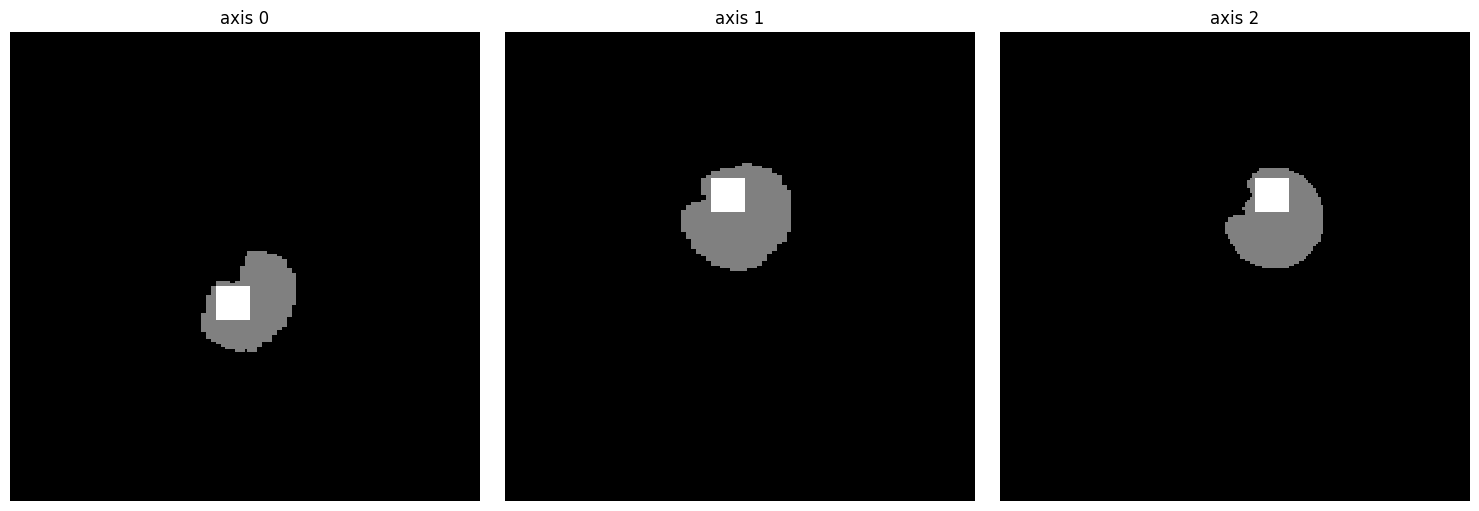

0.9836140191169777


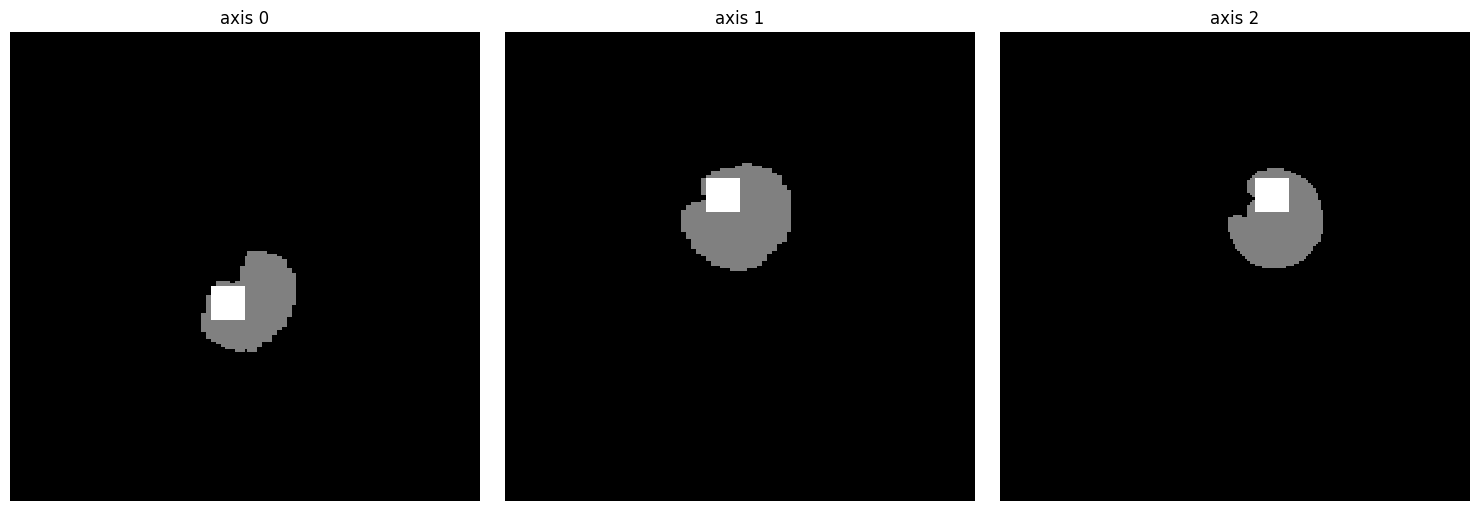

0.9799726900318616


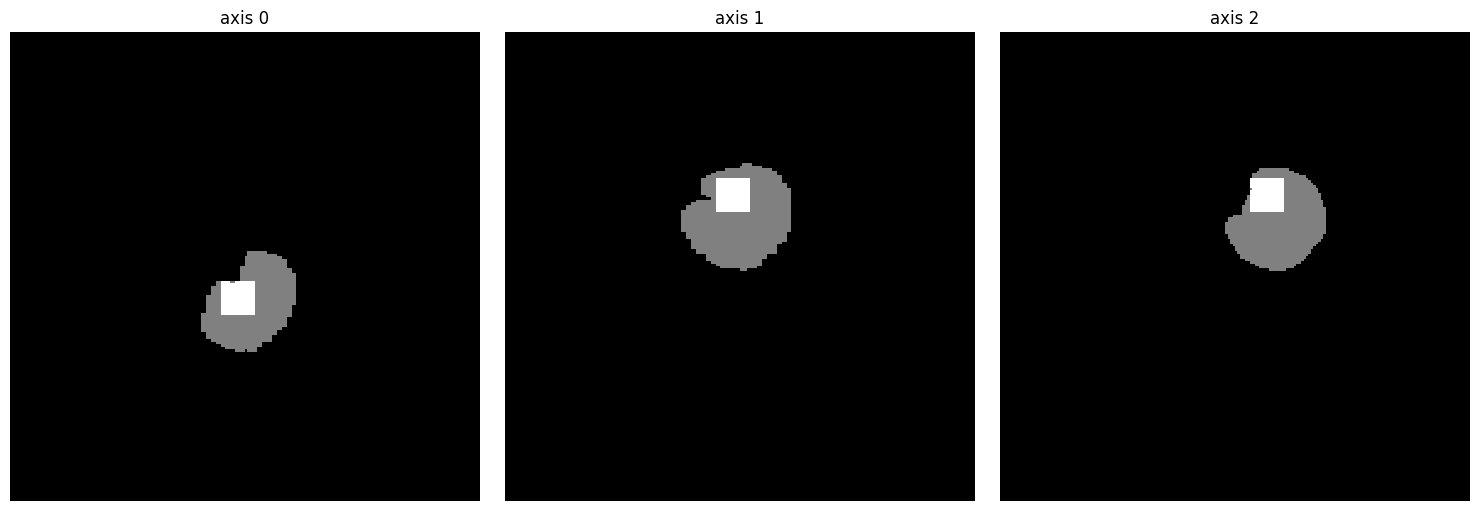

0.9690487027765134


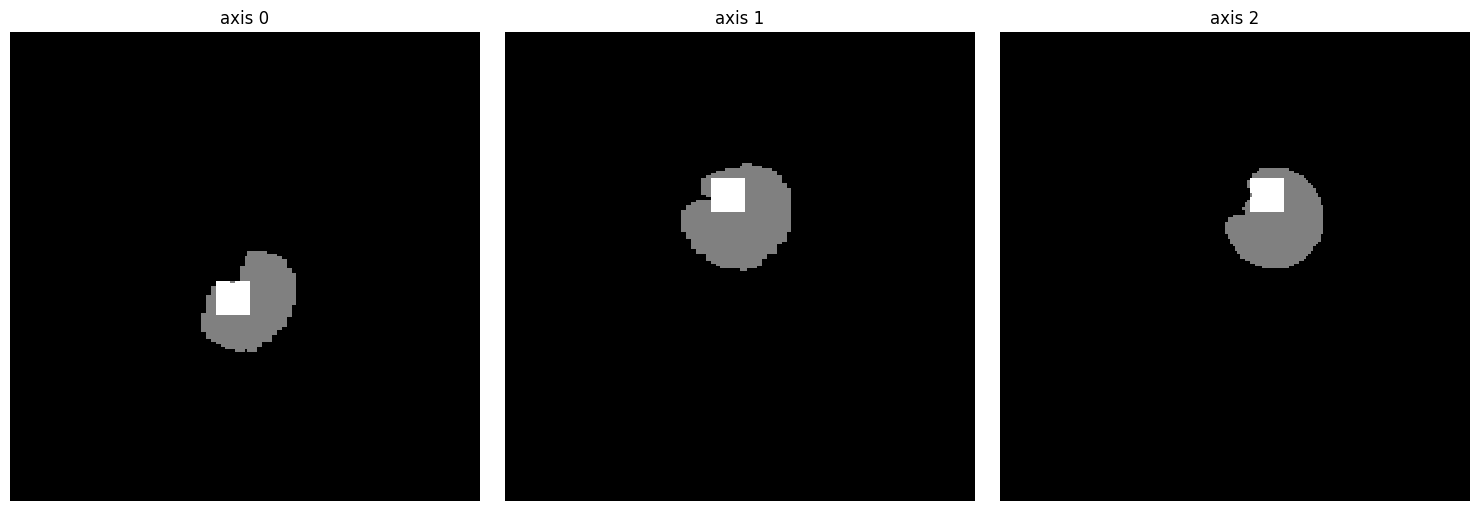

0.9358215748748293


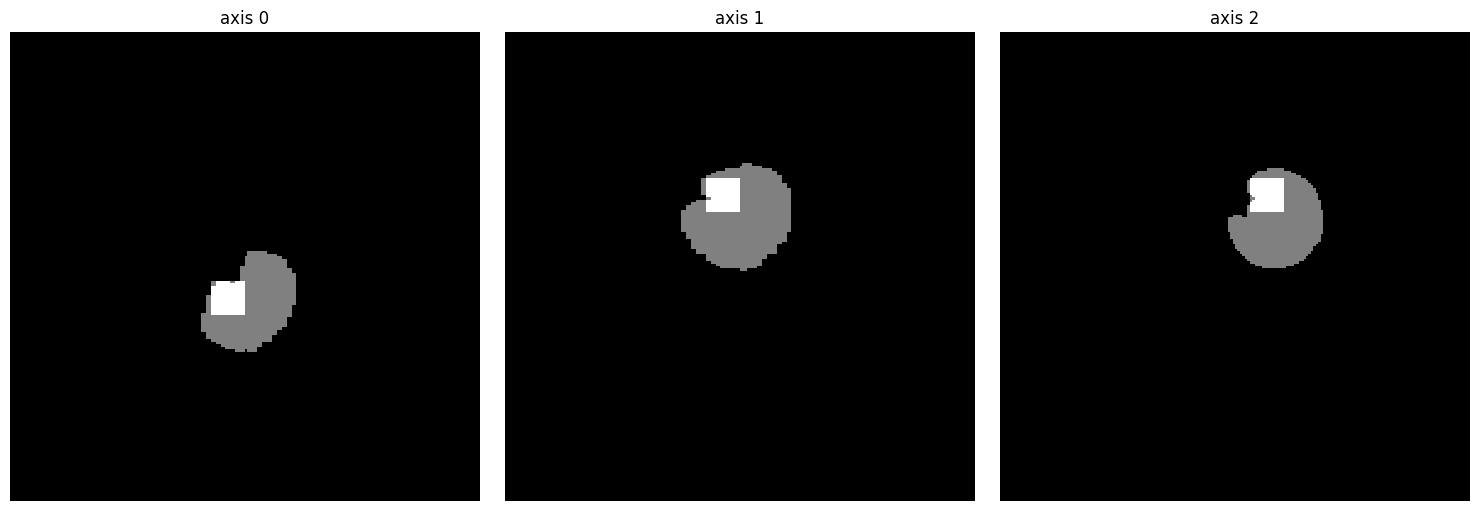

1.0


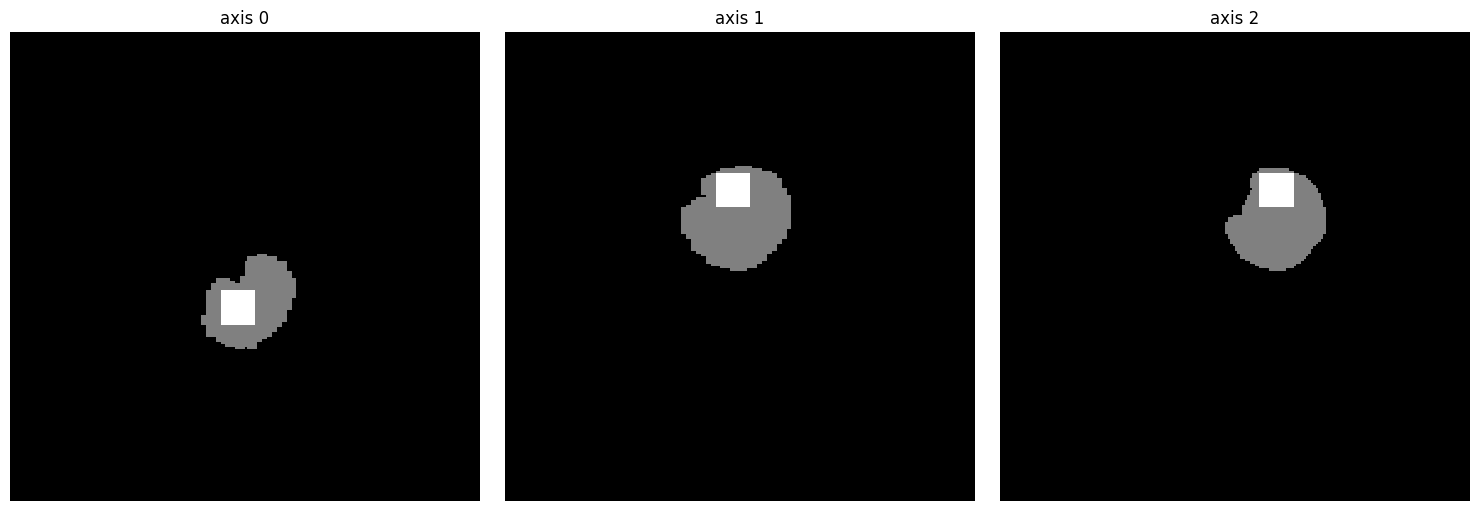

0.998179335457442


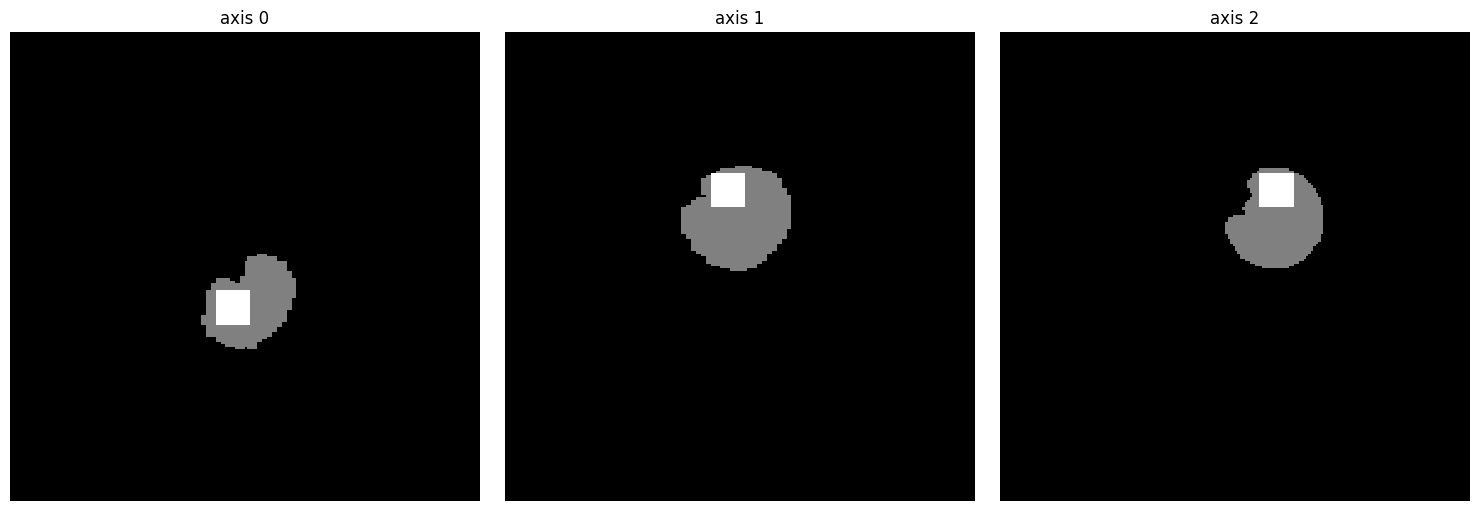

0.9772416932180246


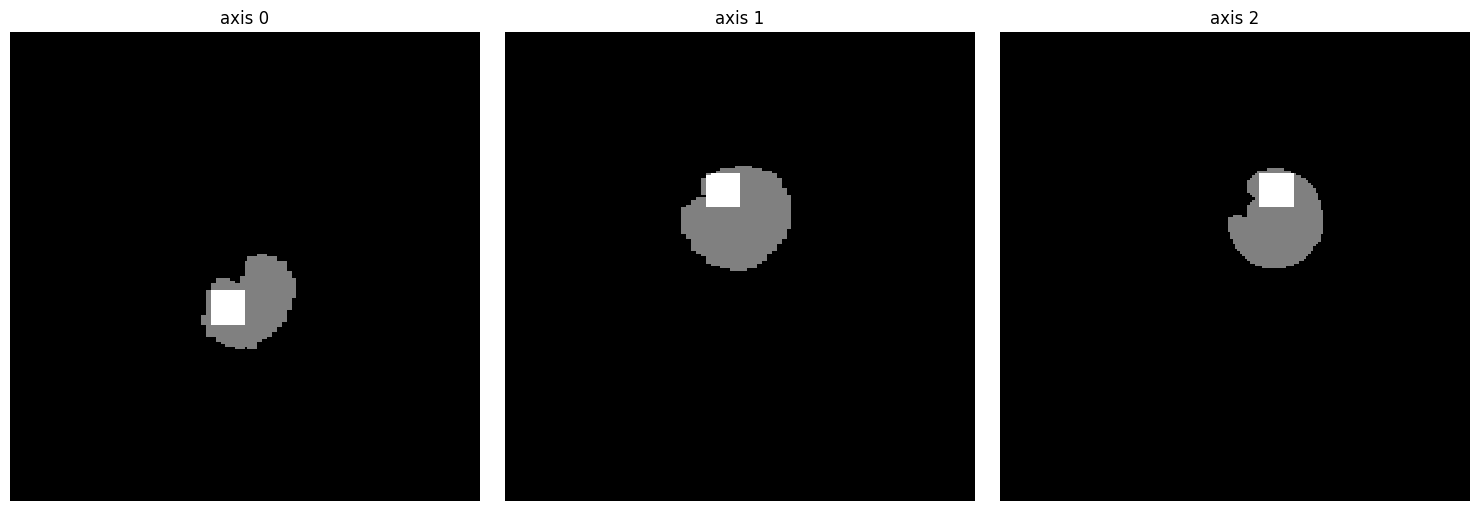

0.998179335457442


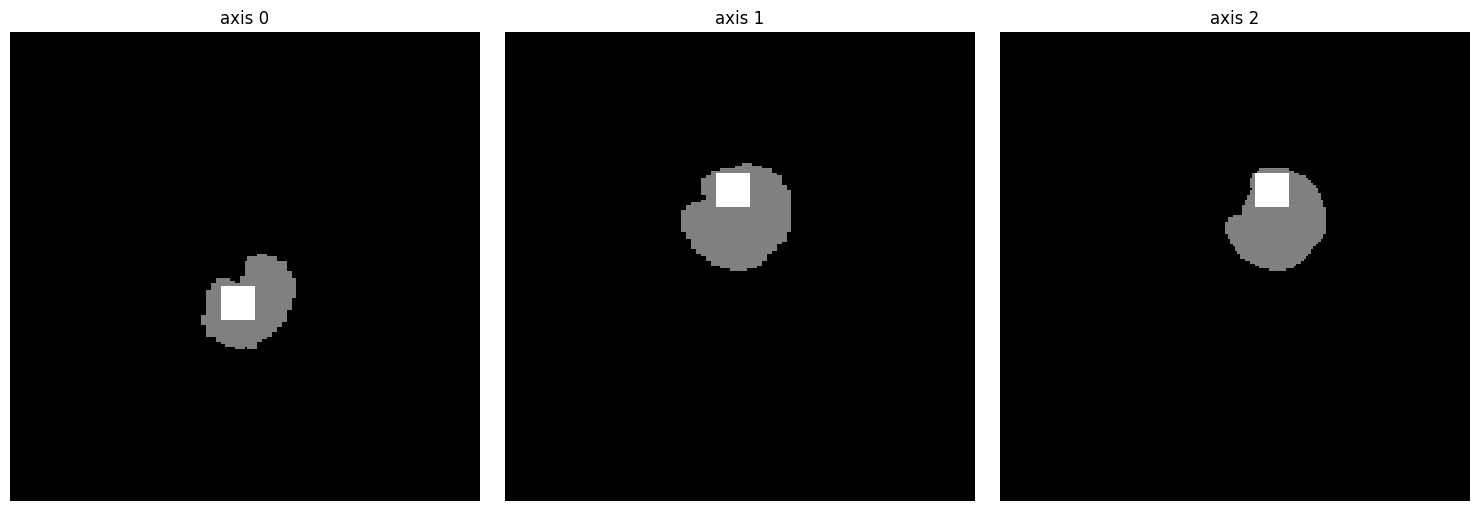

0.9945380063723259


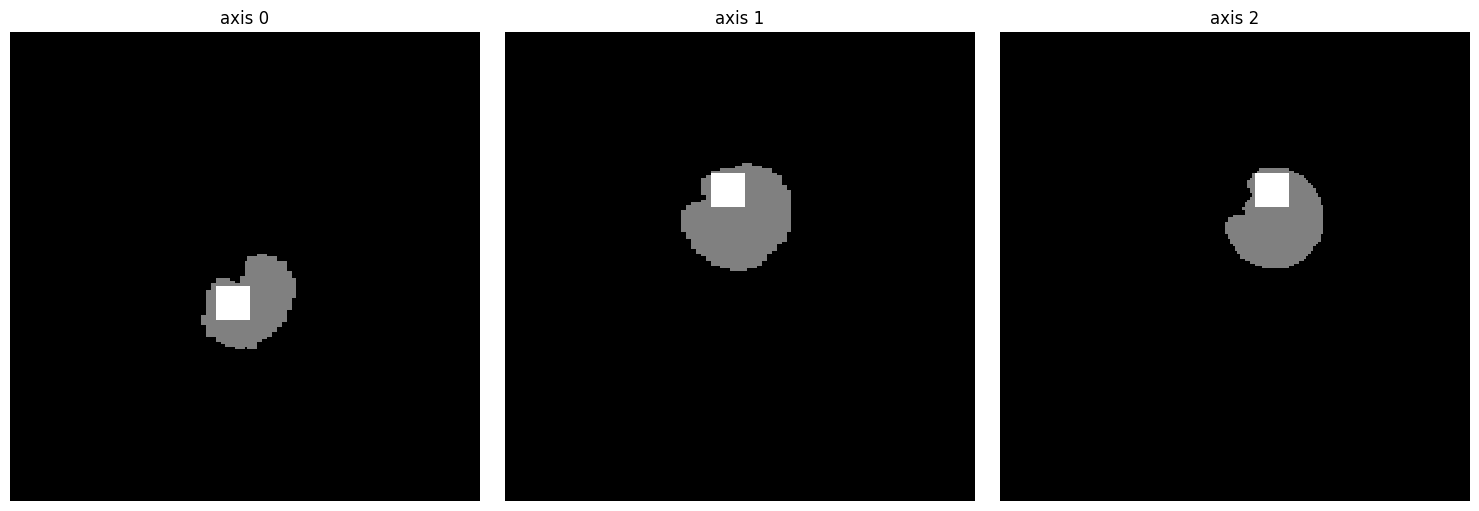

0.9663177059626764


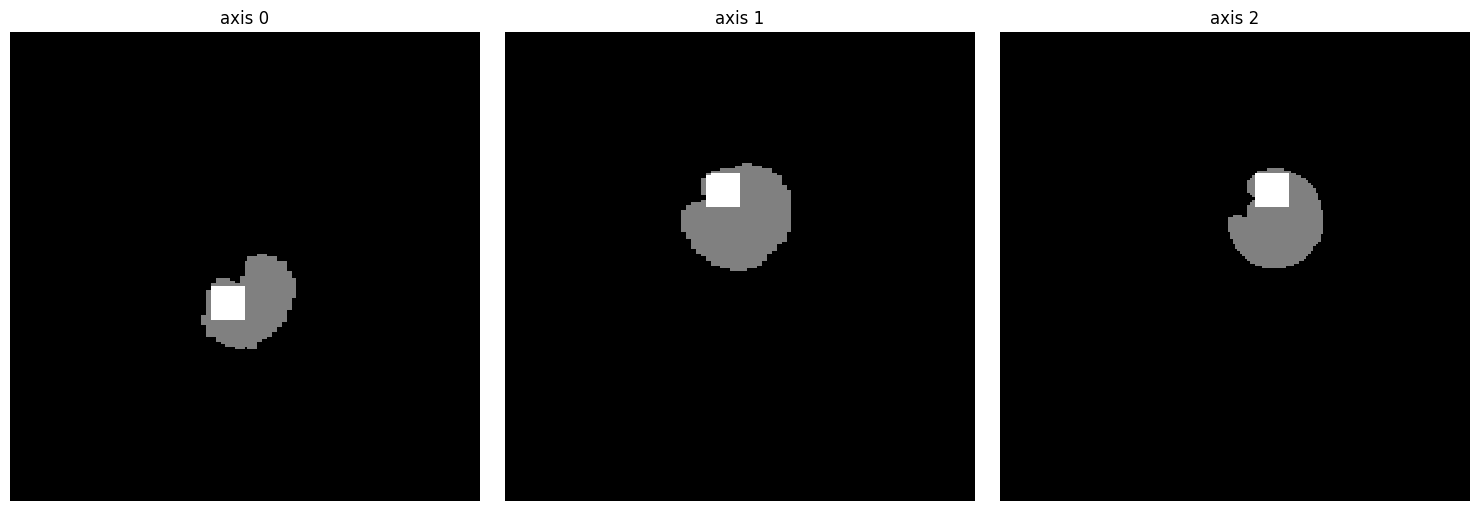

0.9736003641329085


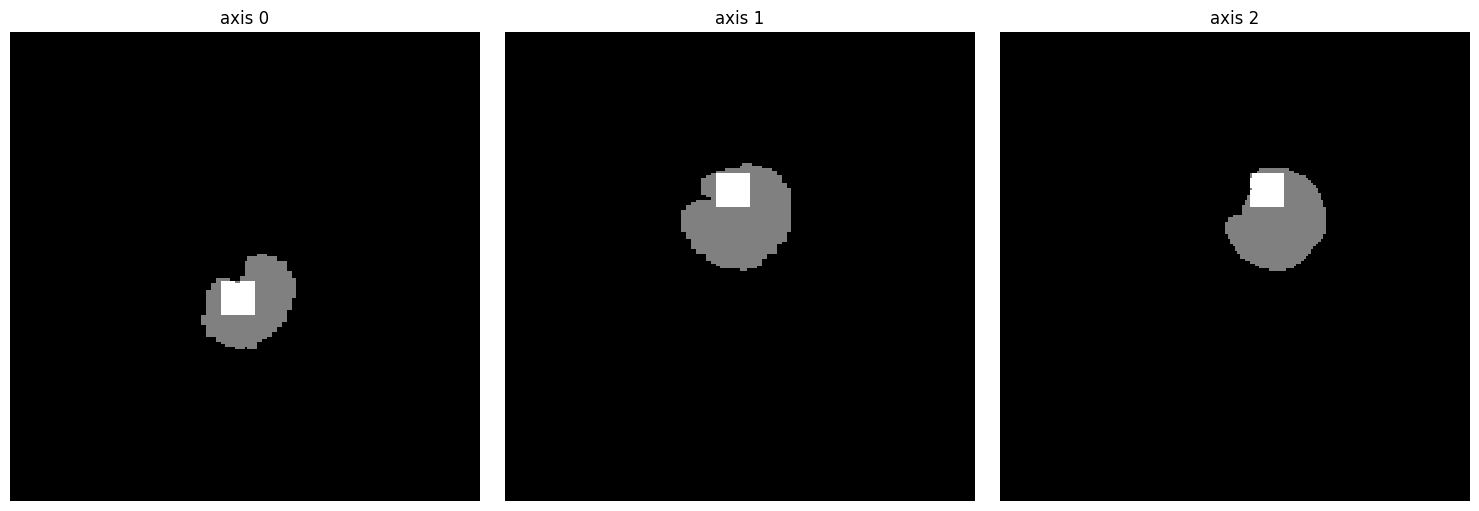

0.9590350477924442


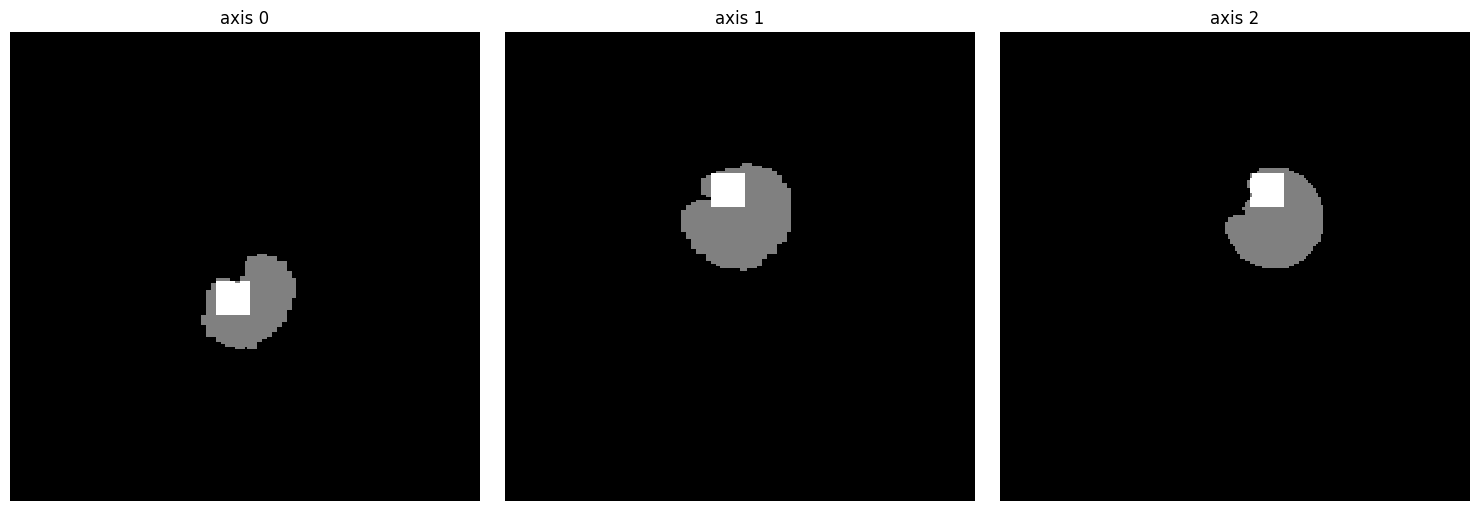

0.9121529358215749


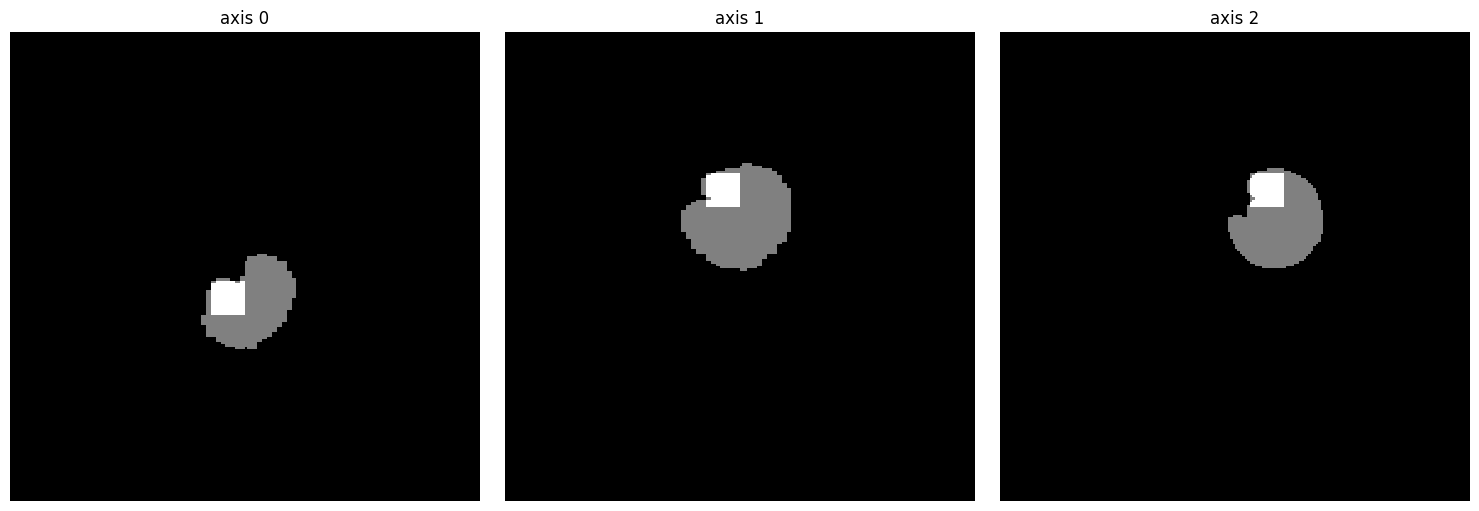

1.0


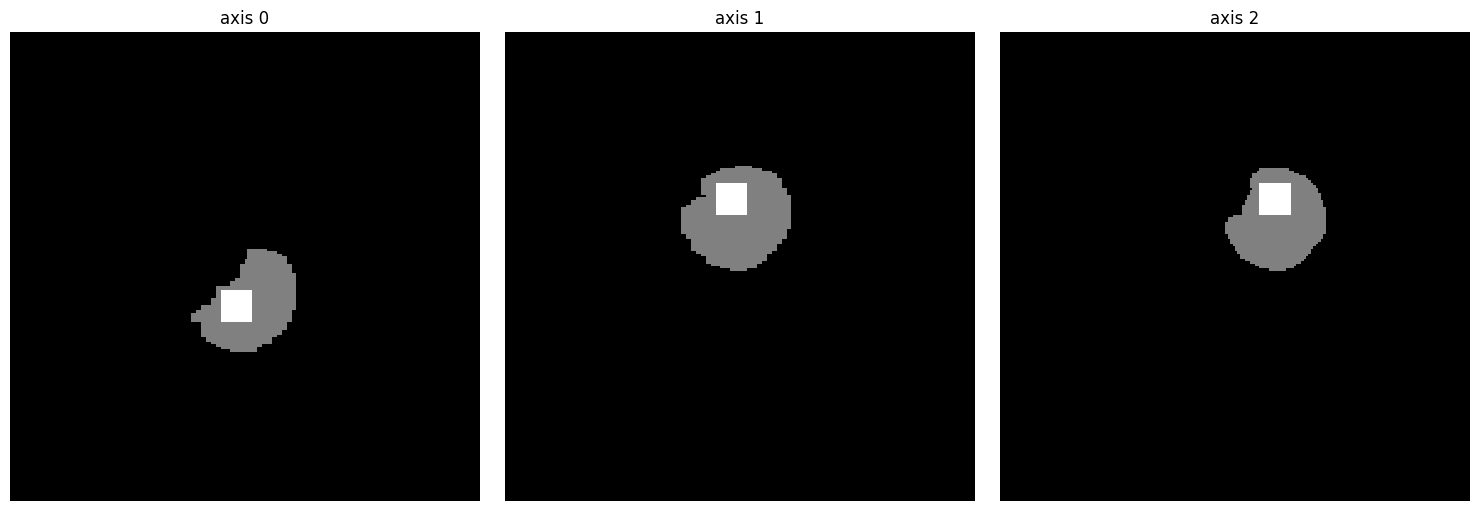

1.0


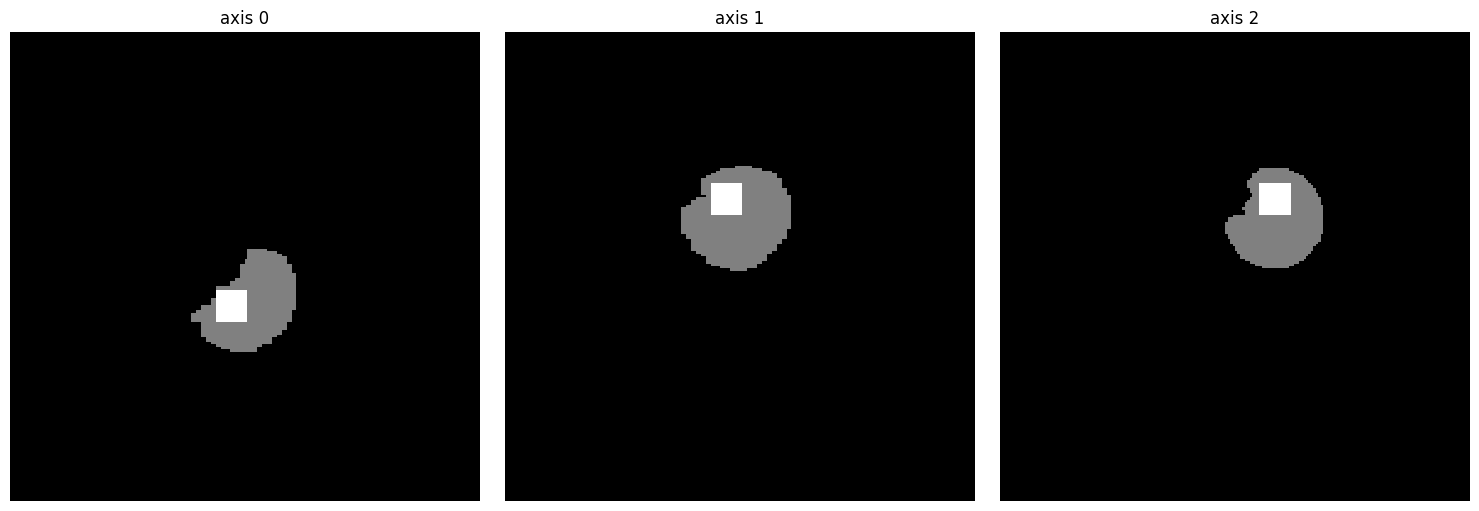

0.9930555555555556


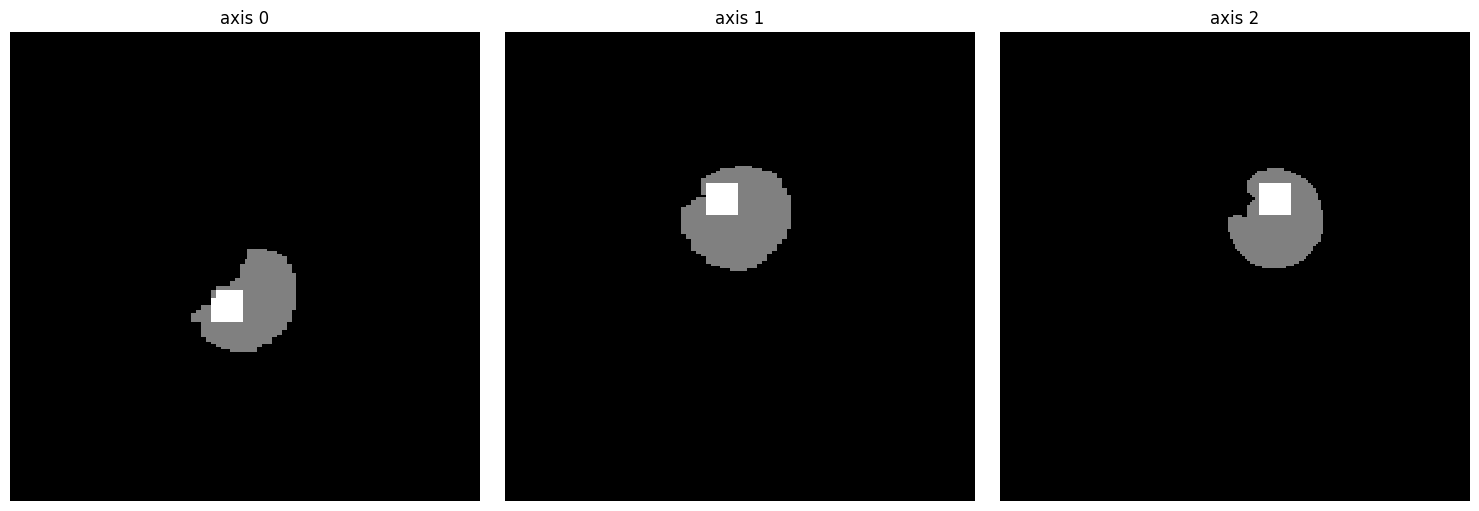

0.9965277777777778


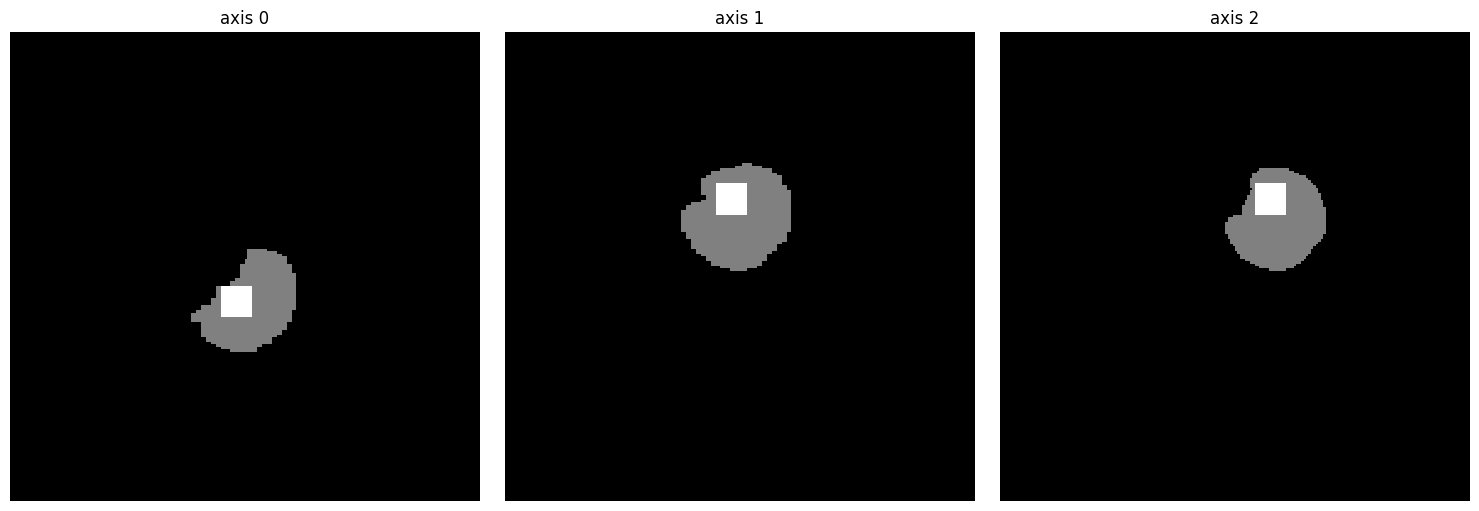

0.9953703703703703


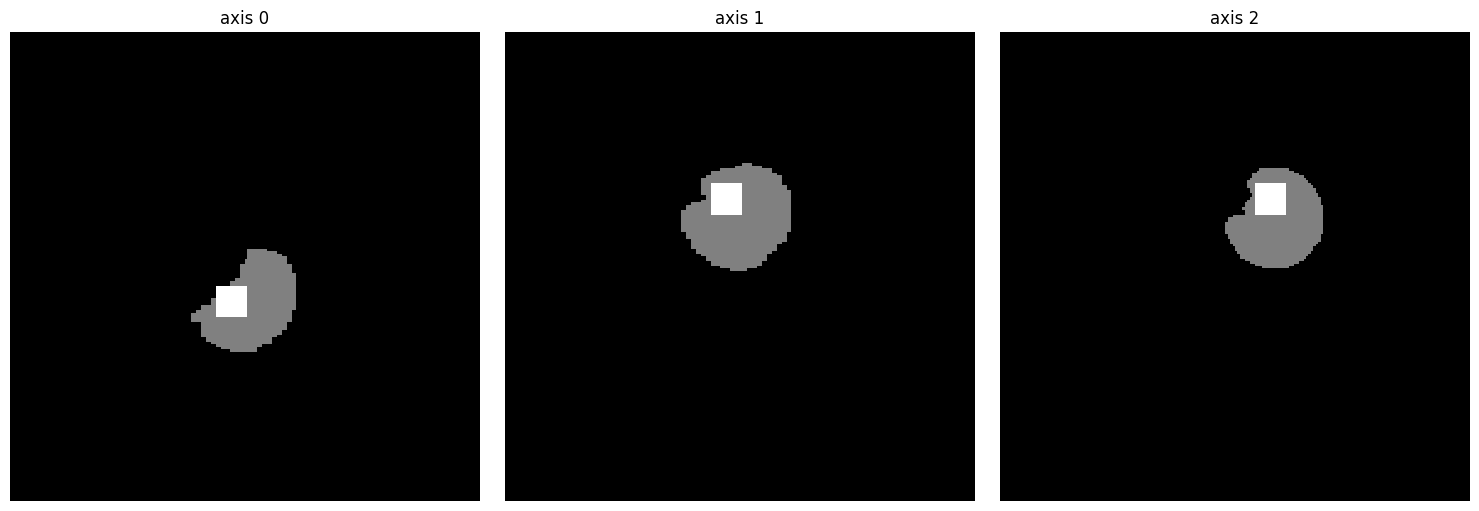

0.9803240740740741


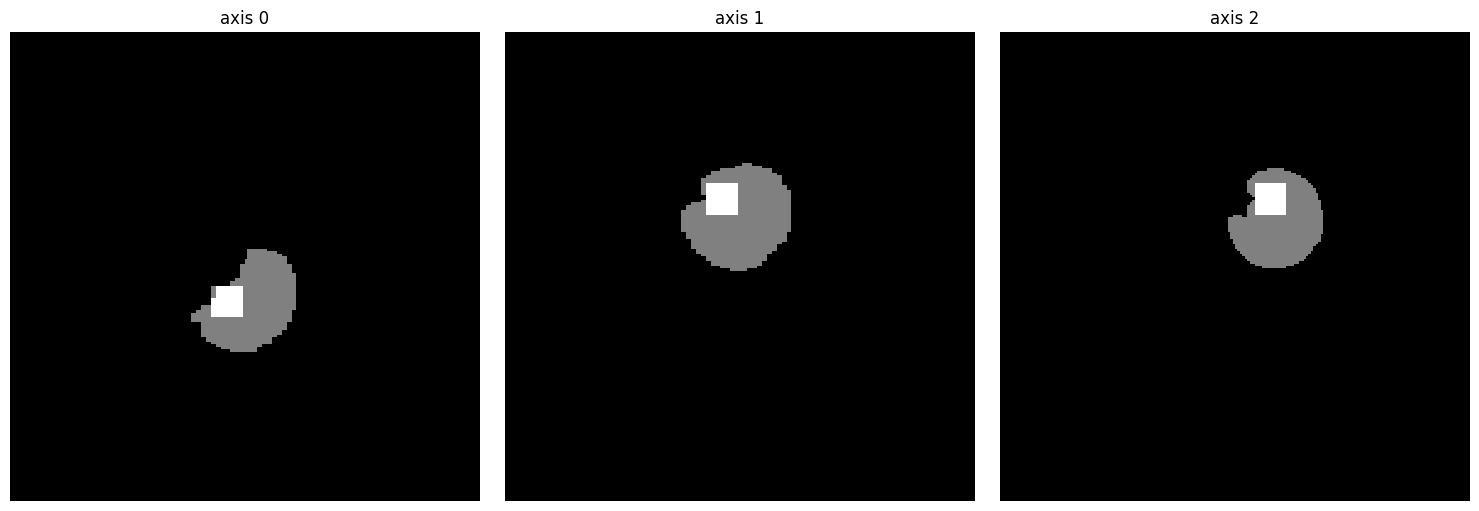

0.9733796296296297


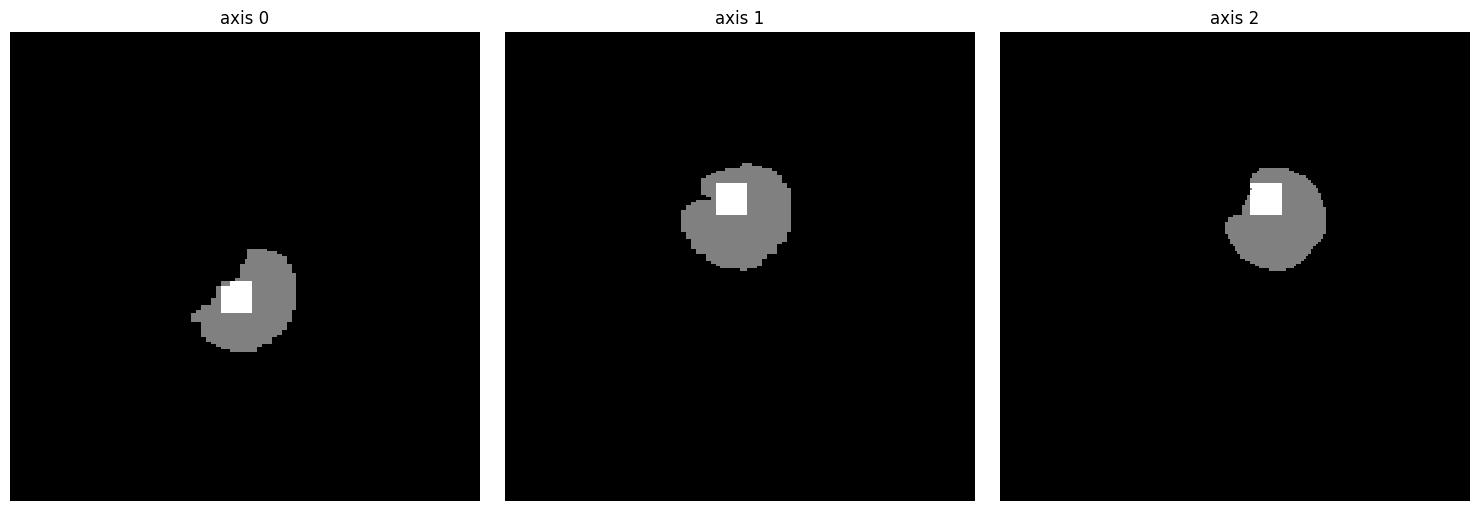

0.9594907407407407


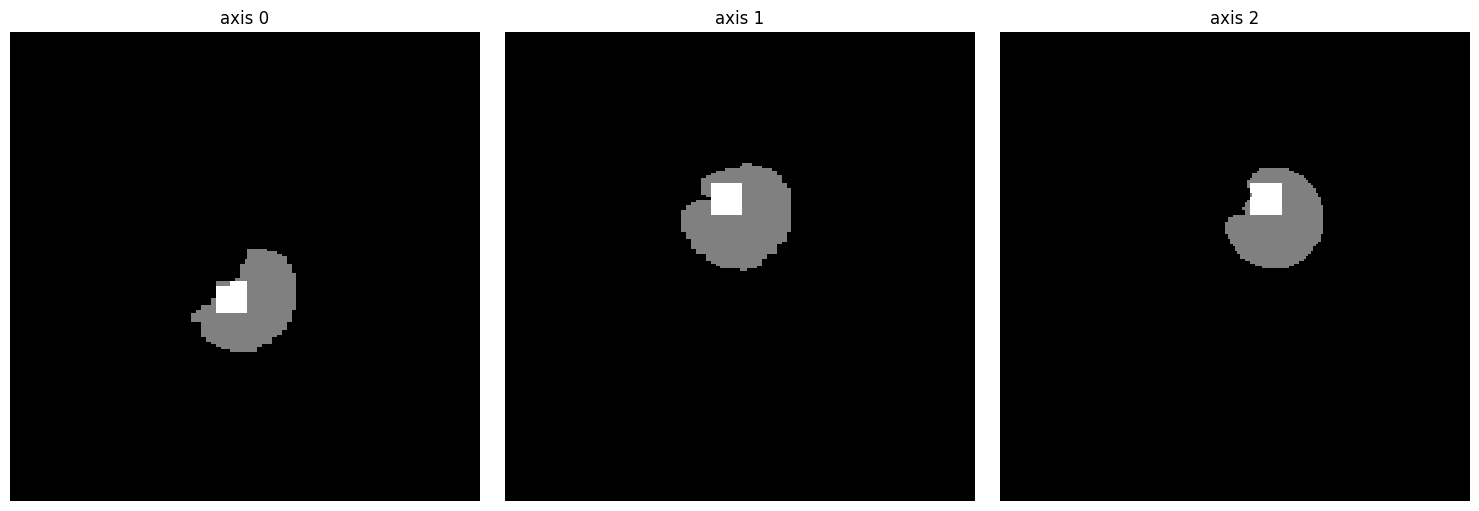

0.9212962962962963


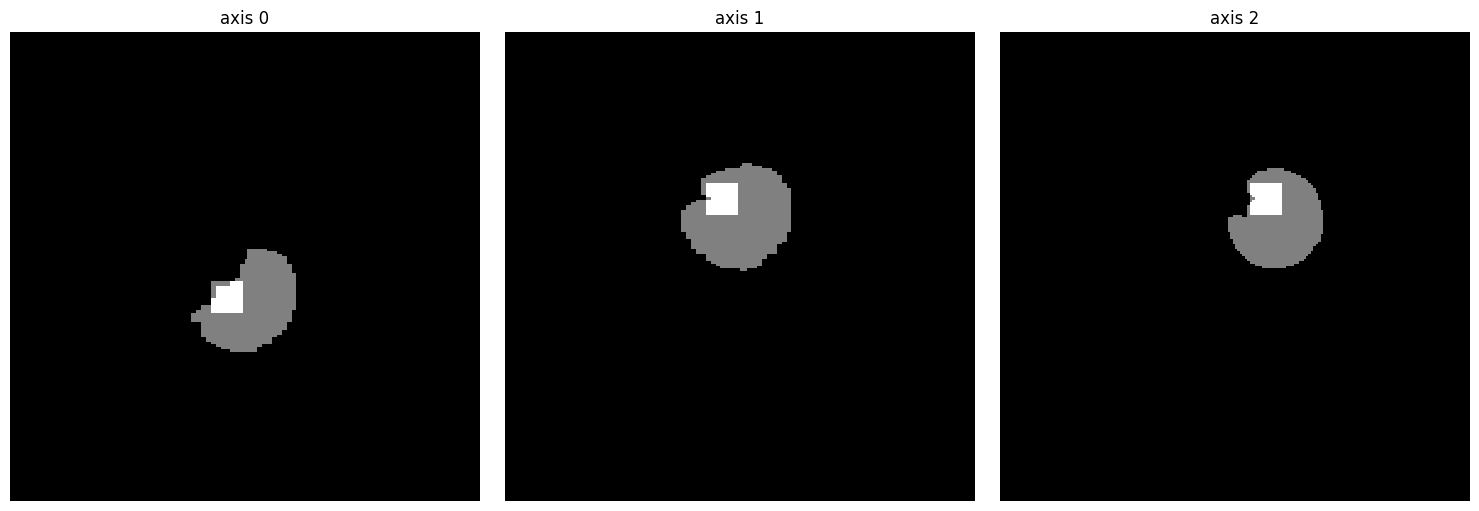

1.0


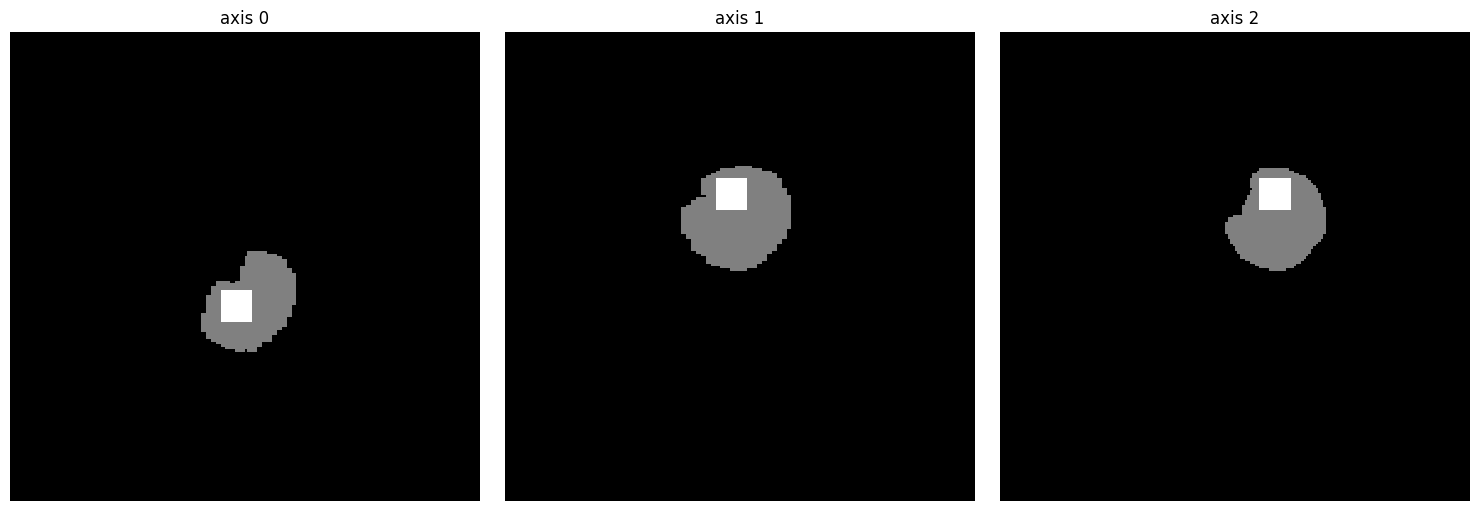

1.0


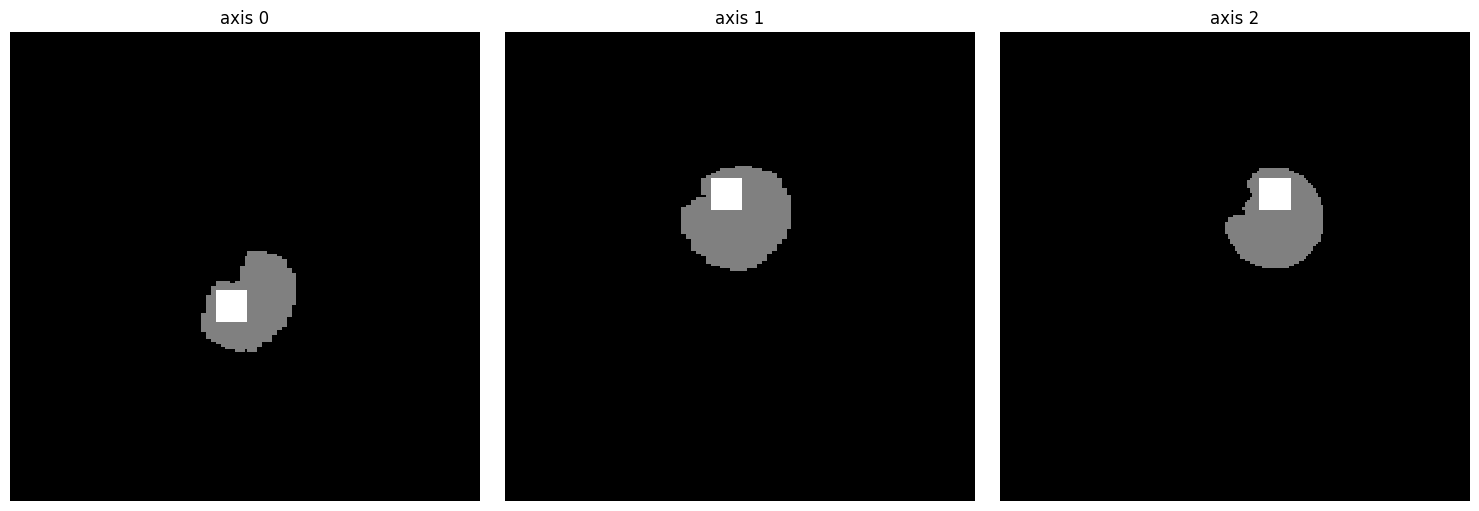

0.9930555555555556


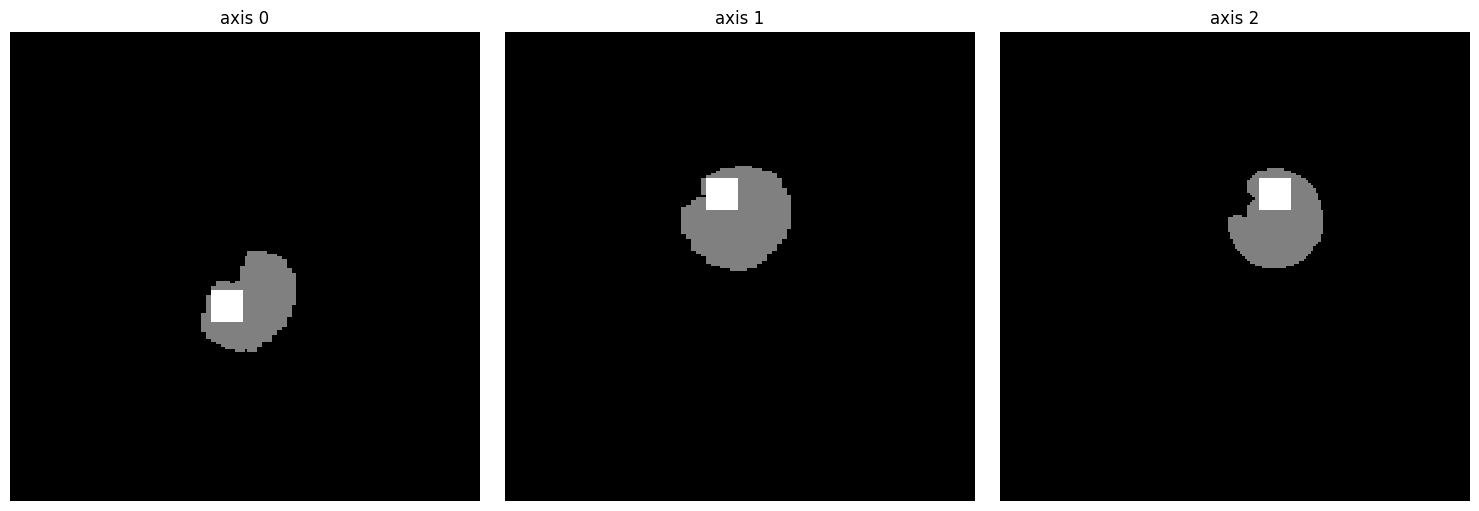

0.9965277777777778


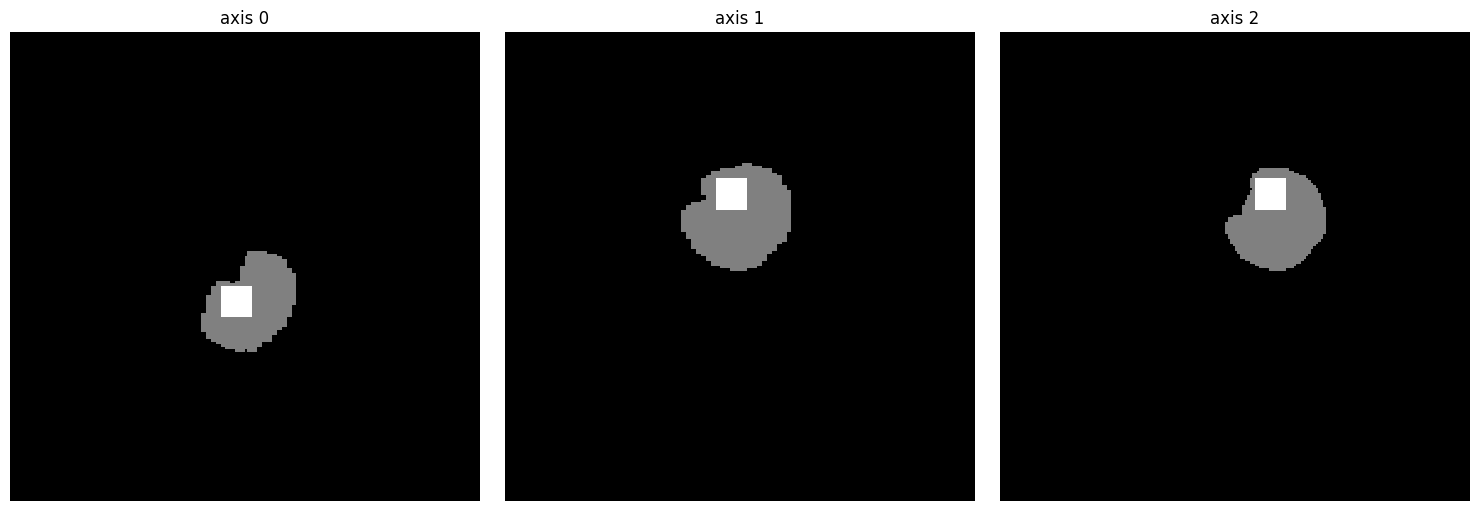

0.9953703703703703


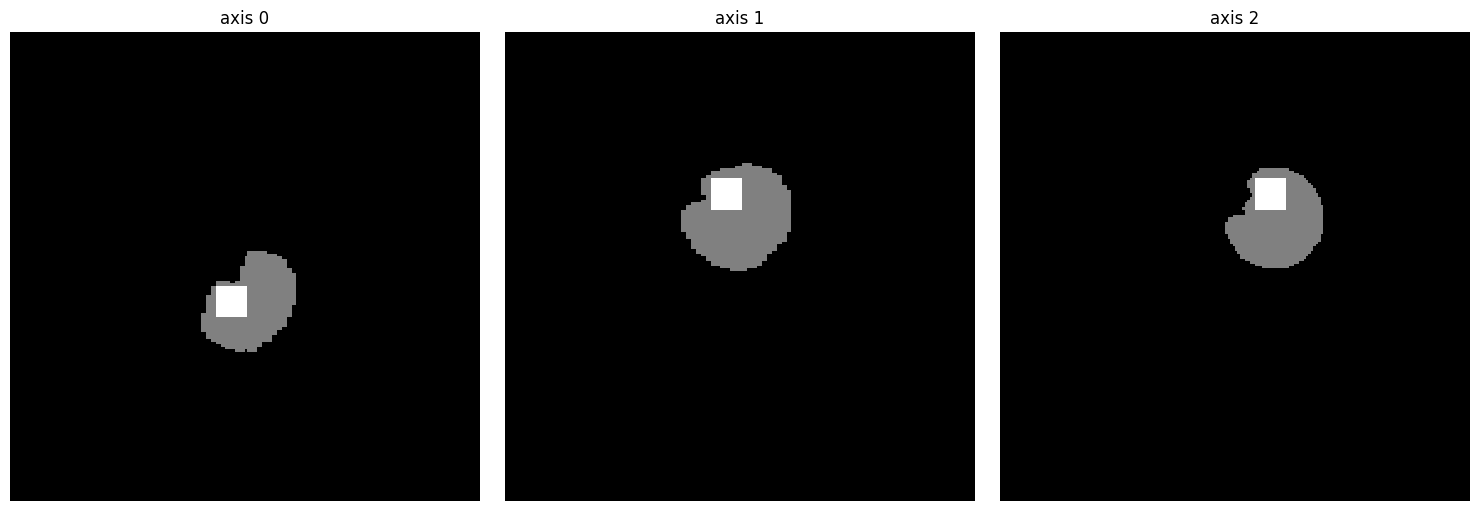

0.9791666666666666


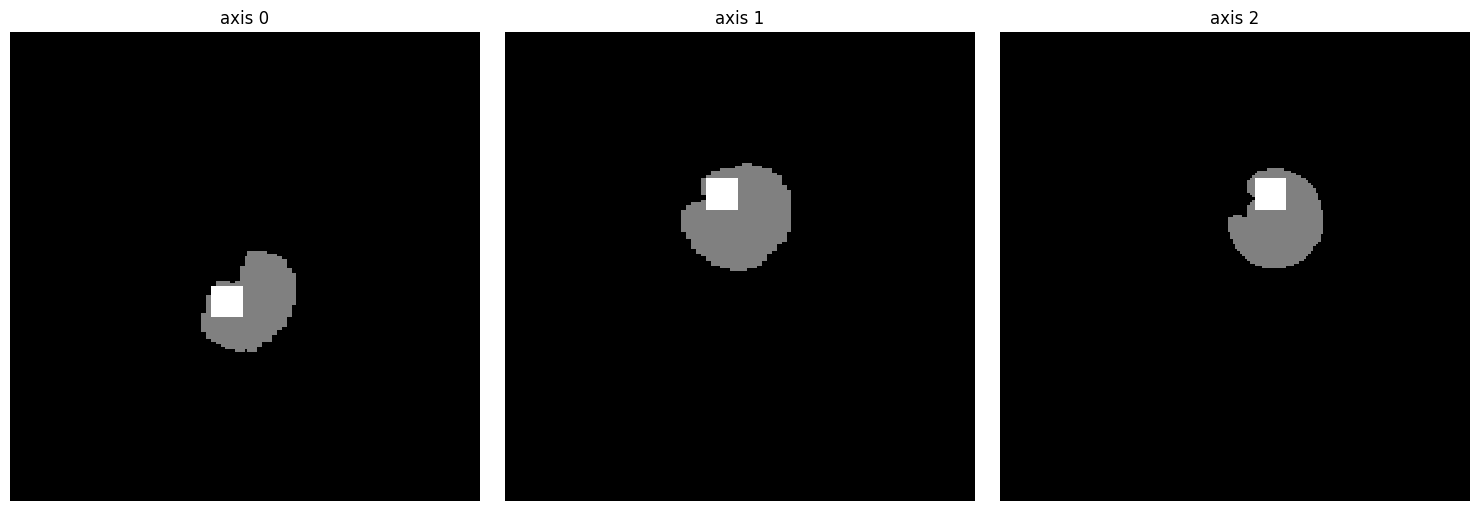

0.9768518518518519


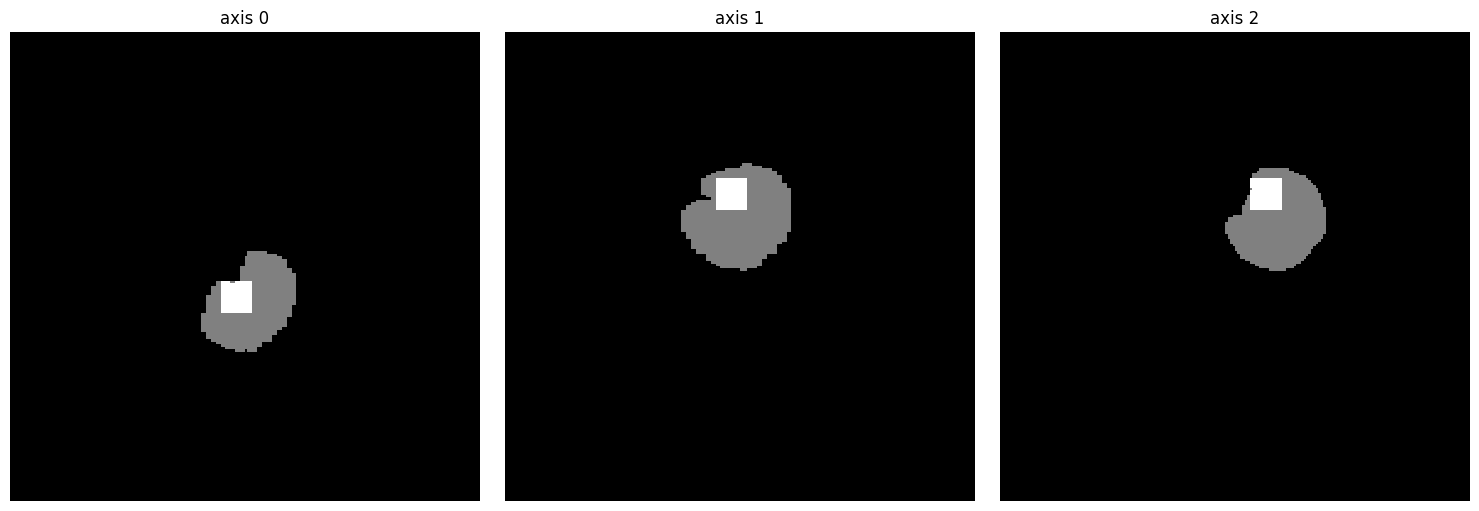

0.9641203703703703


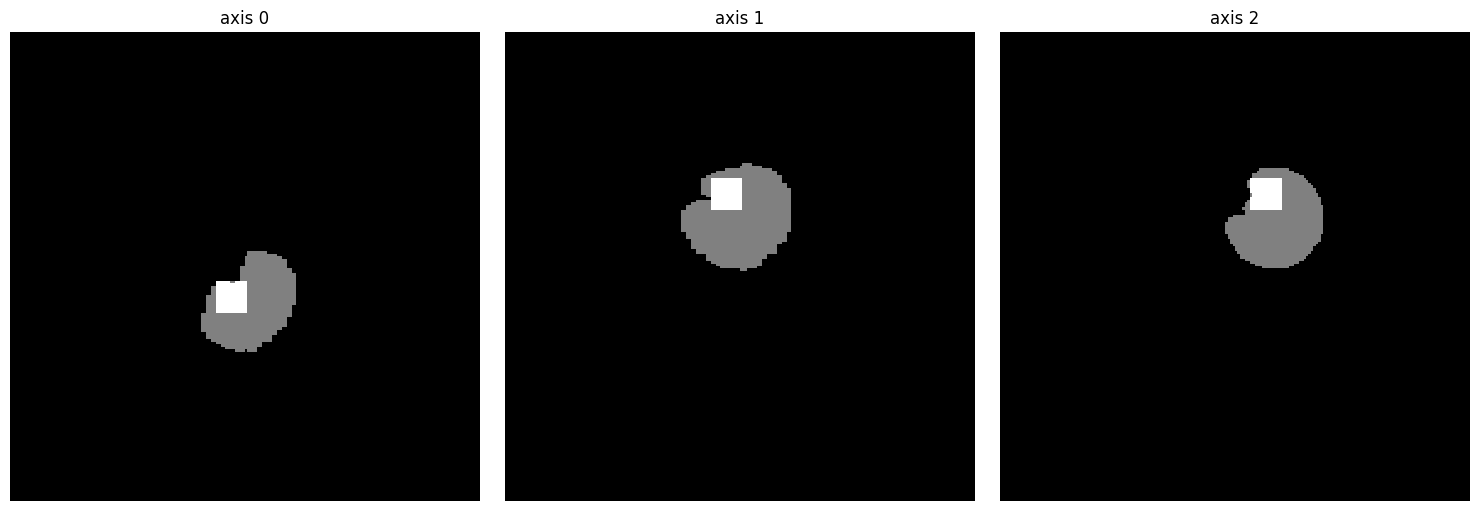

0.9236111111111112


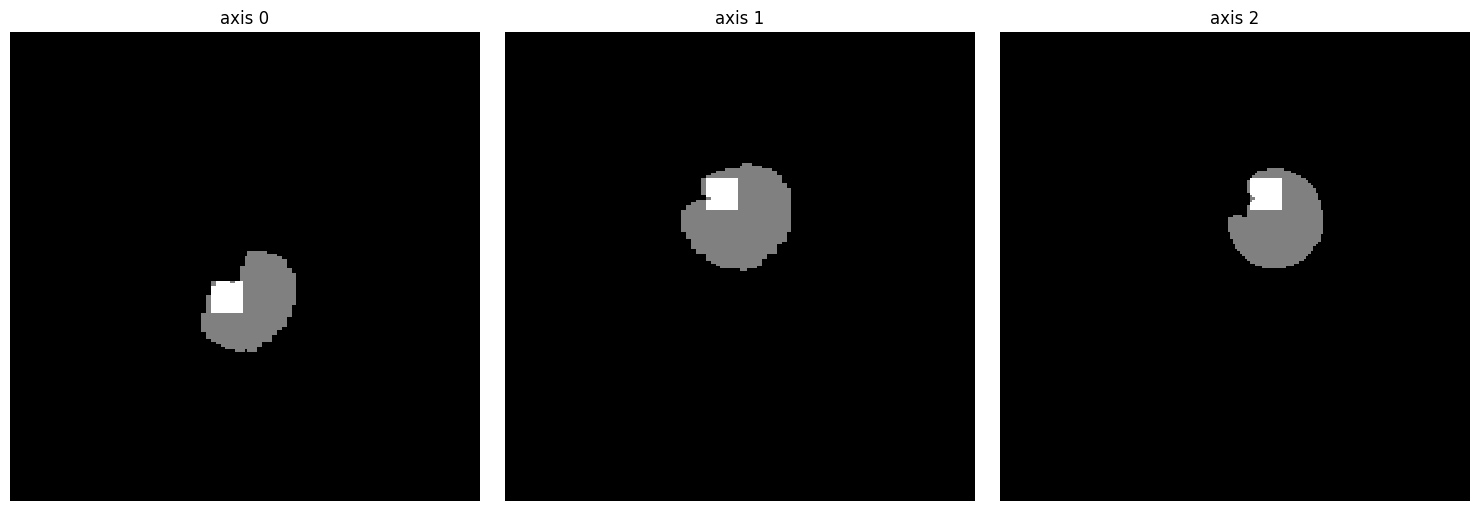

1.0


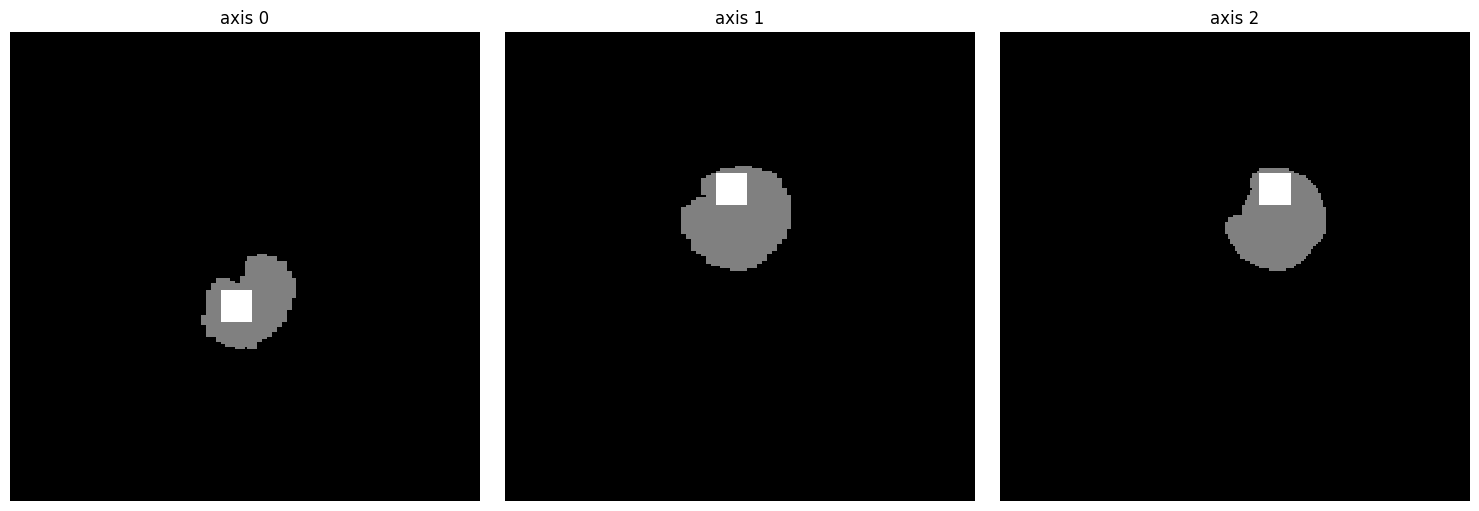

0.9988425925925926


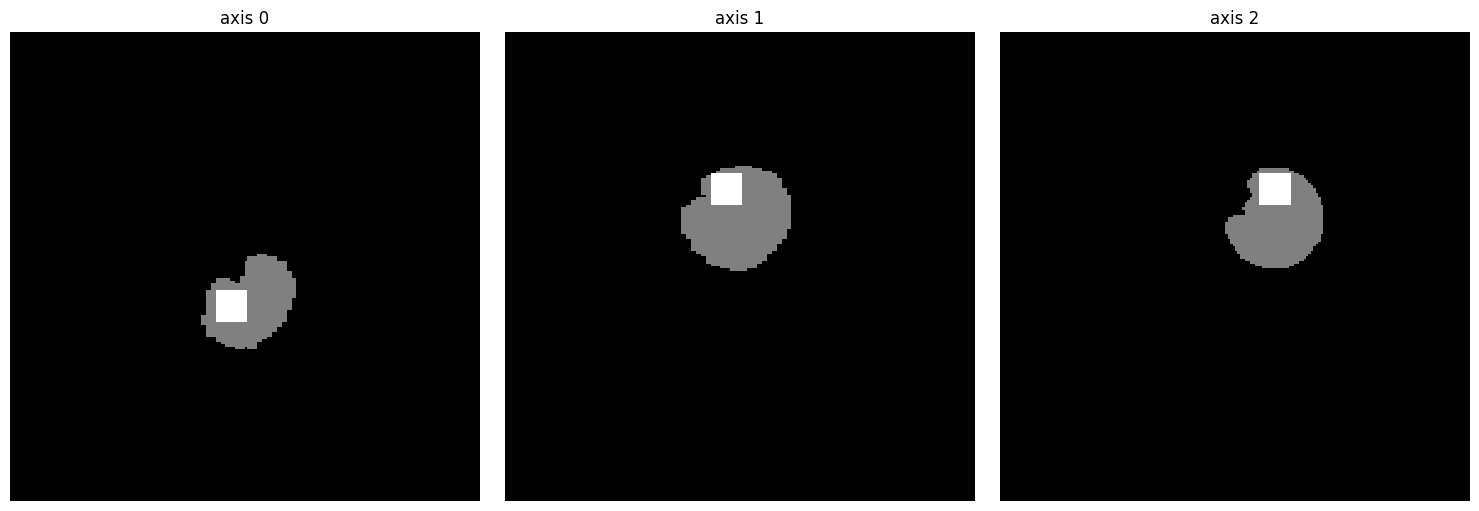

0.9745370370370371


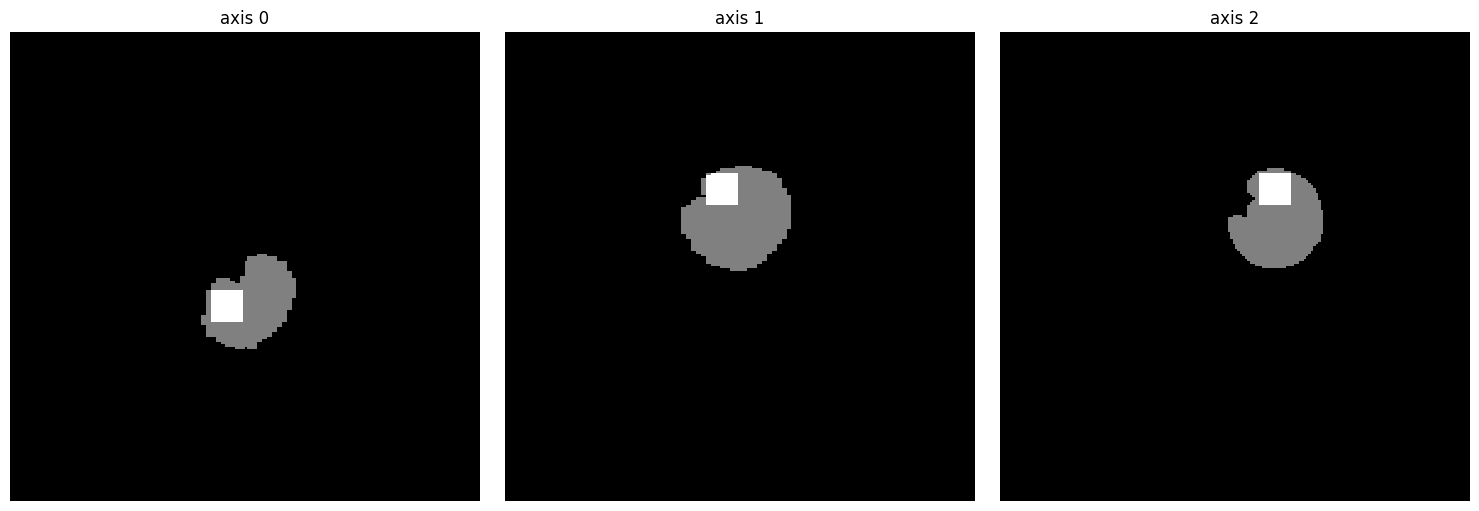

1.0


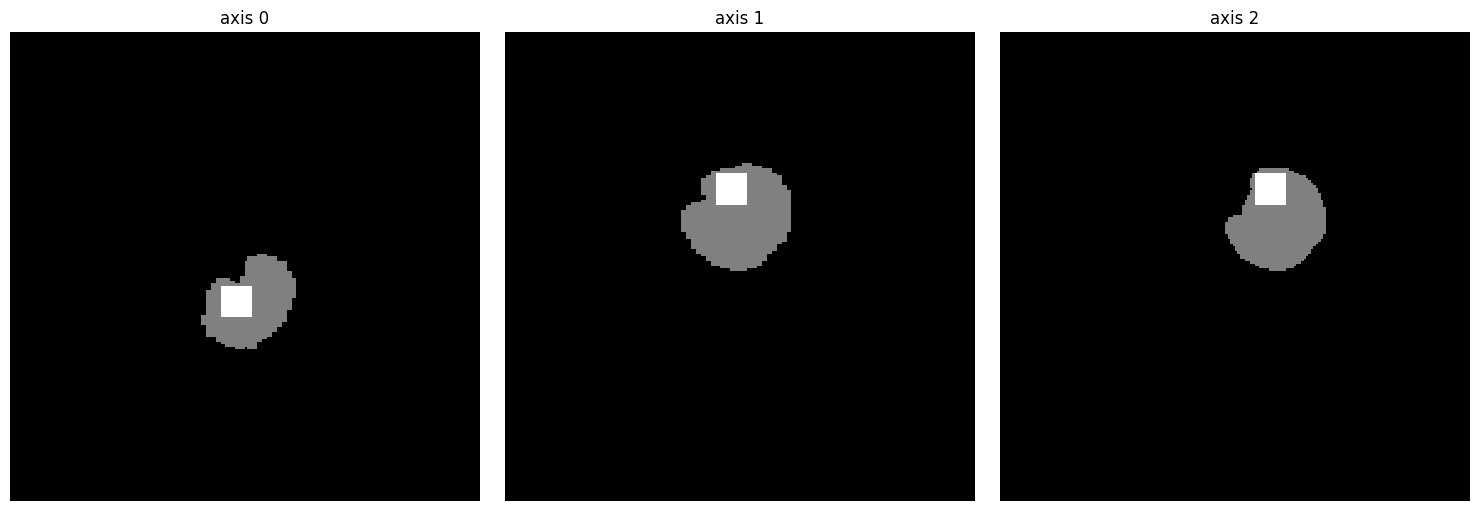

0.9965277777777778


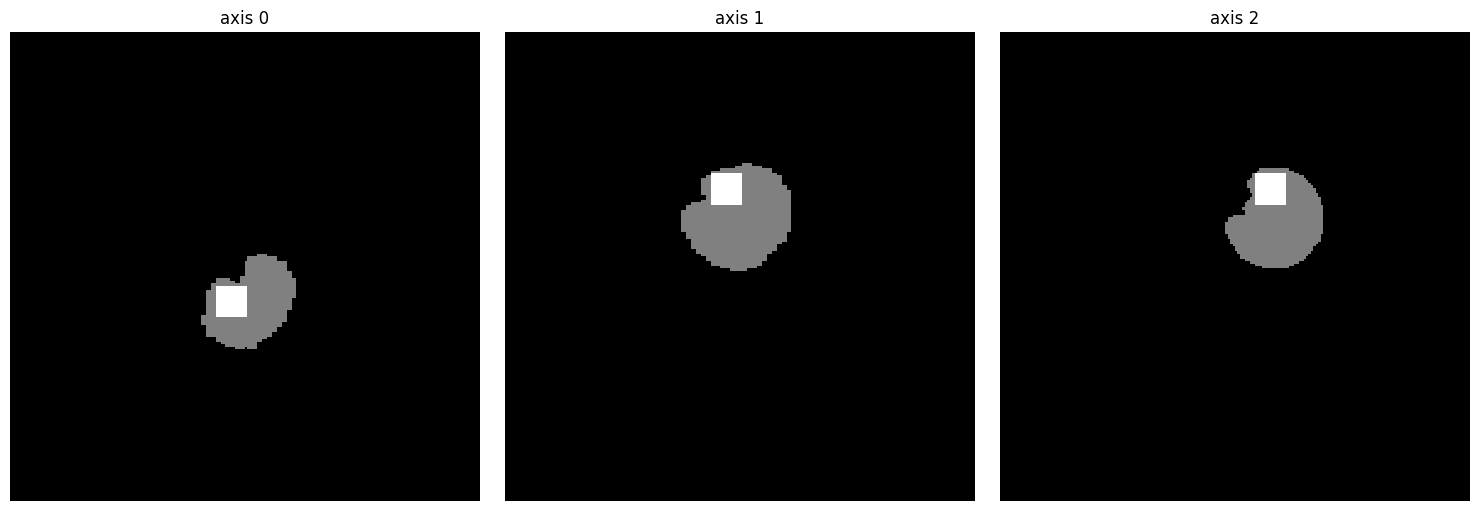

0.9629629629629629


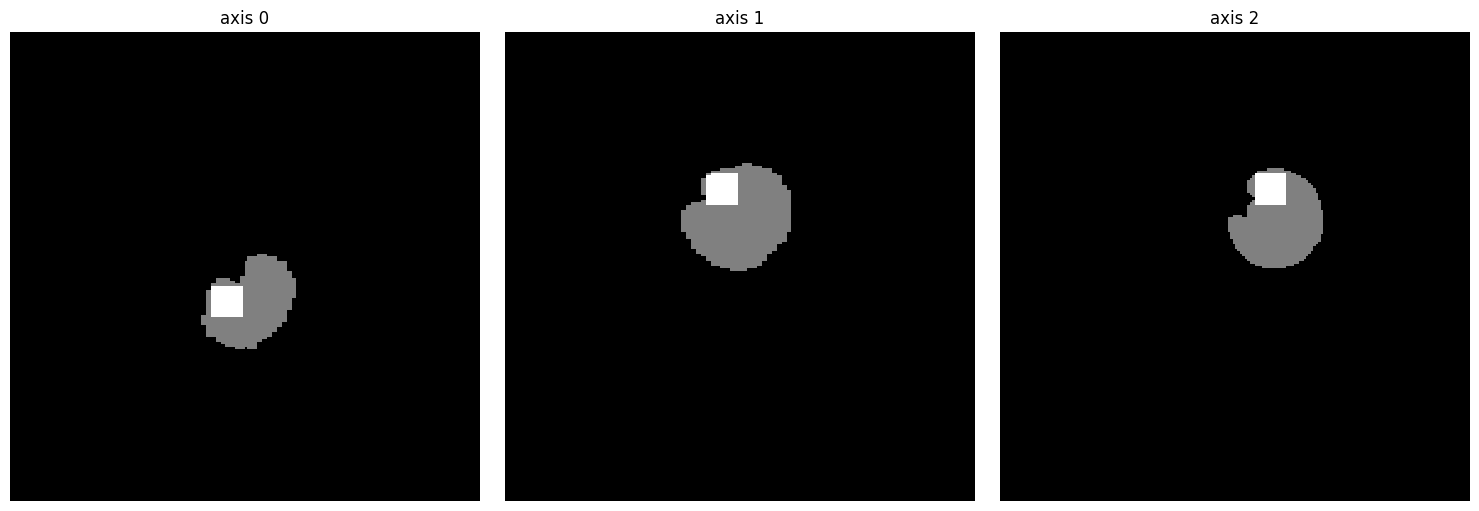

0.9710648148148148


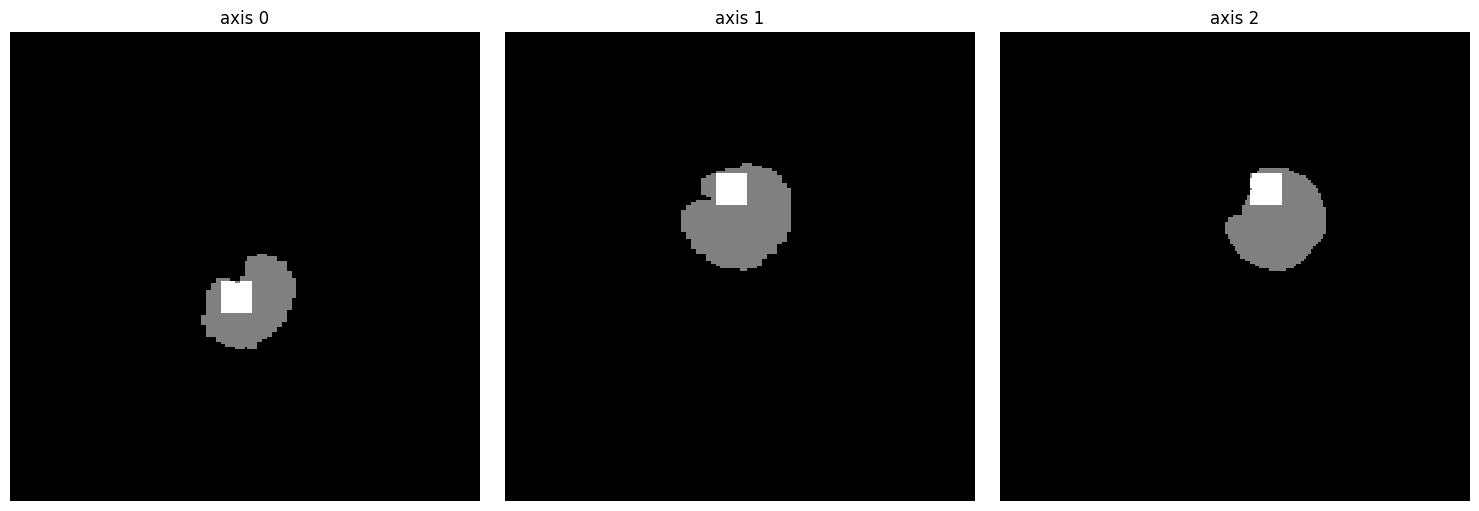

0.9560185185185185


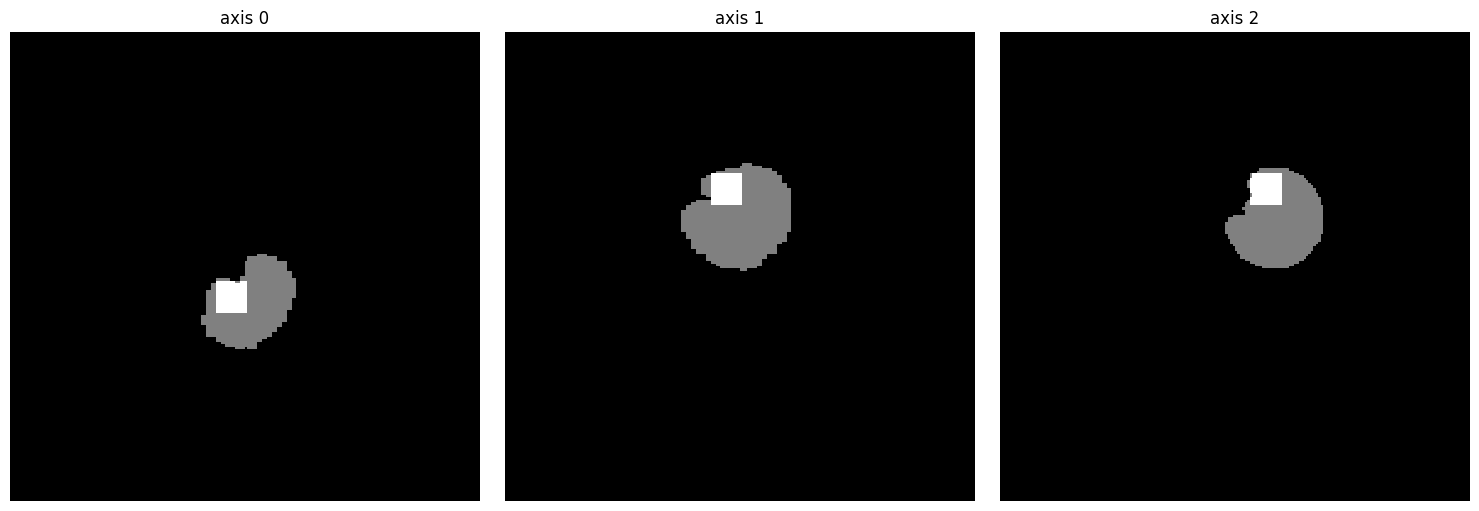

0.9027777777777778


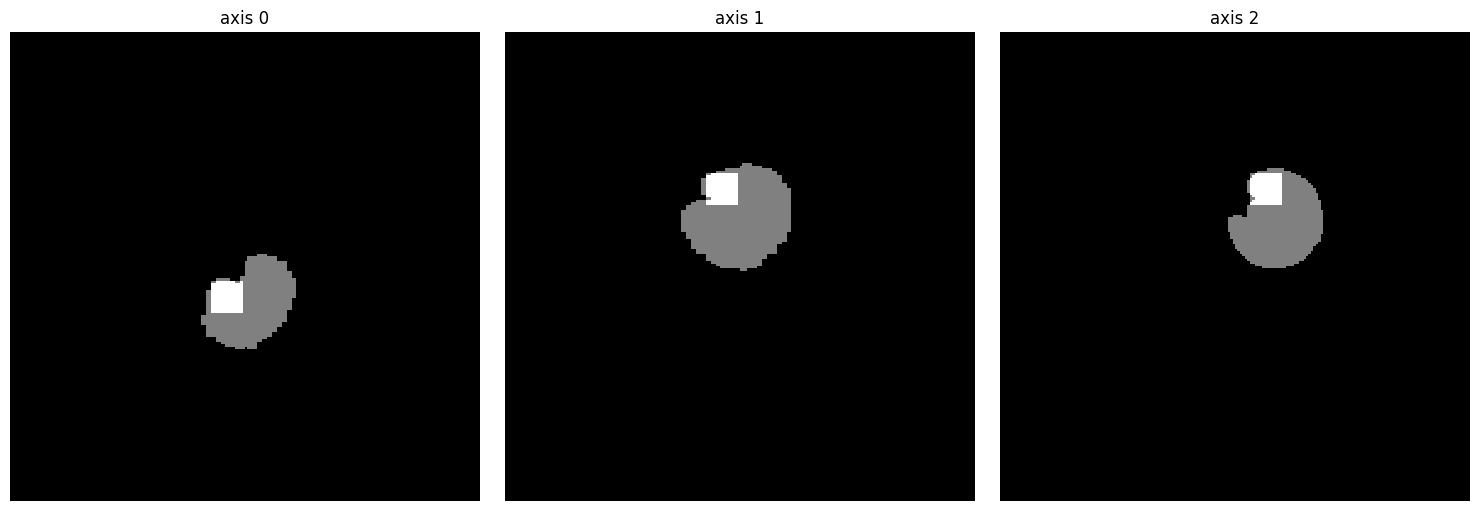

0.998


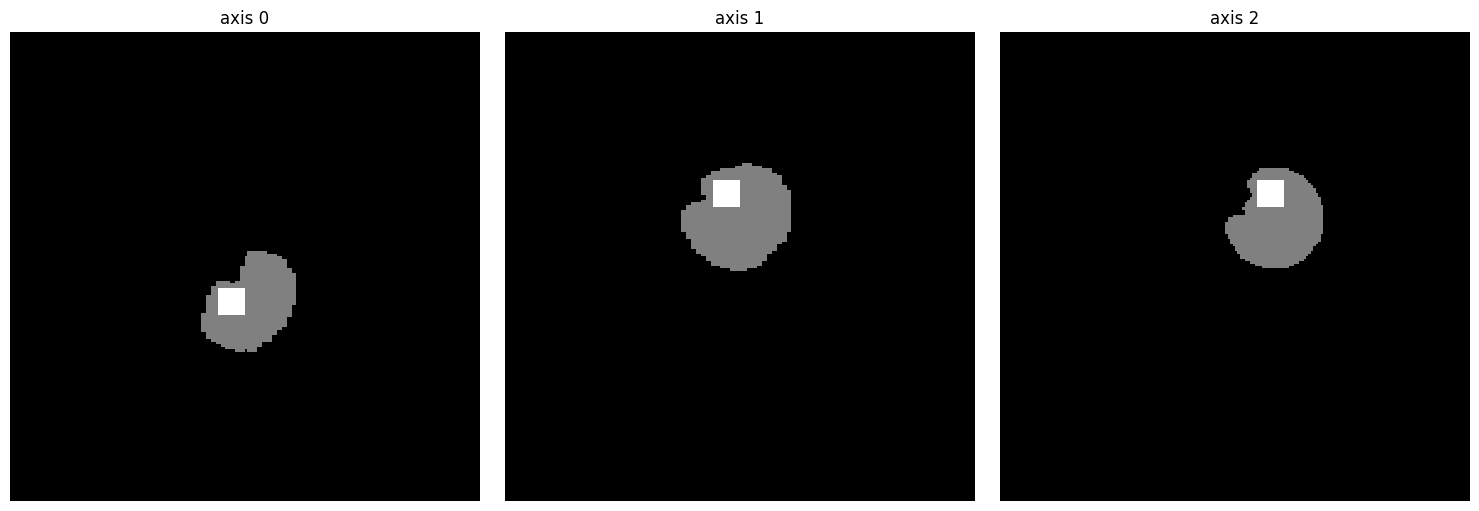

0.998


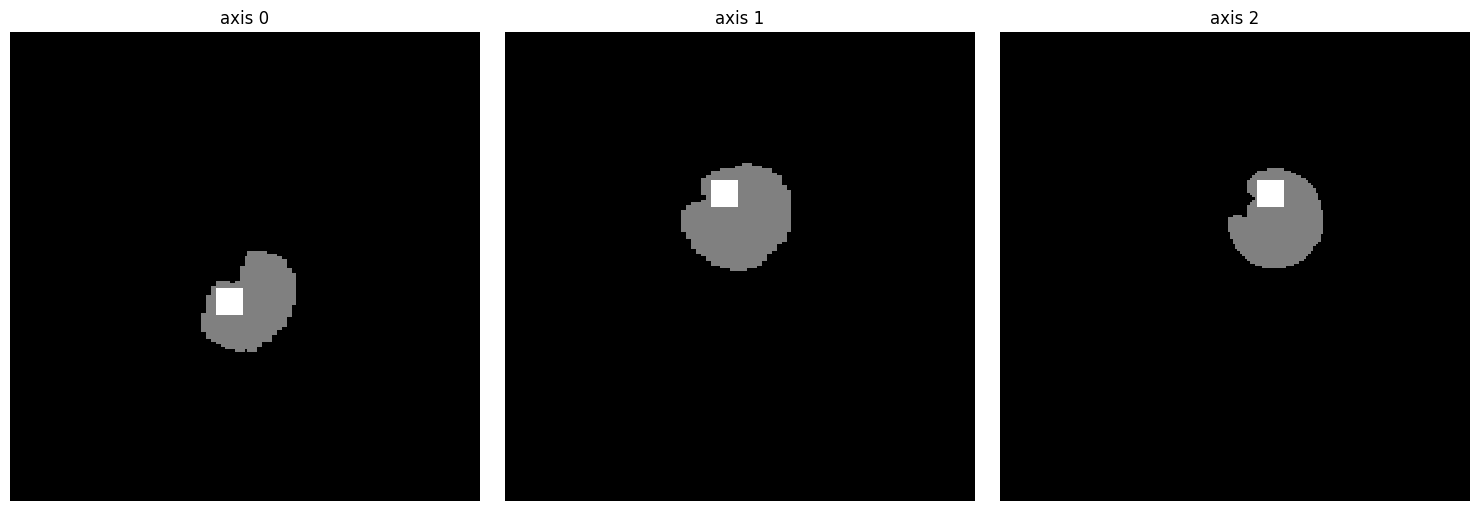

0.989


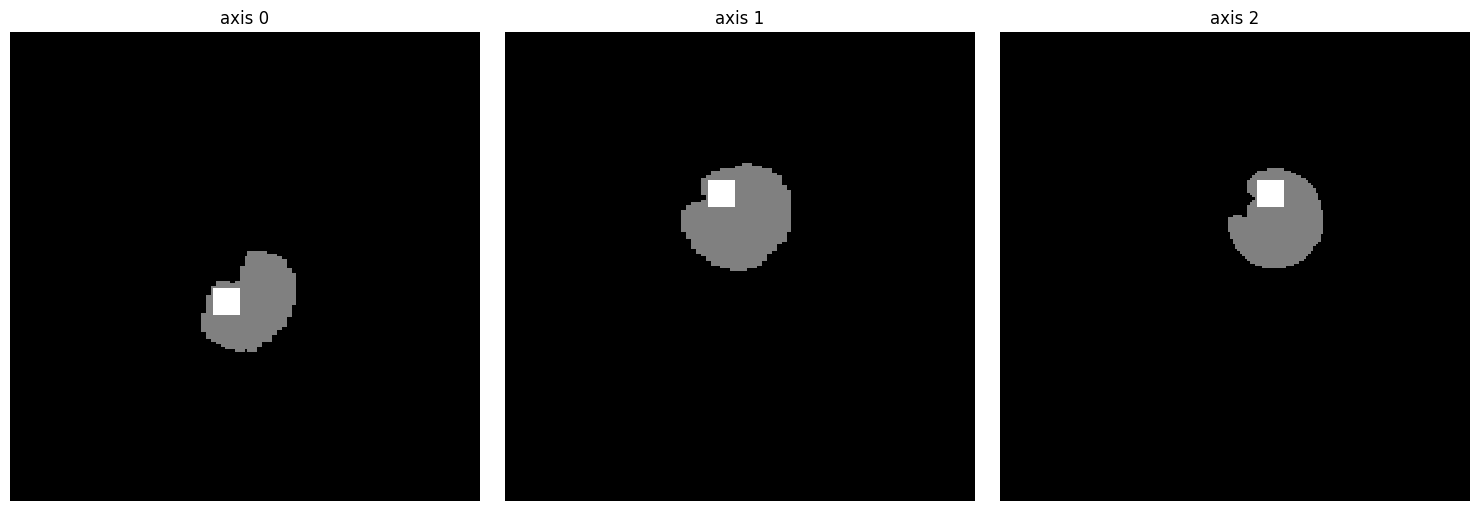

0.995


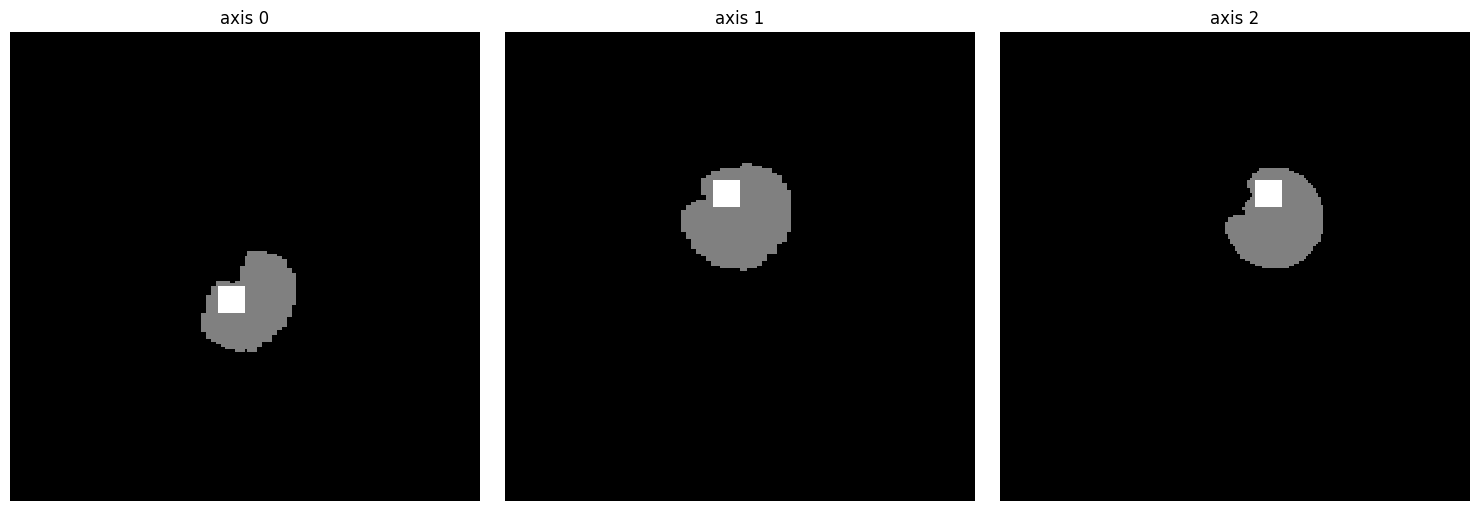

0.994


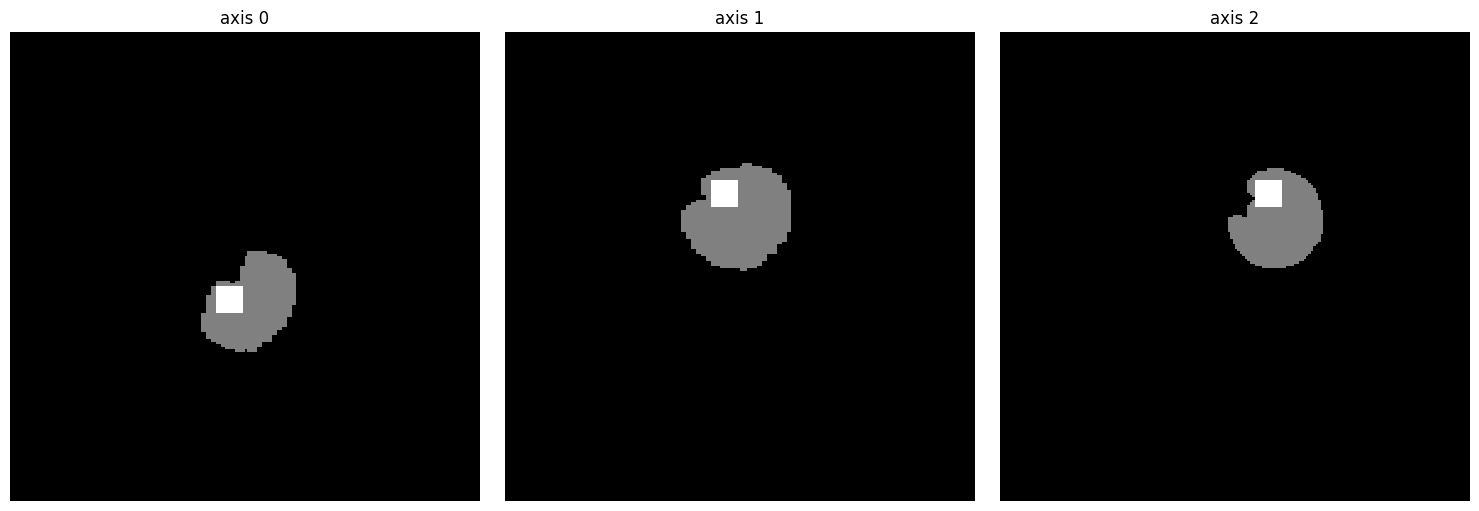

0.981


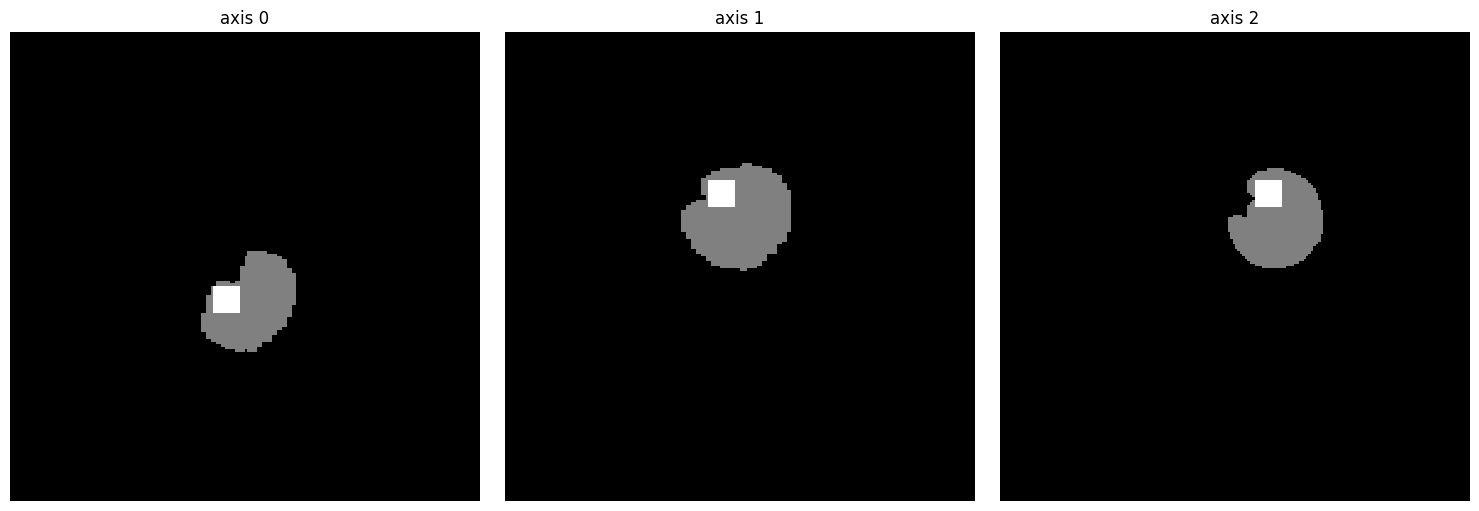

0.984


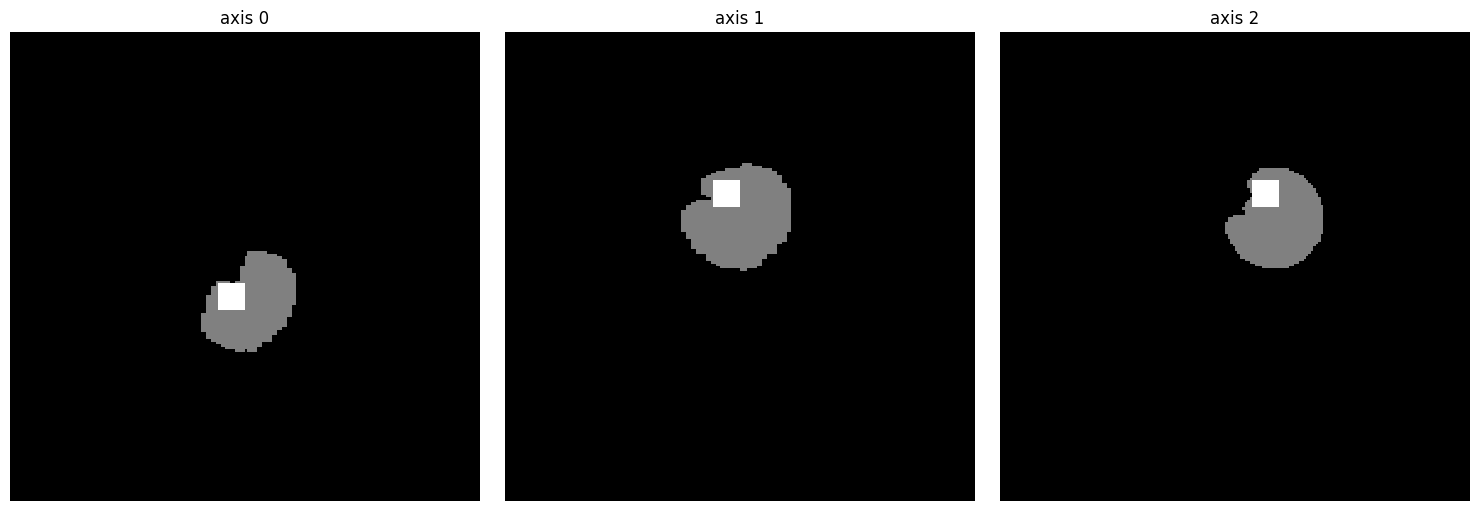

0.98


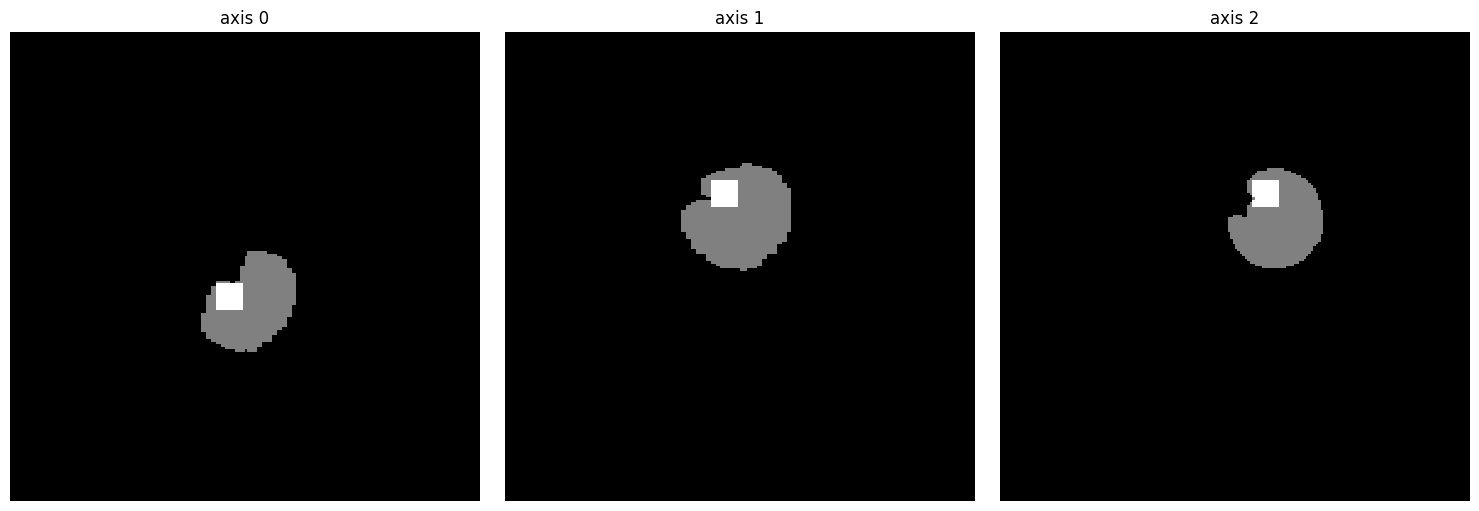

0.959


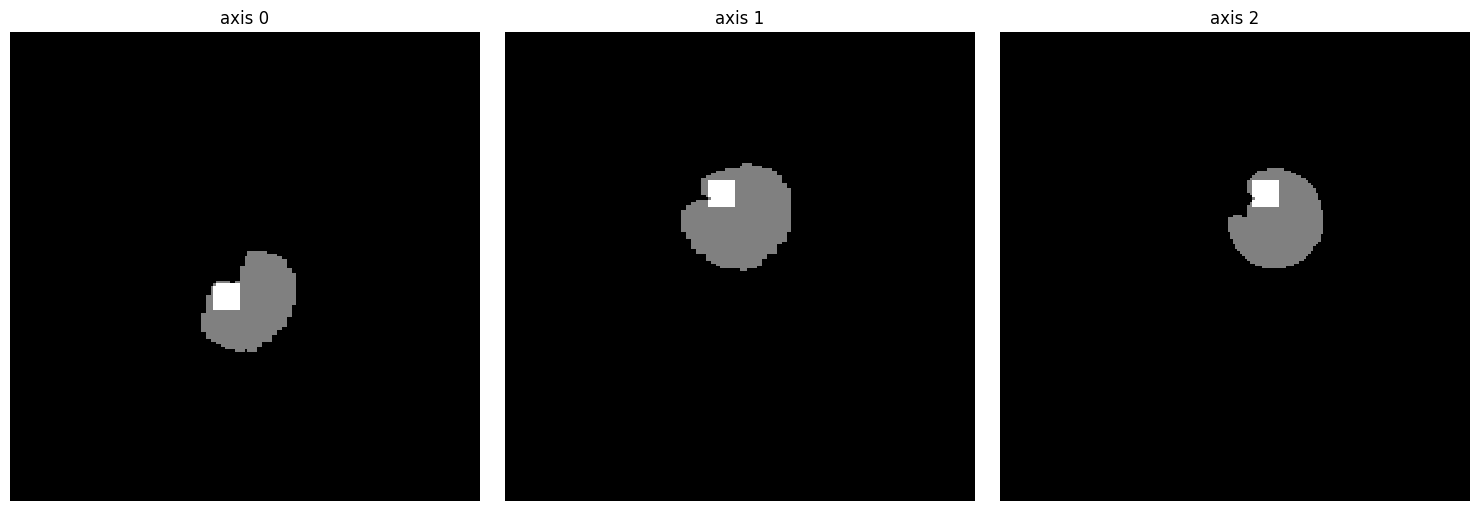

1.0


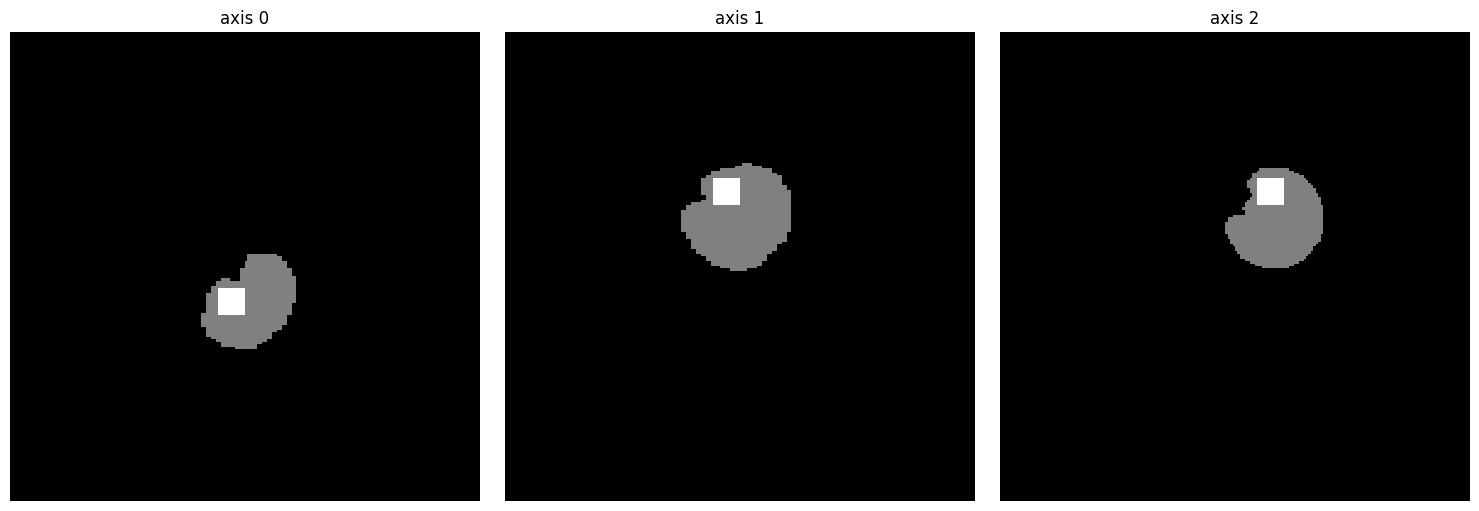

1.0


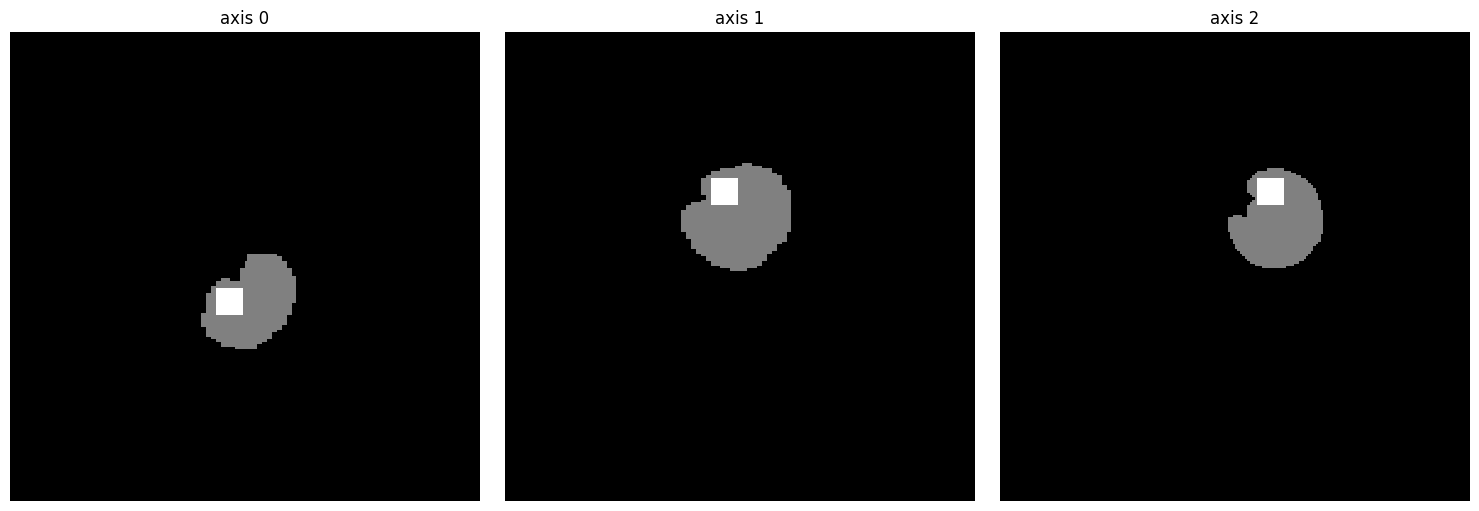

0.991


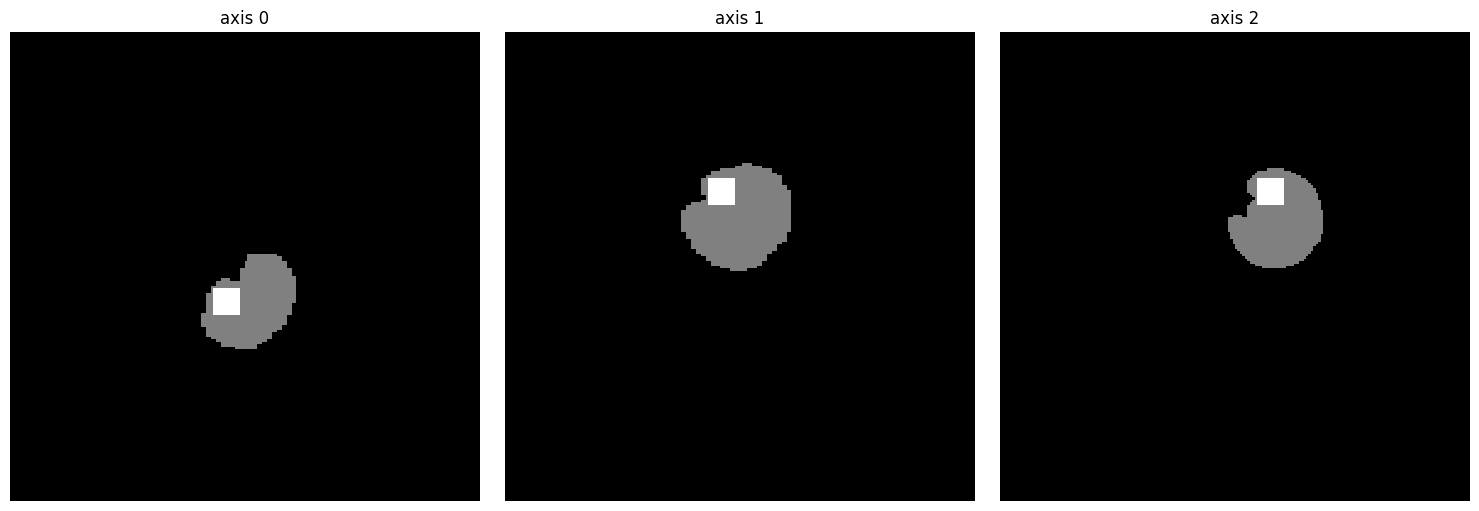

1.0


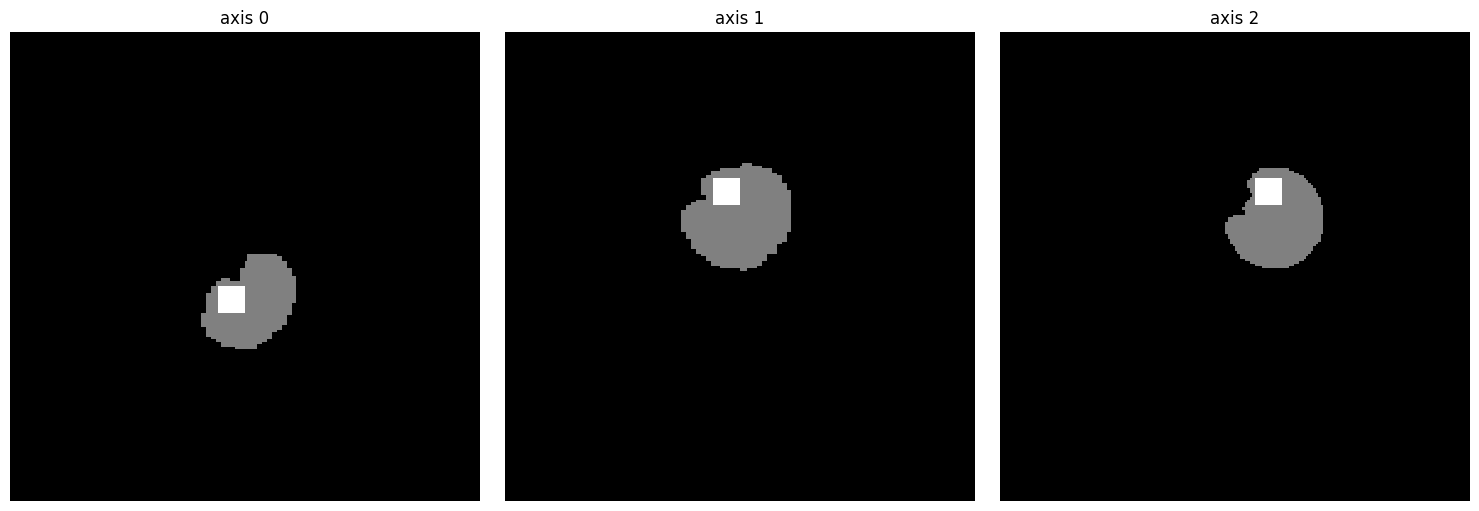

1.0


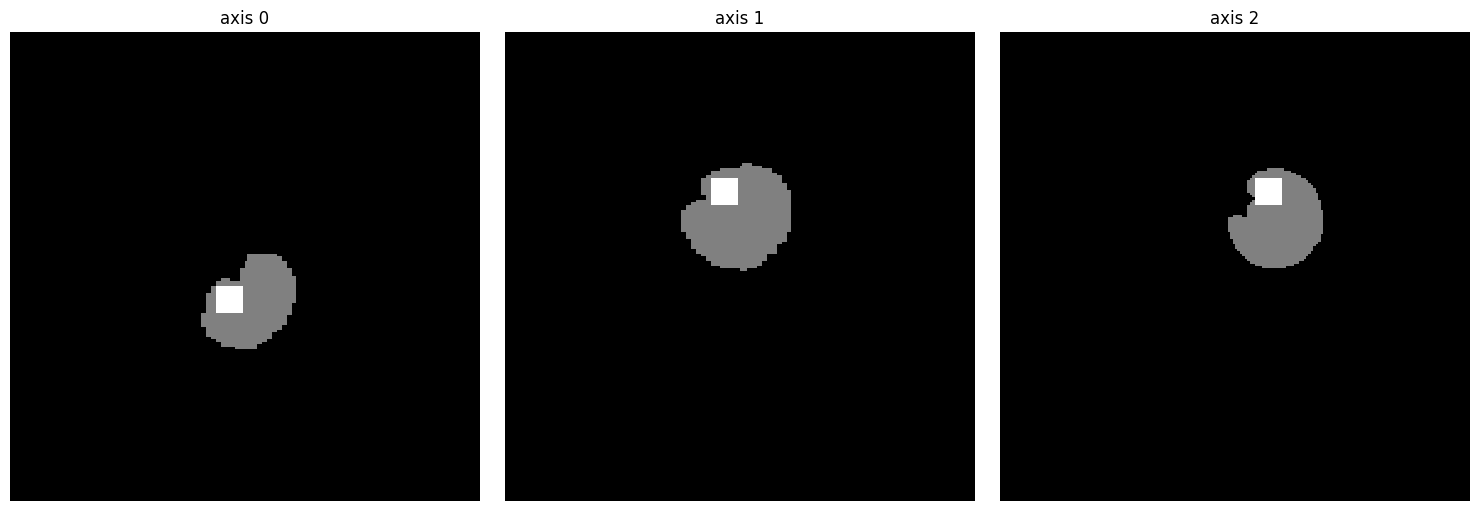

0.987


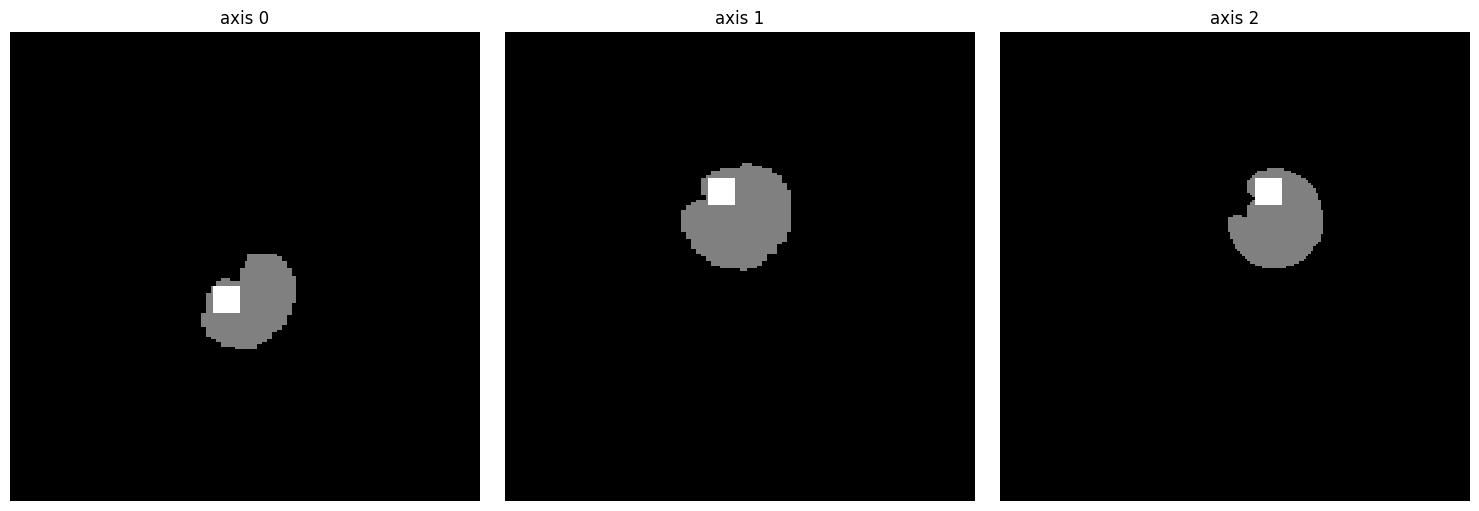

0.992


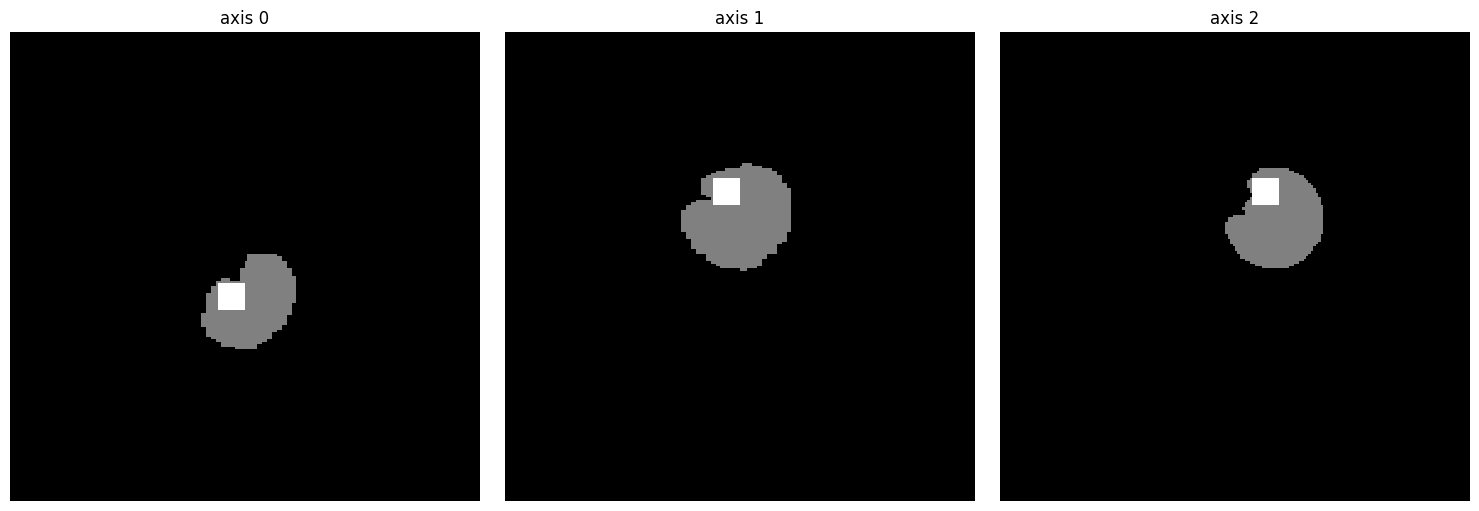

0.99


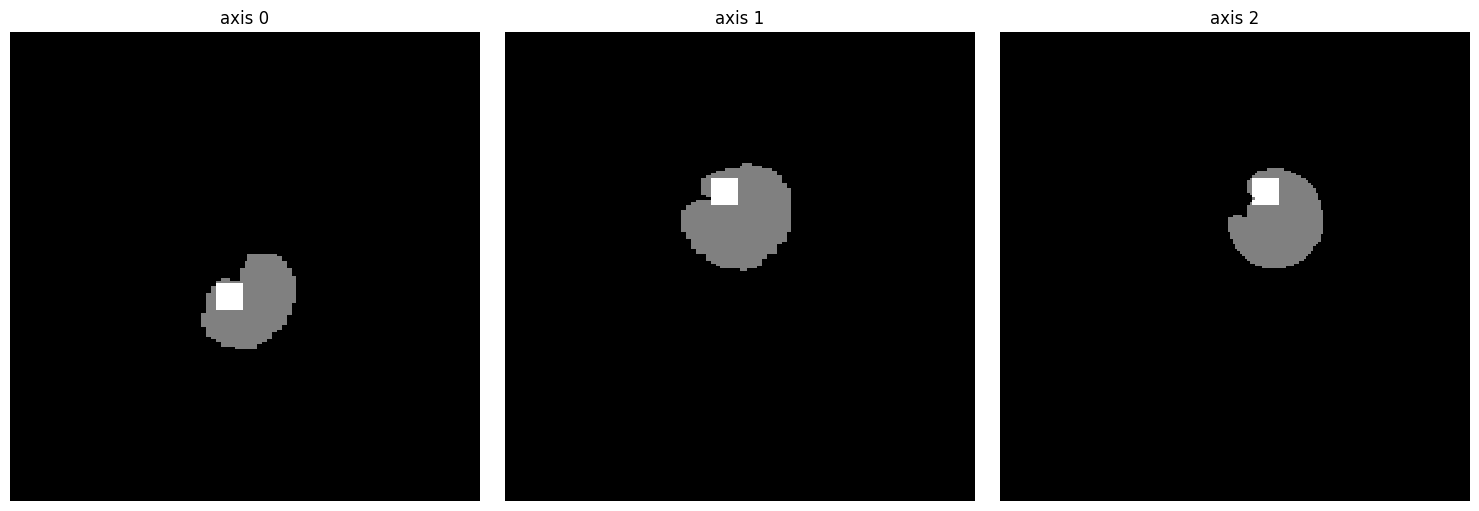

0.969


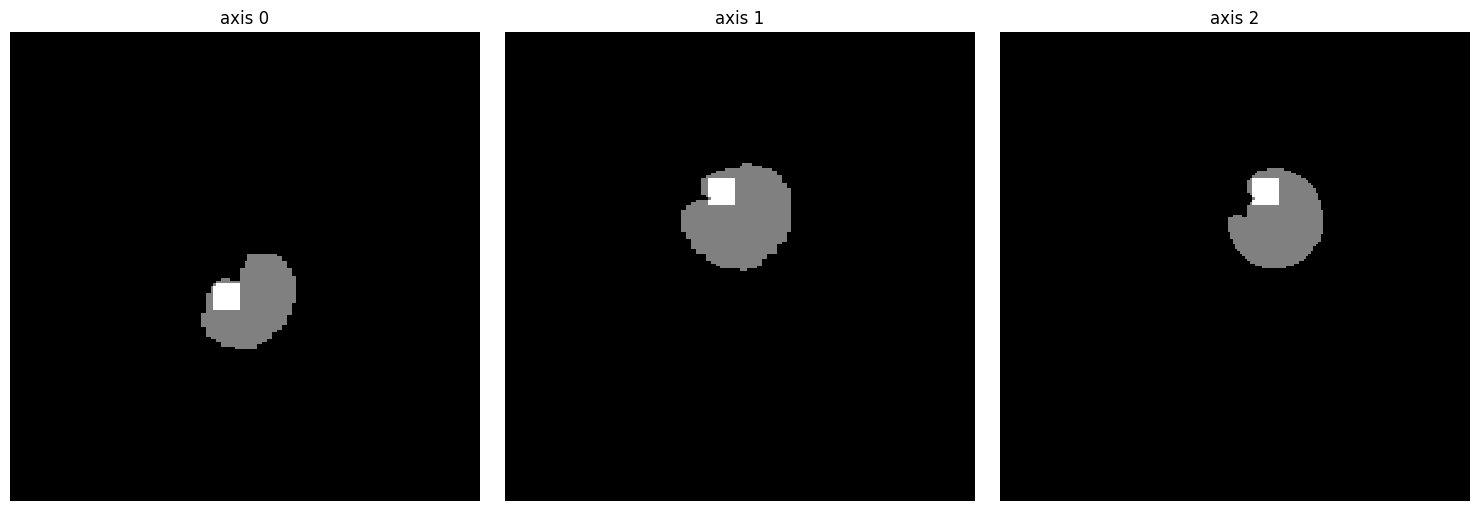

1.0


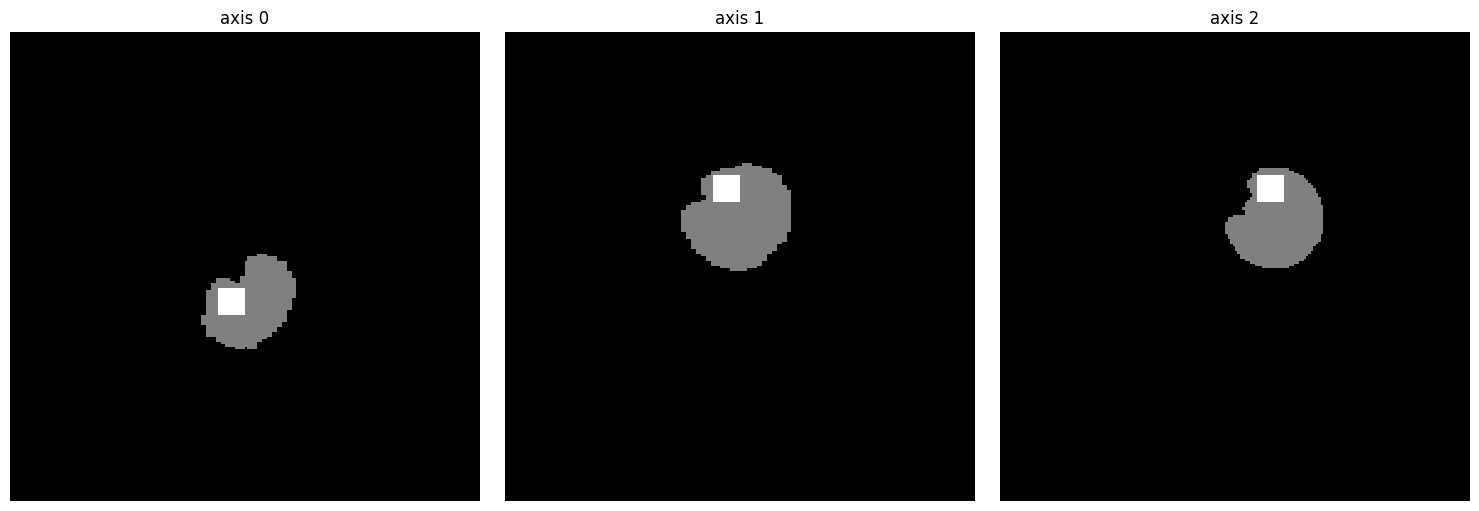

1.0


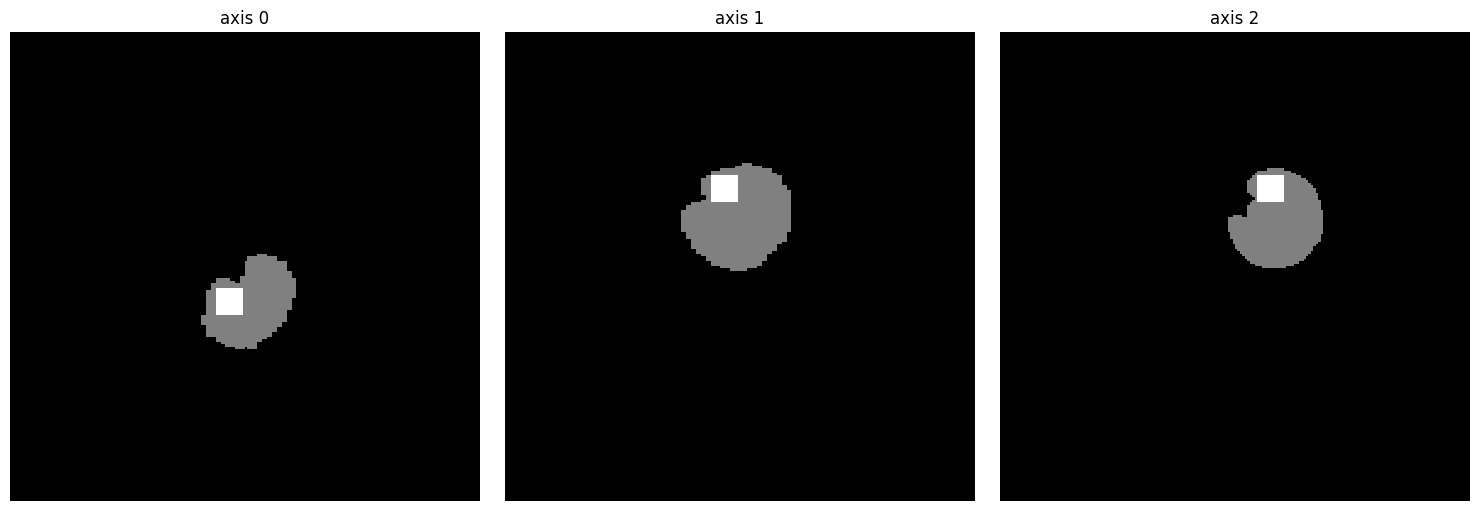

0.99


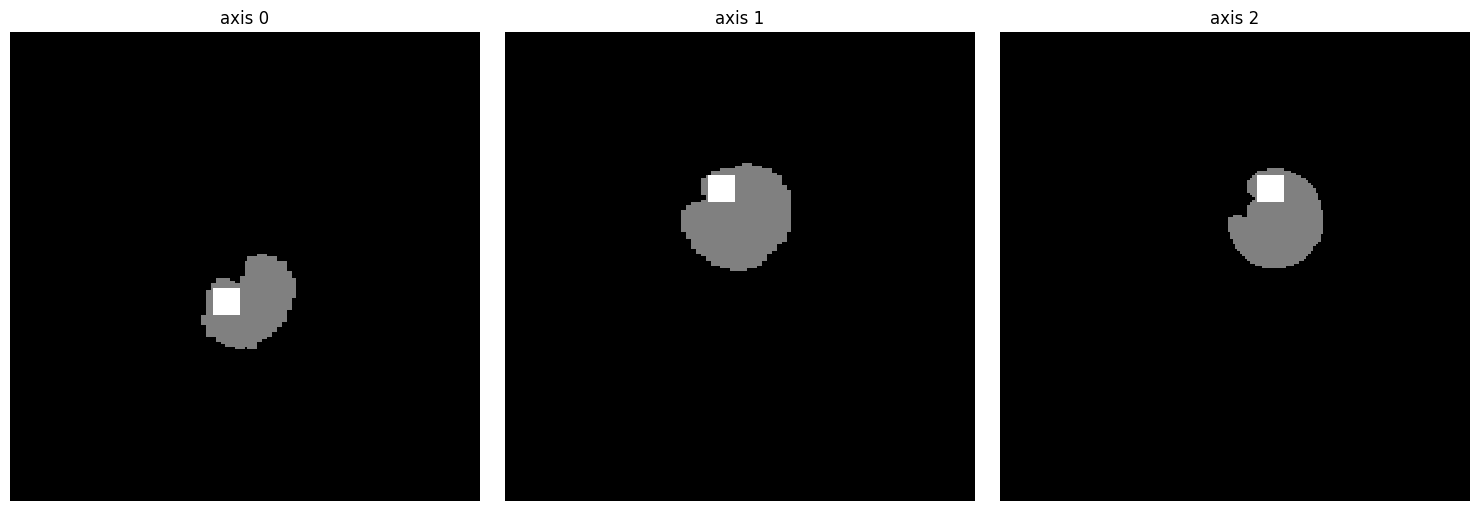

0.999


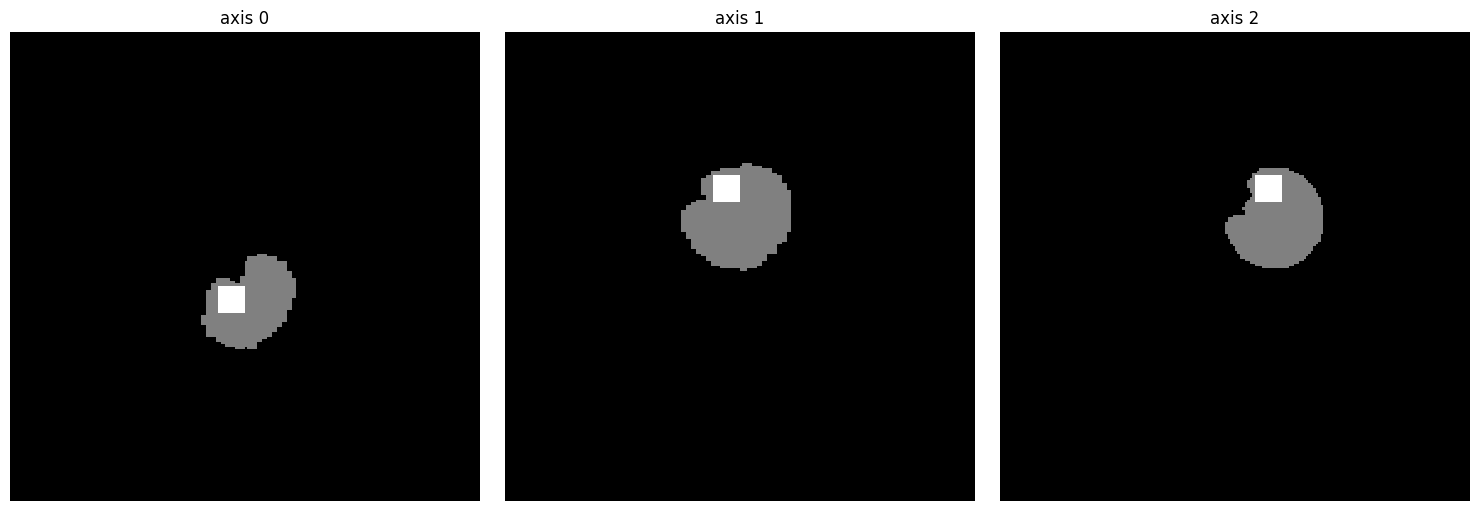

0.998


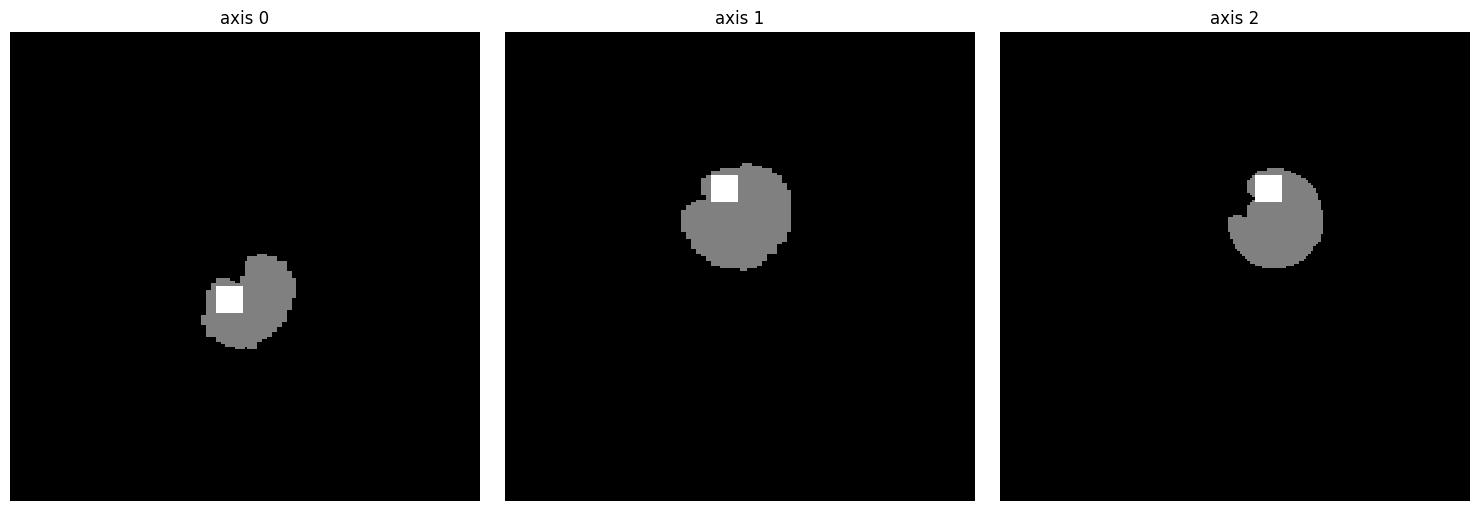

0.984


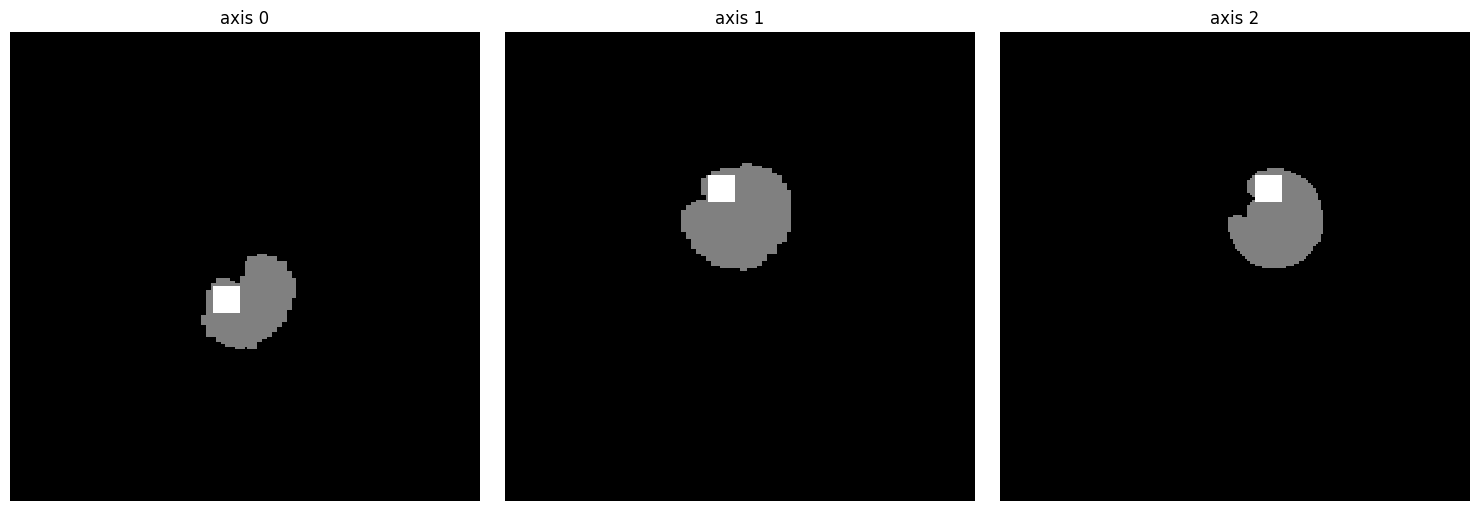

0.993


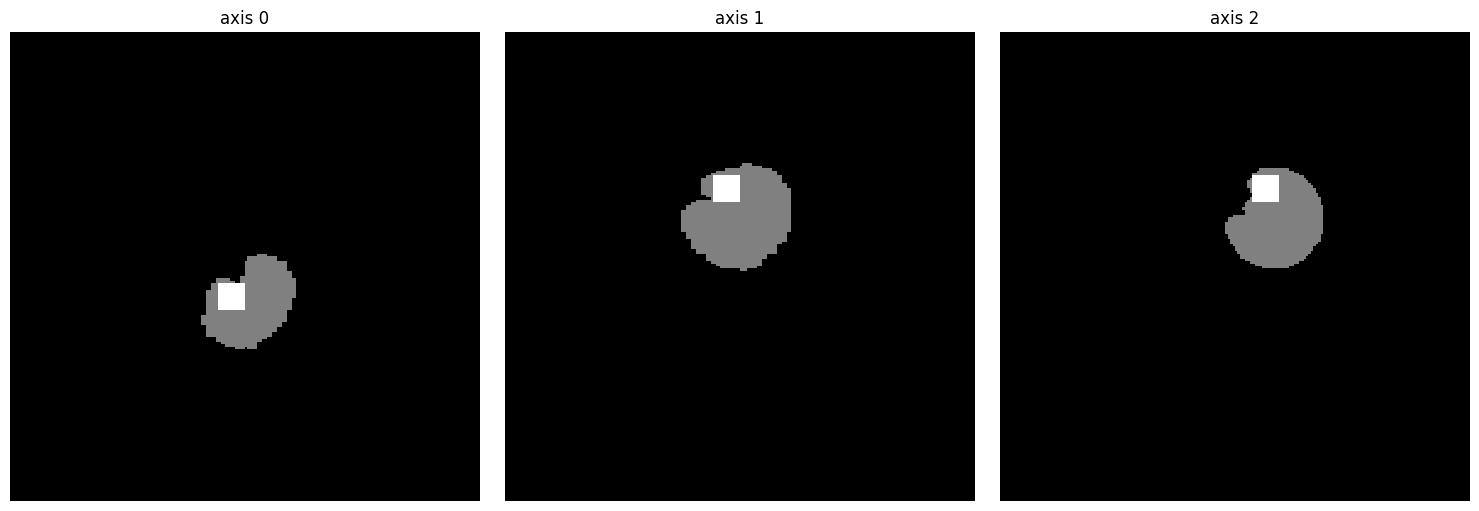

0.99


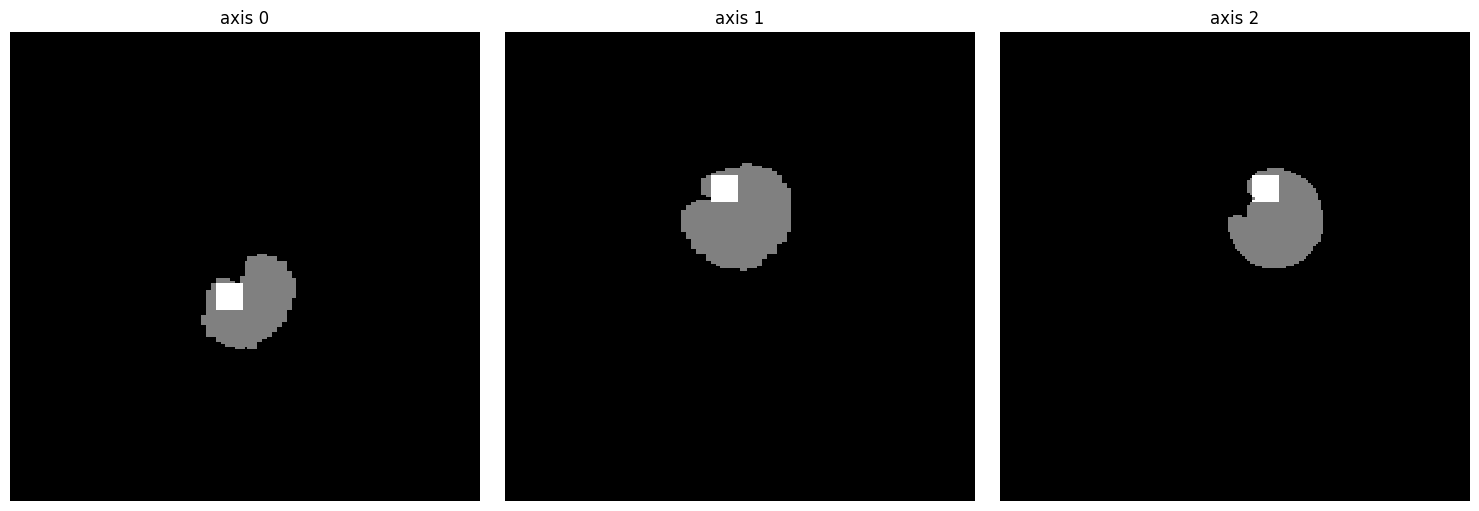

0.968


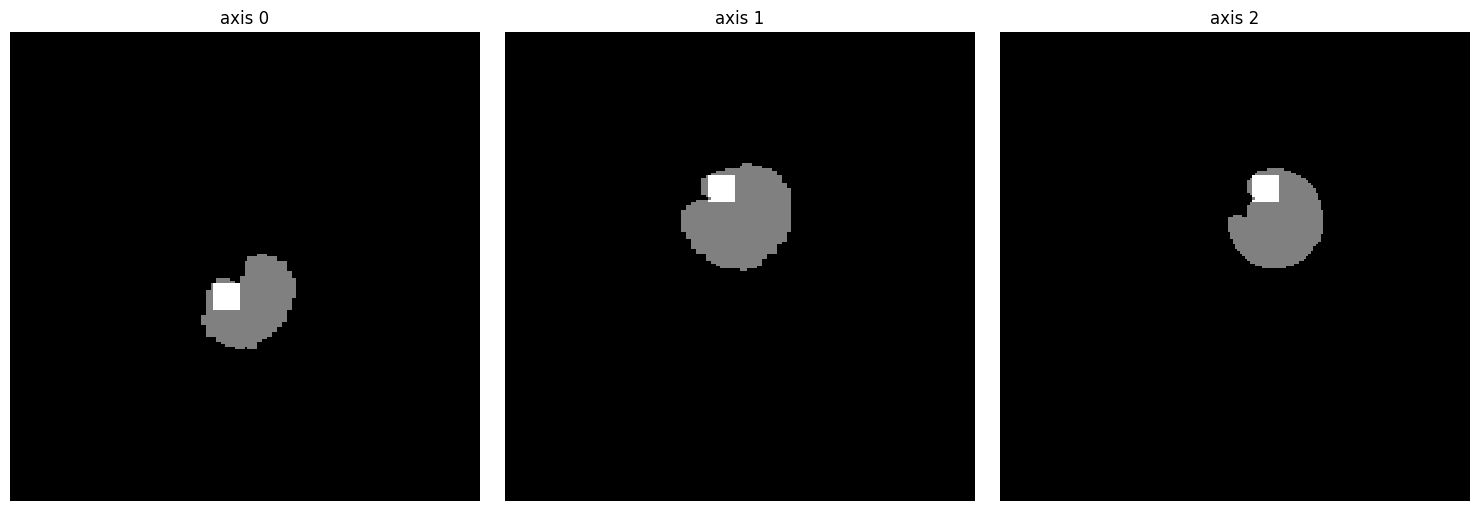

1.0


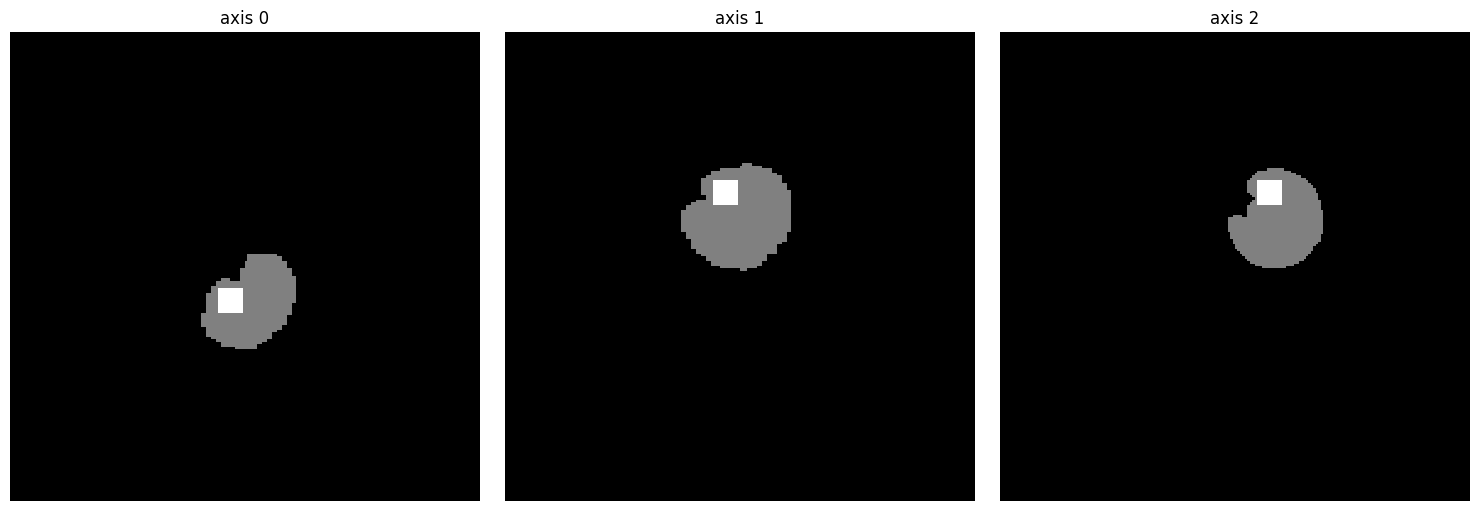

1.0


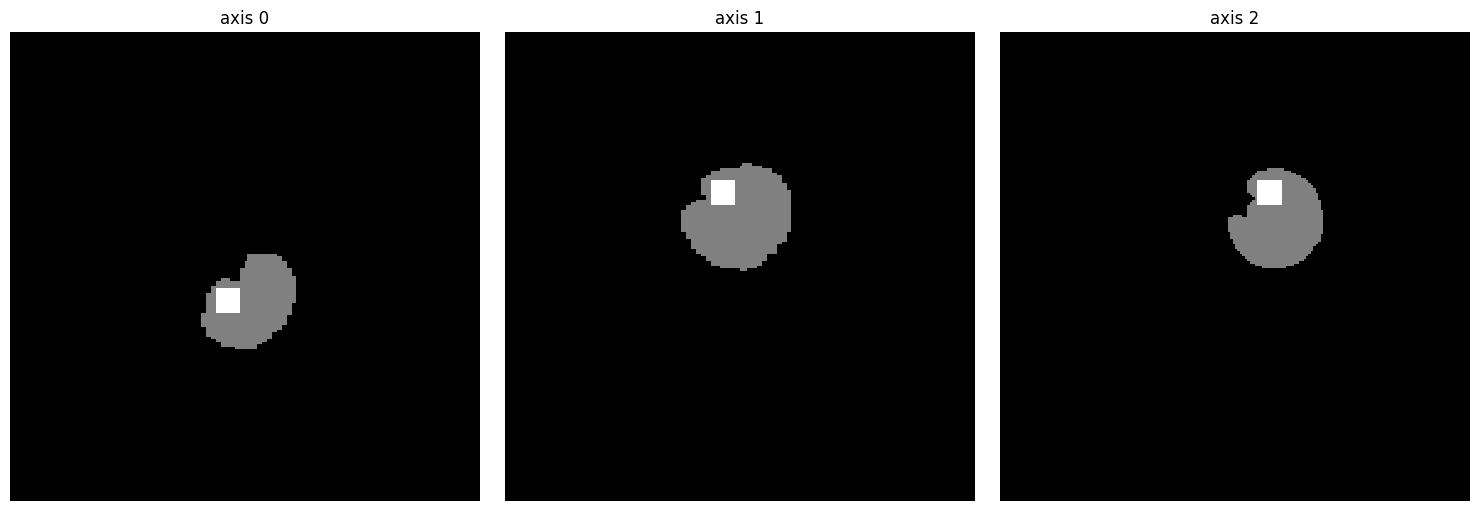

0.9876543209876543


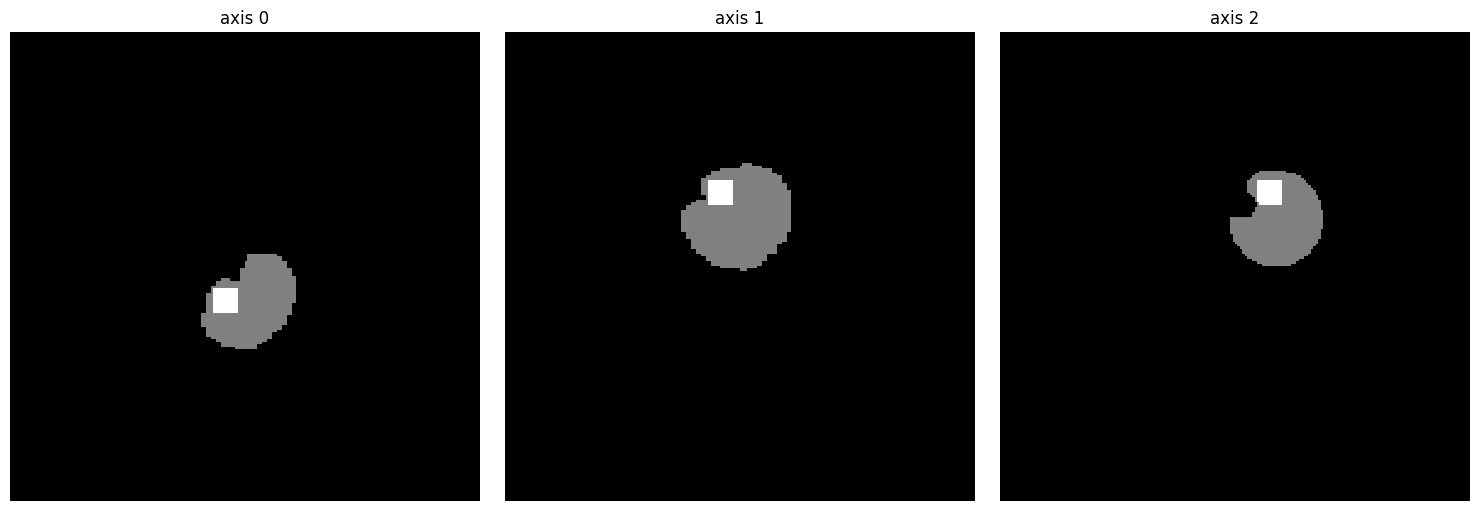

1.0


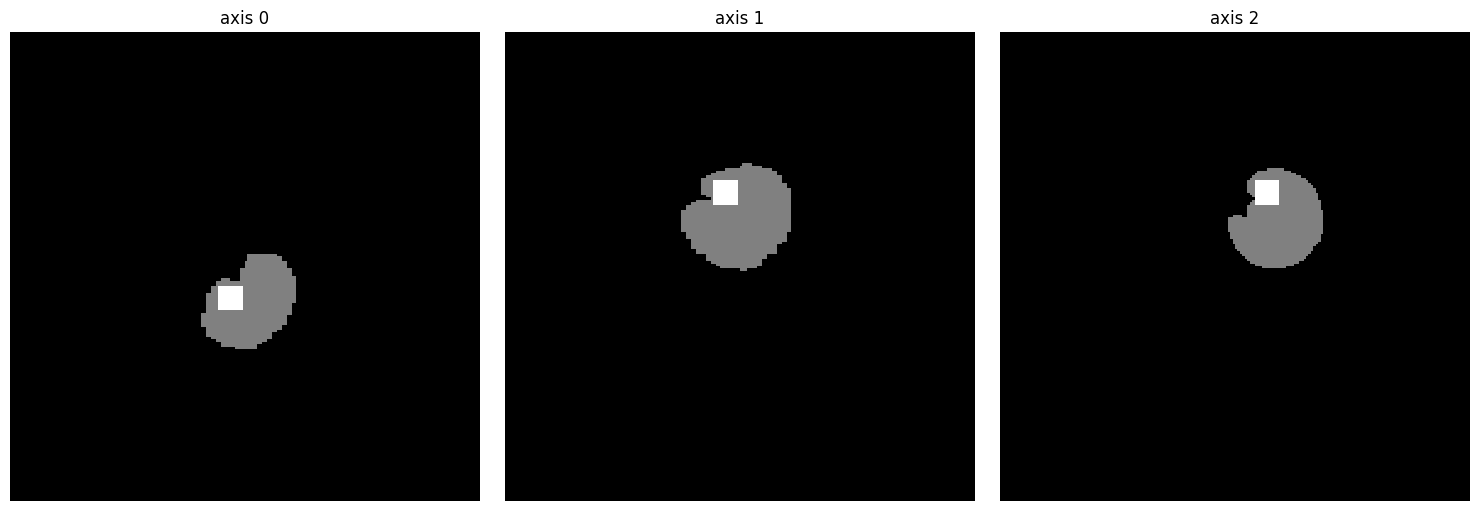

1.0


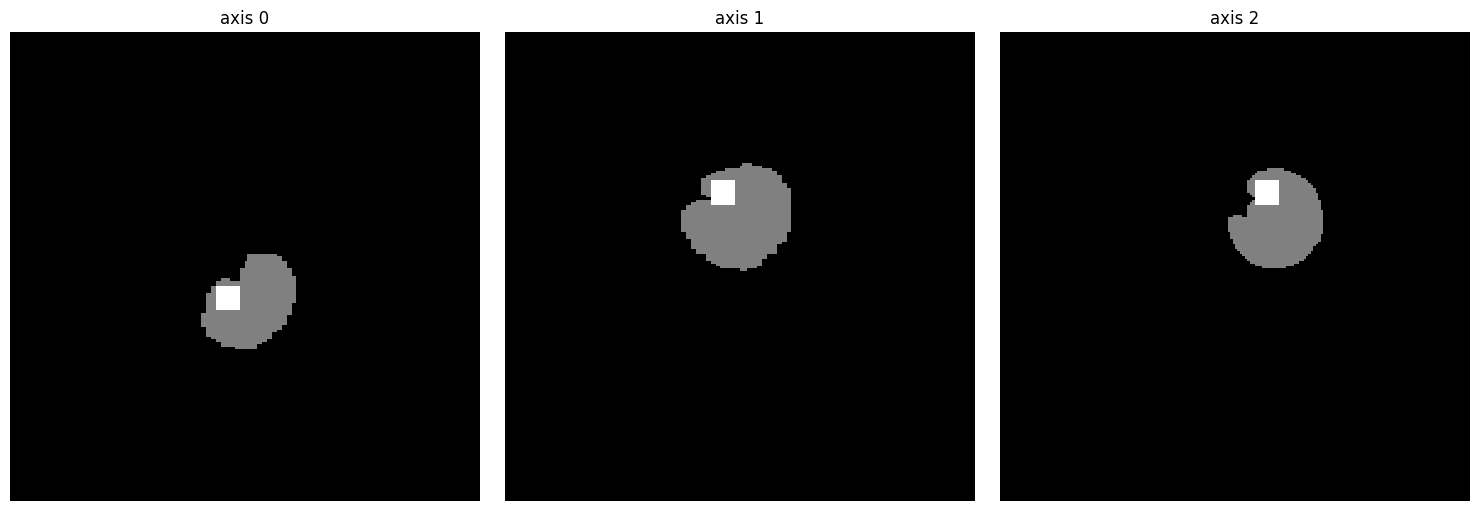

0.9835390946502057


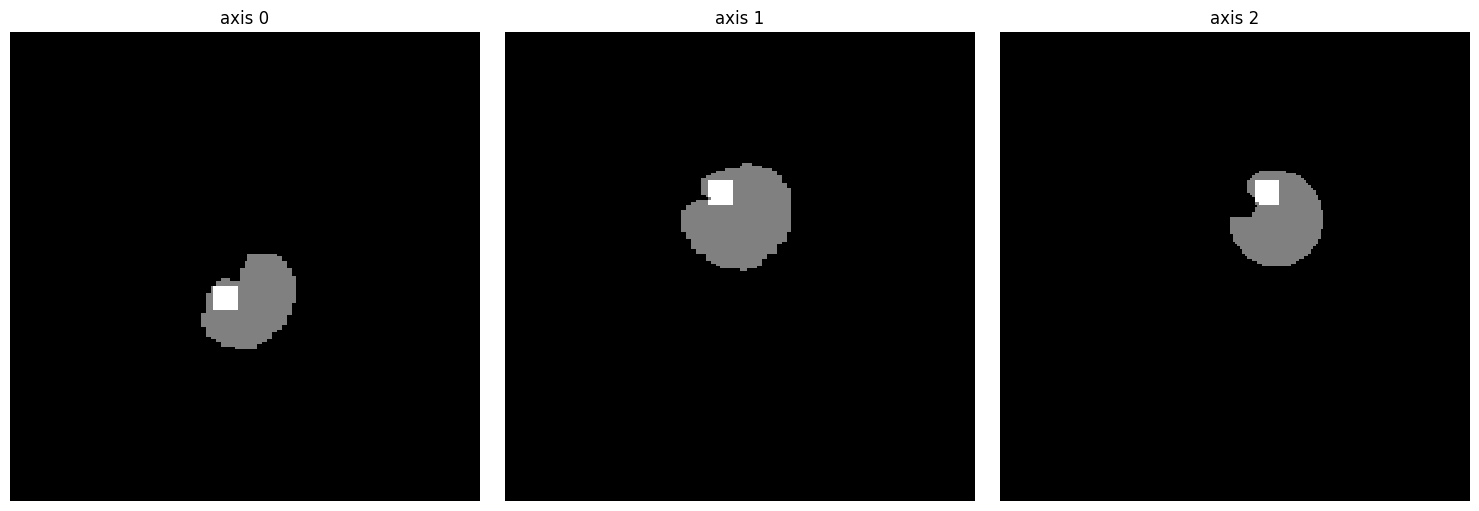

0.9890260631001372


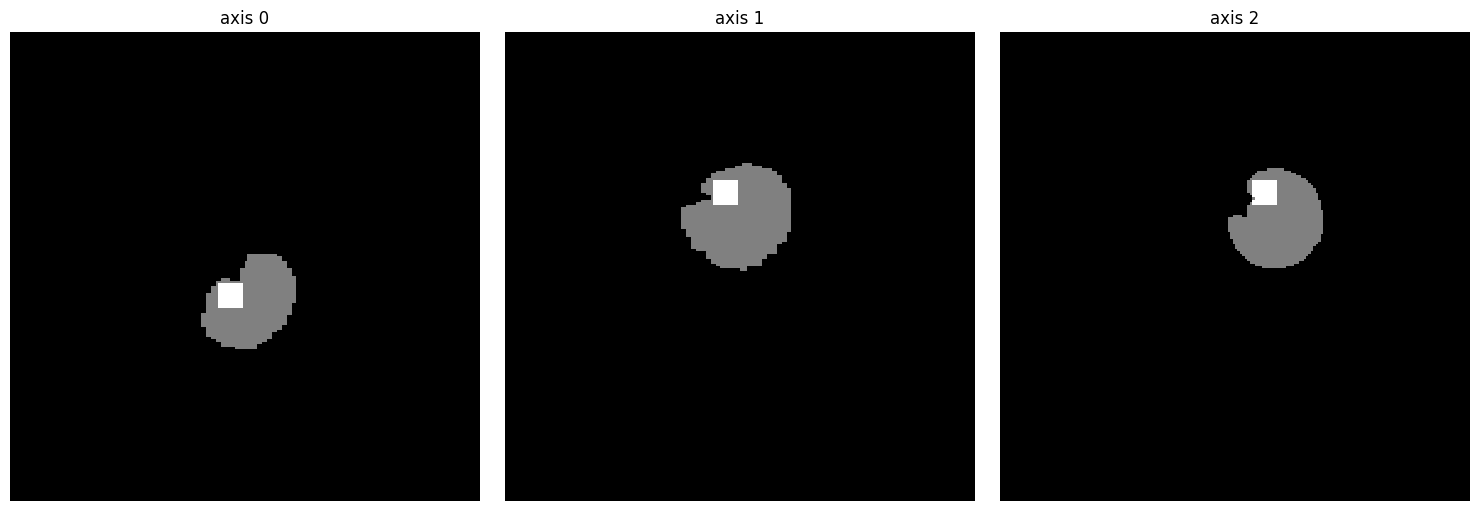

0.9862825788751715


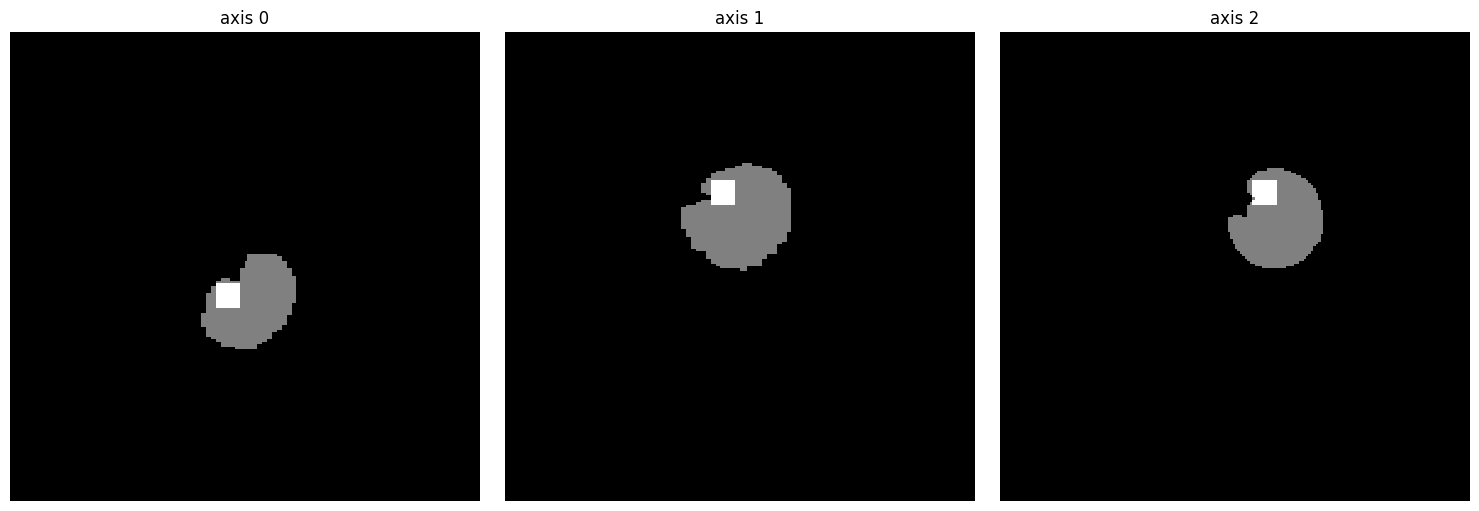

0.9602194787379973


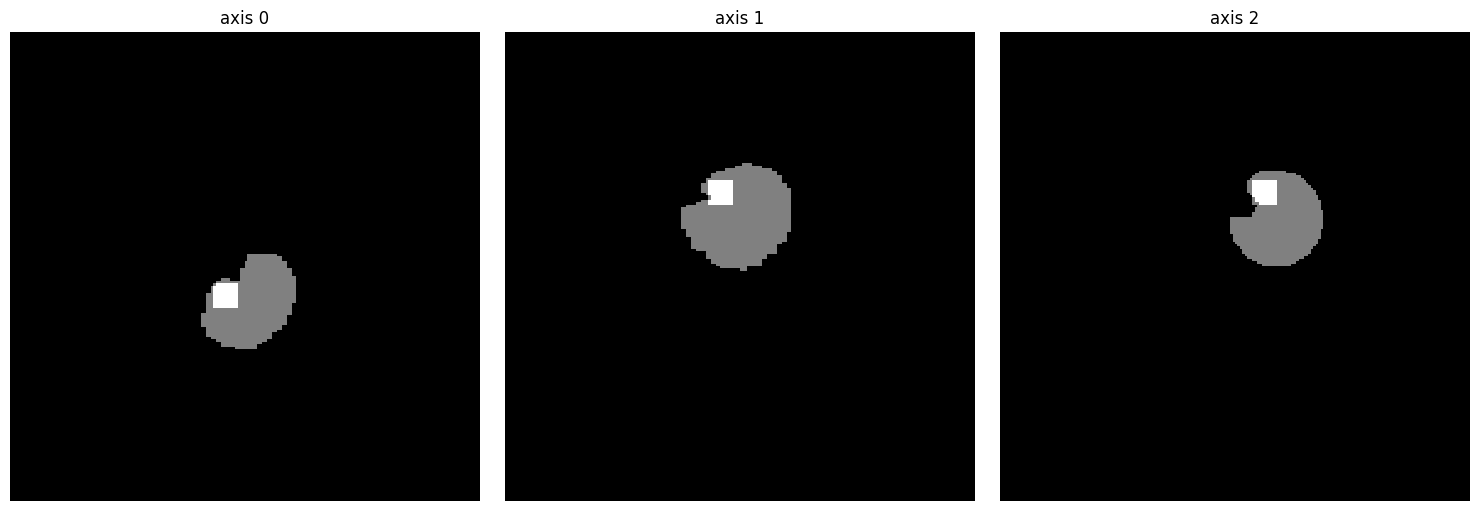

1.0


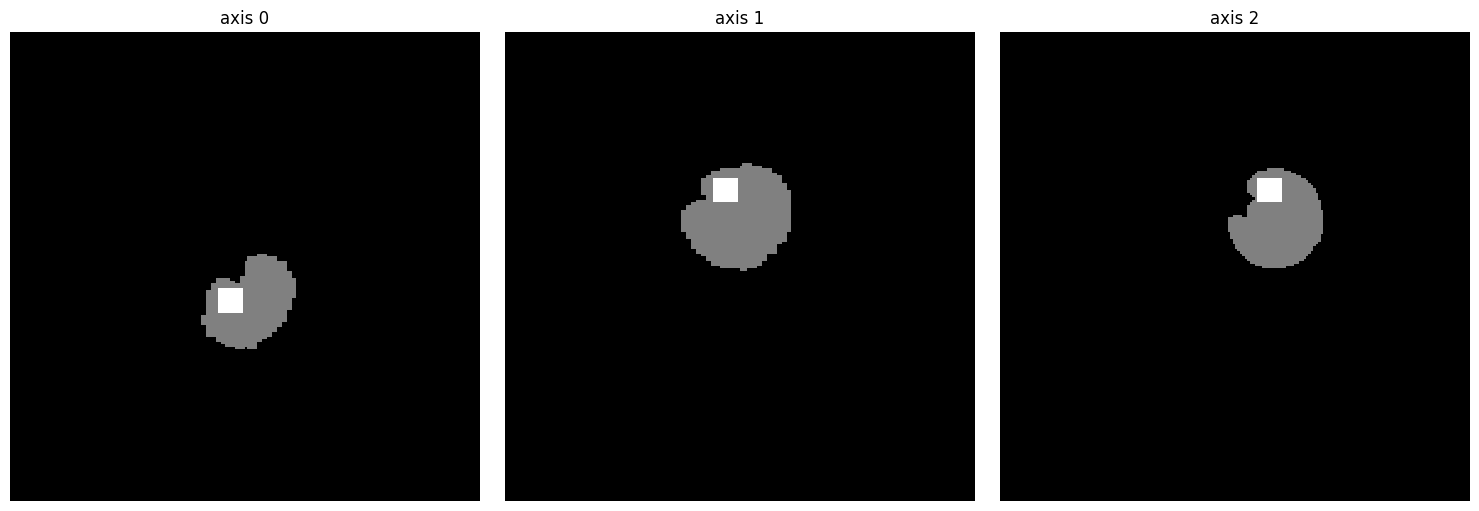

1.0


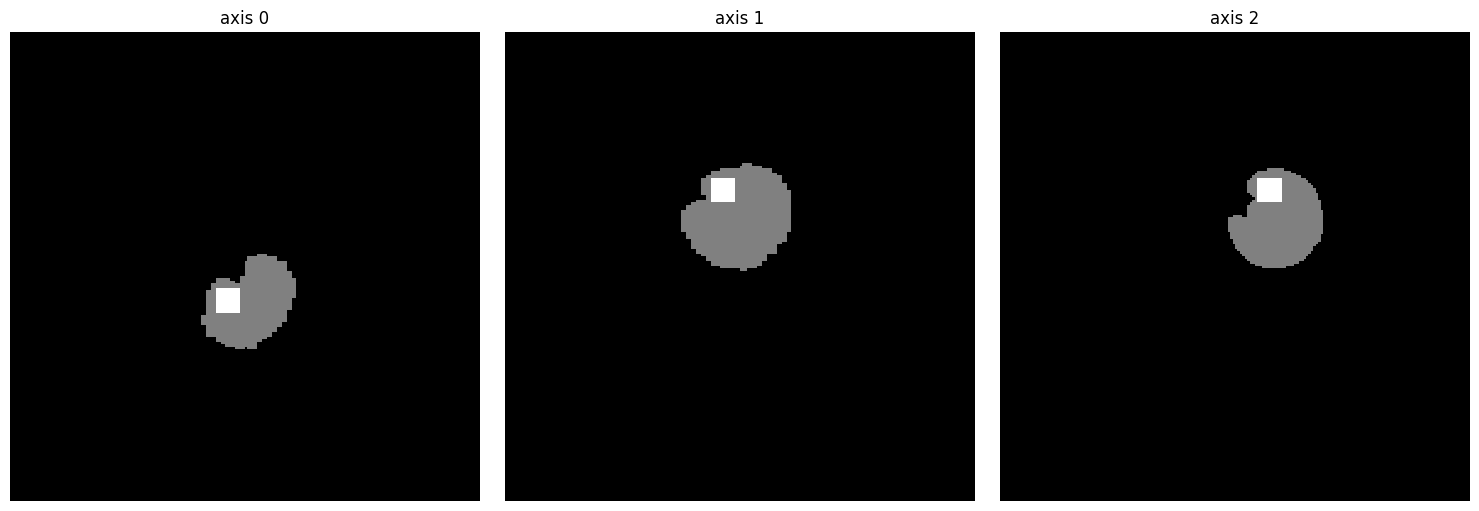

0.99039780521262


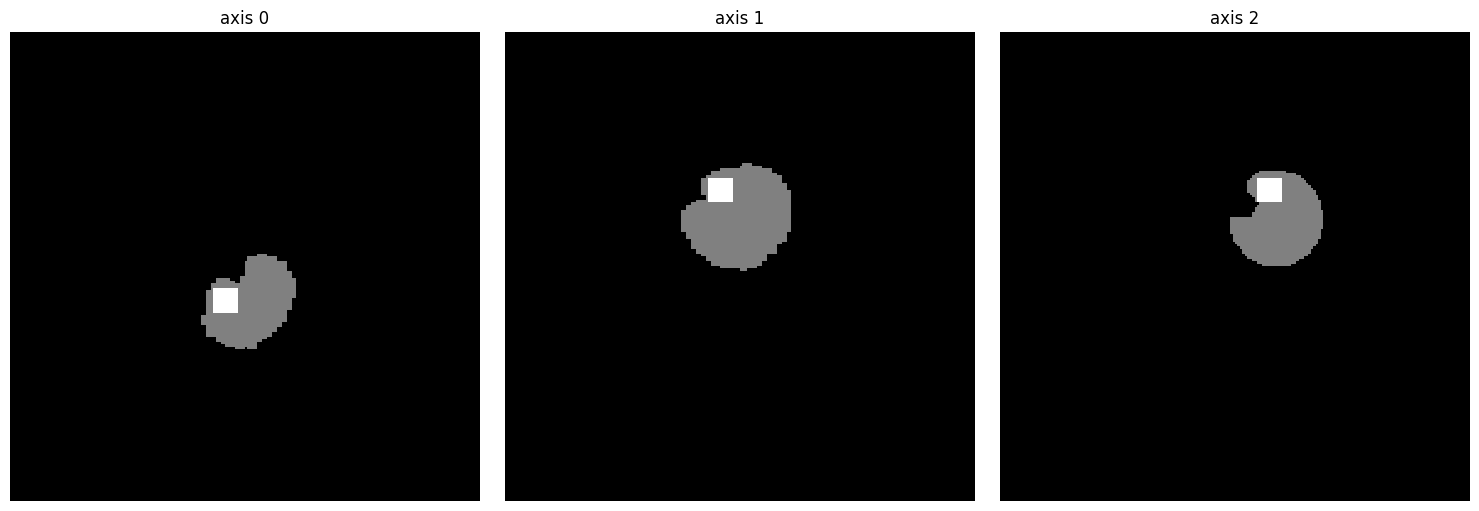

1.0


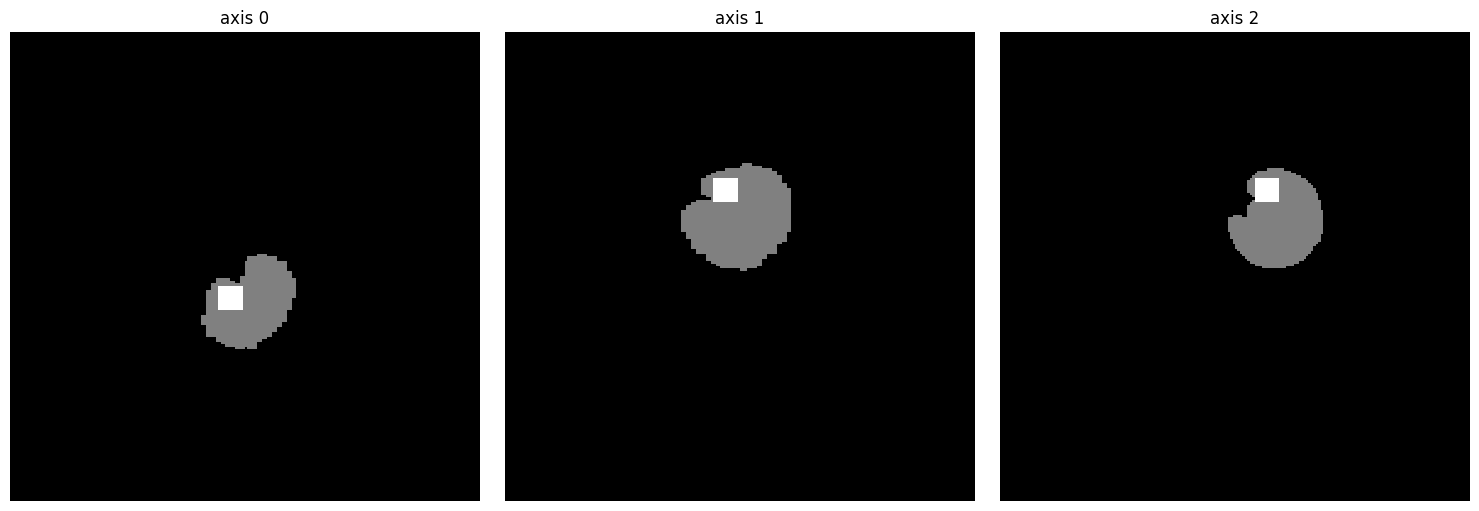

1.0


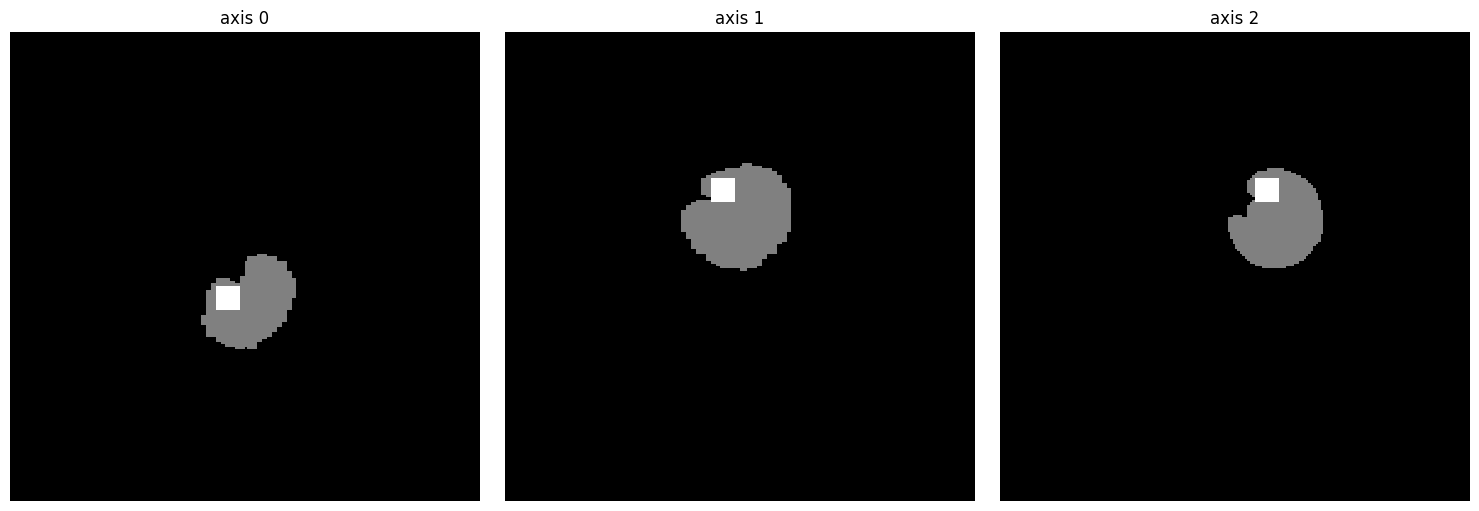

0.9862825788751715


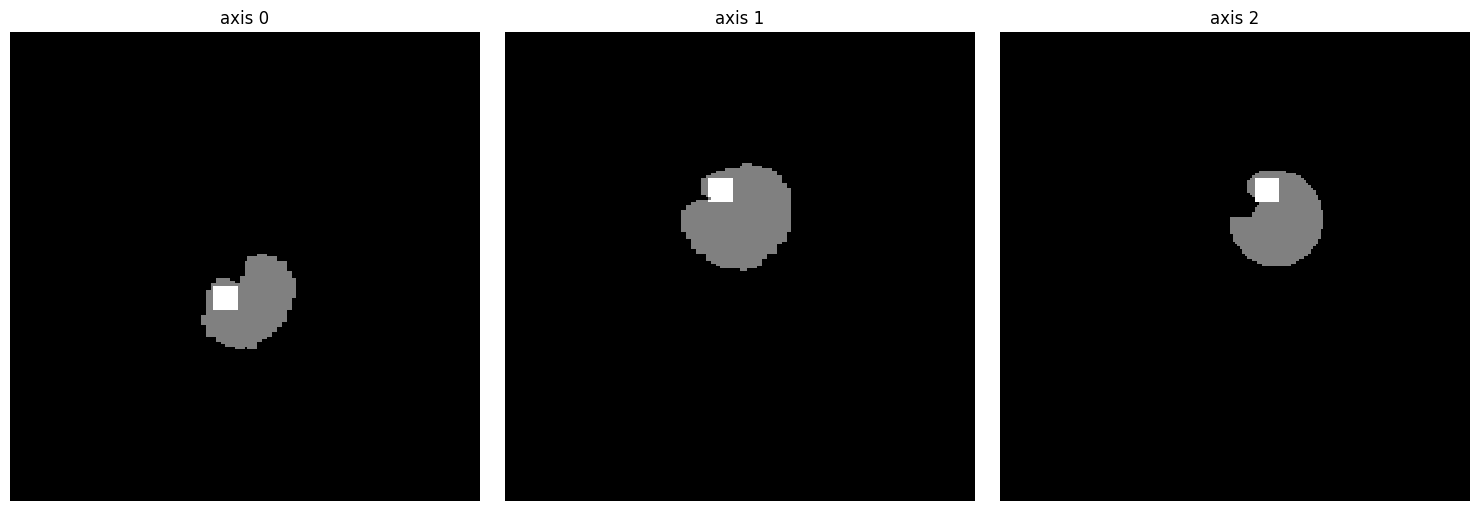

0.9931412894375857


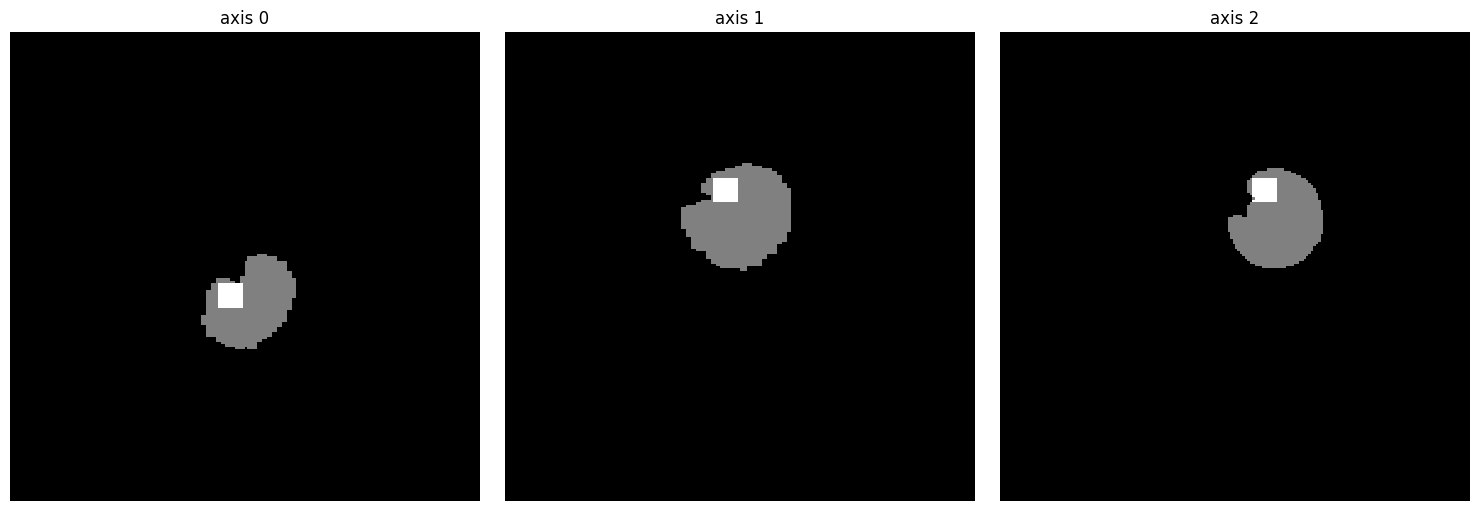

0.9917695473251029


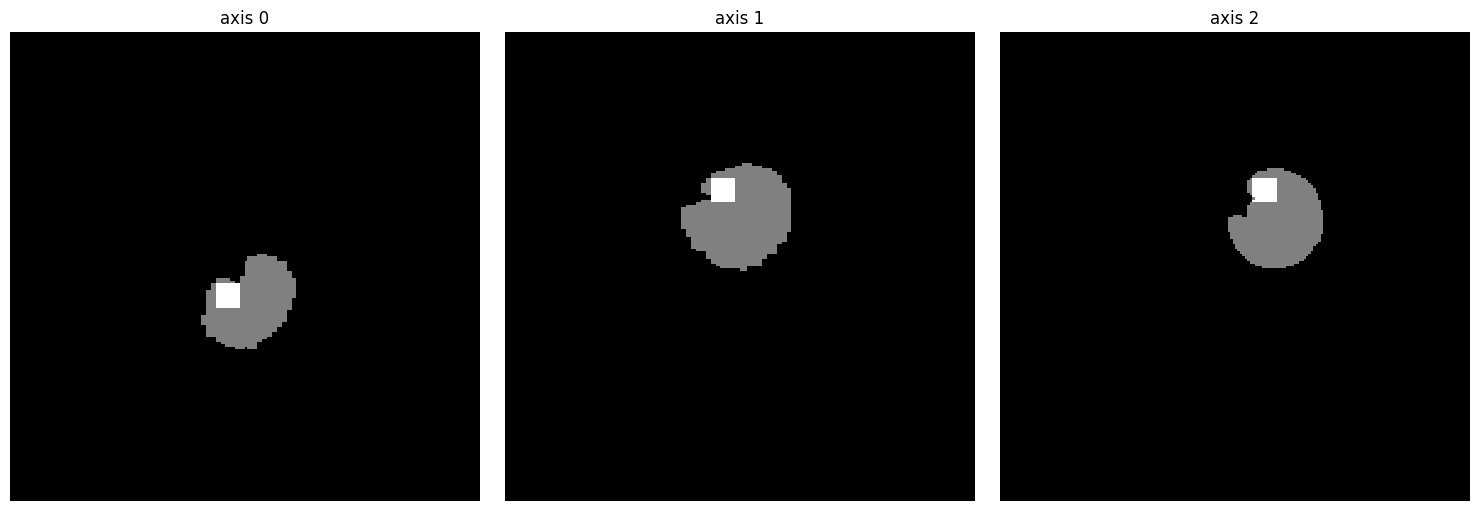

0.9684499314128944


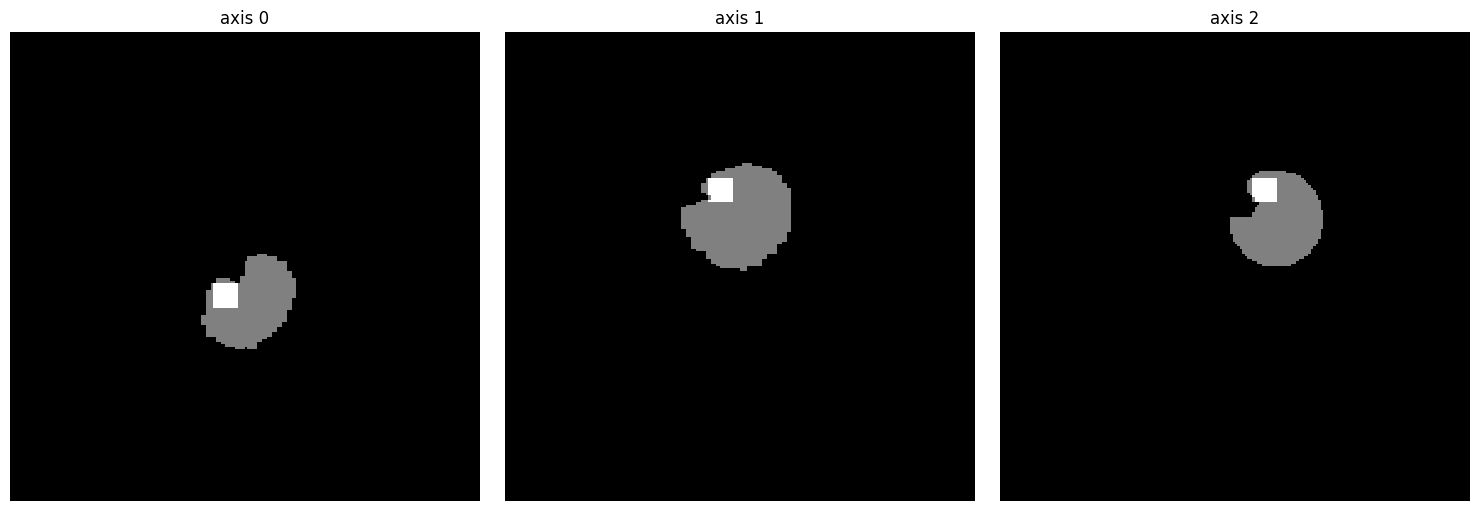

1.0


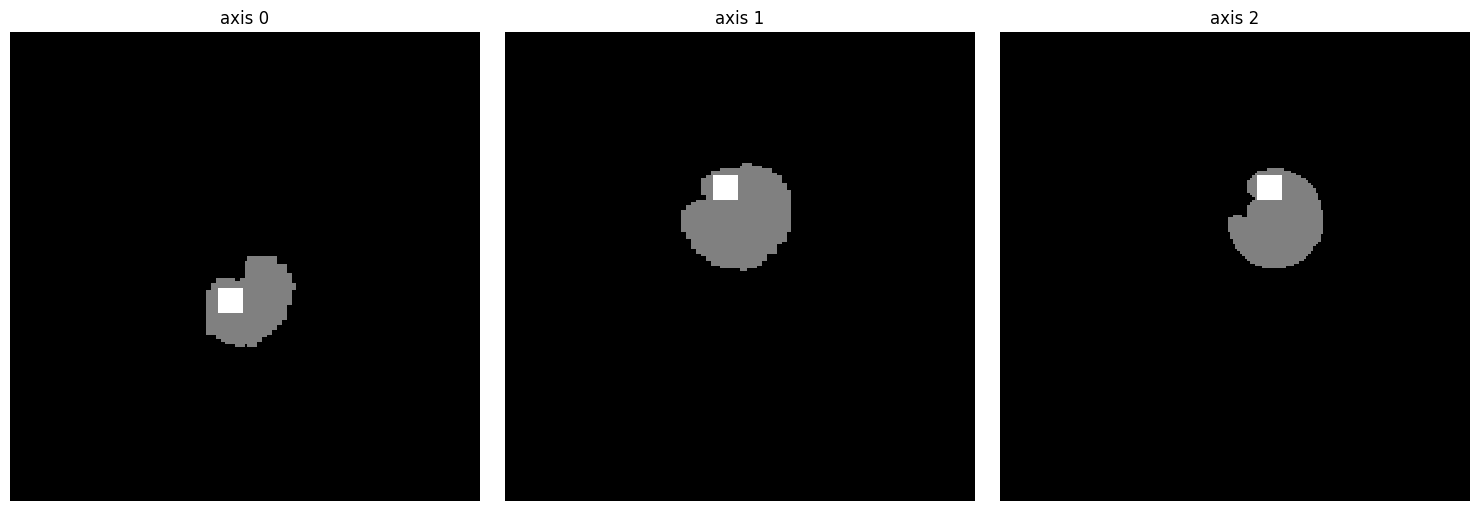

1.0


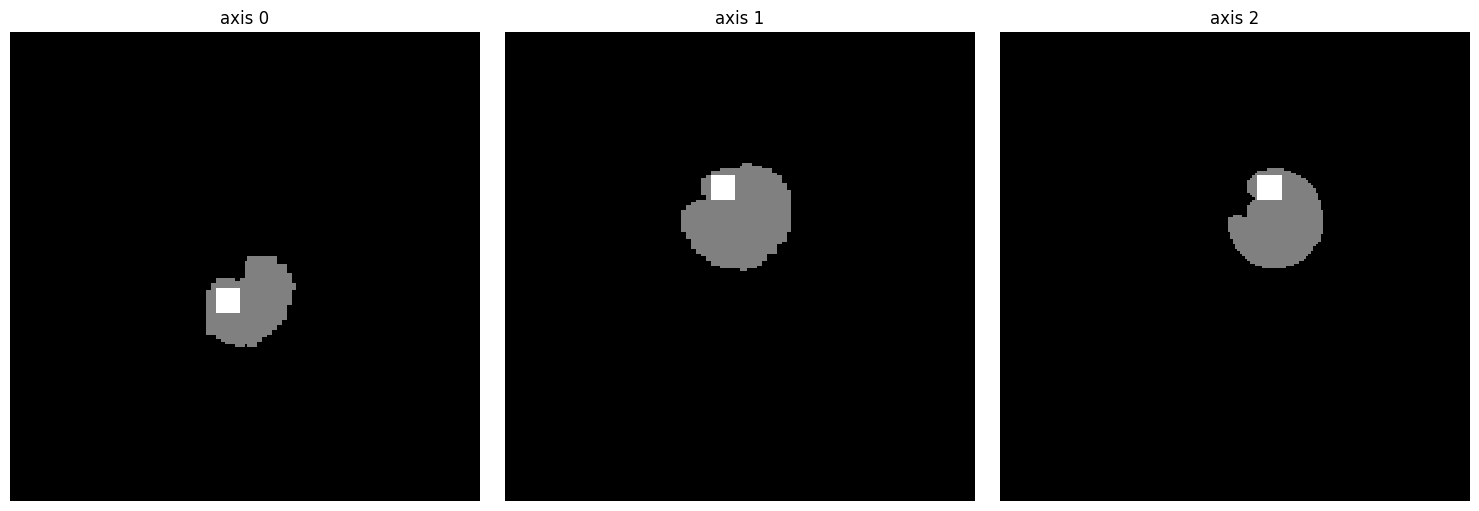

0.9917695473251029


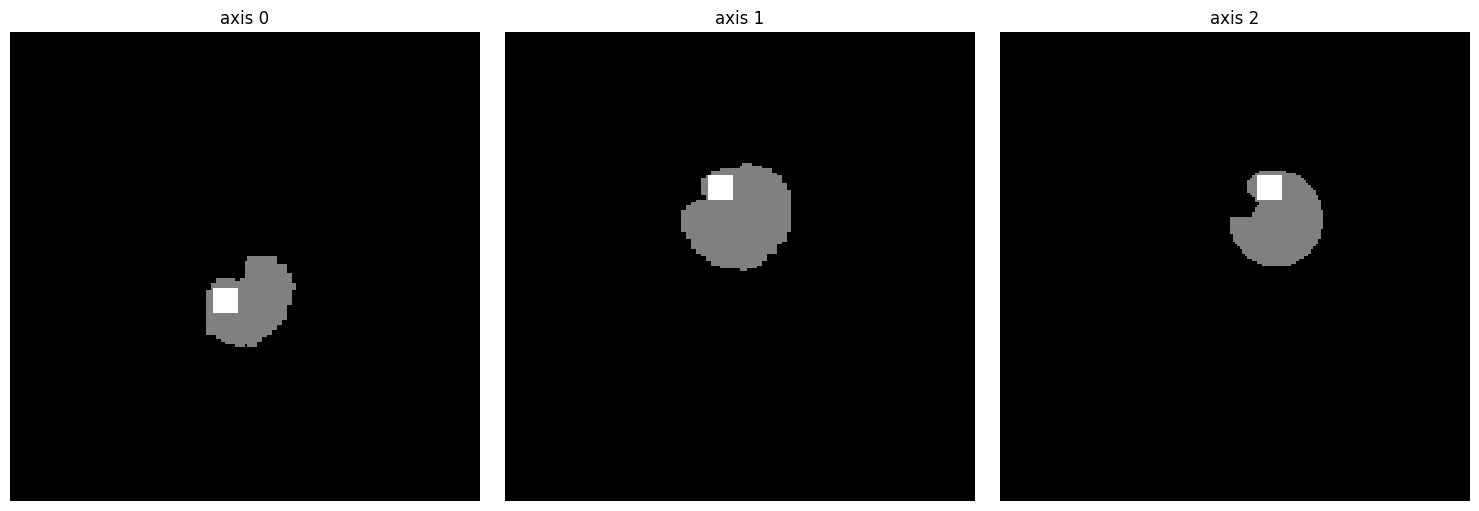

0.9986282578875172


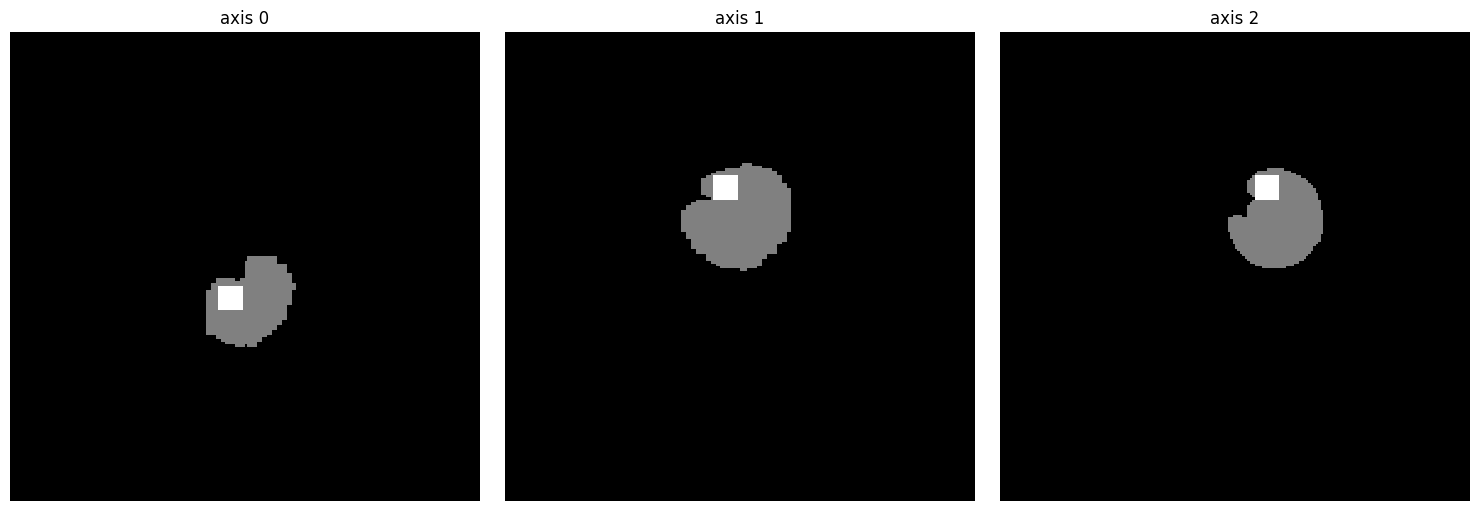

0.9972565157750343


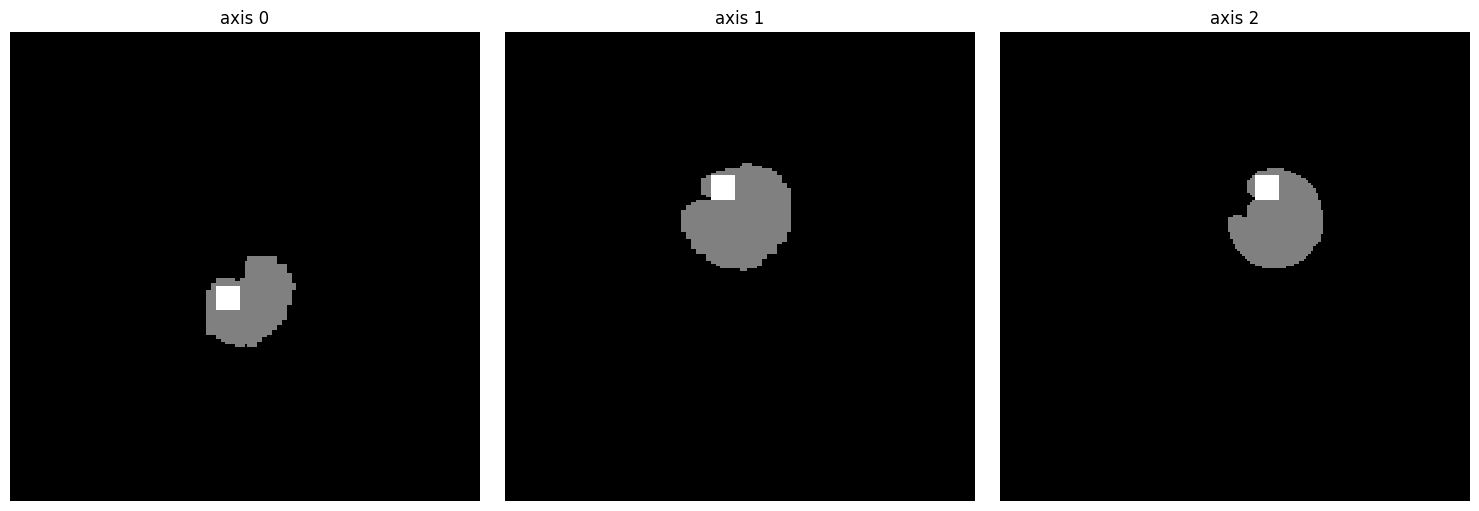

0.9849108367626886


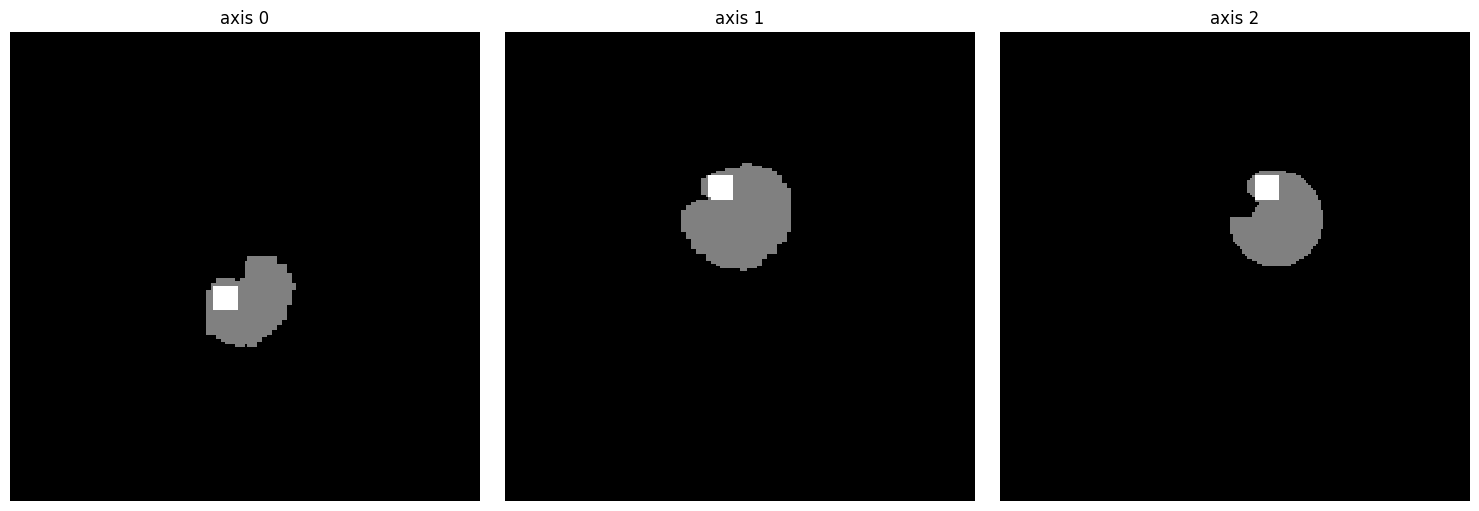

0.9972565157750343


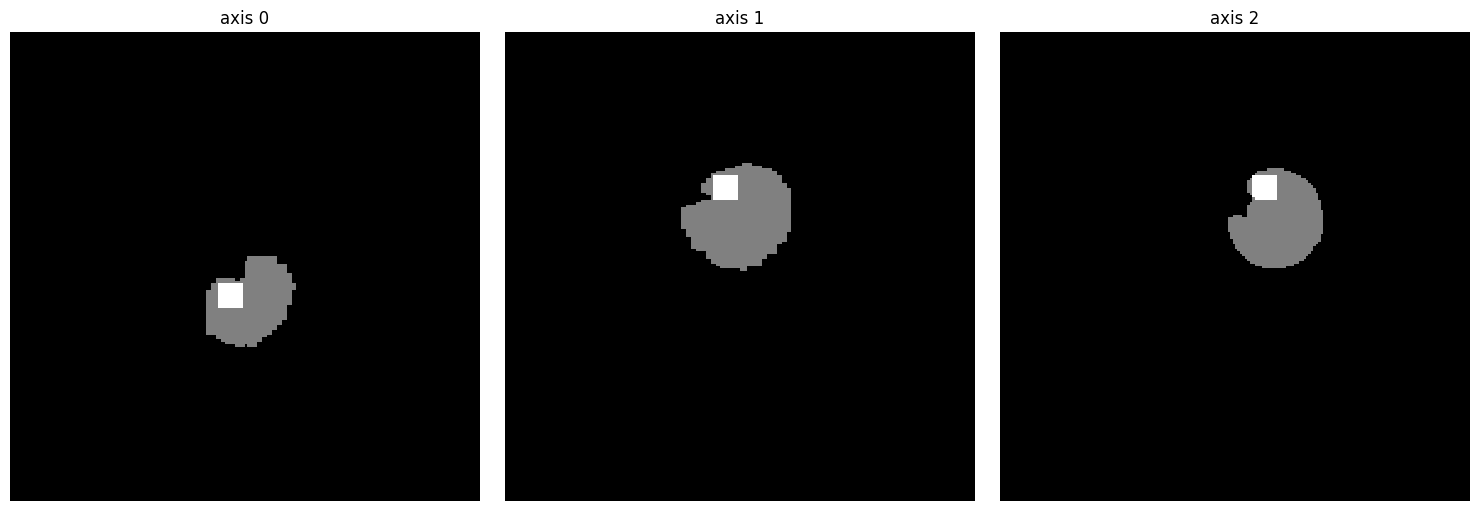

0.9945130315500685


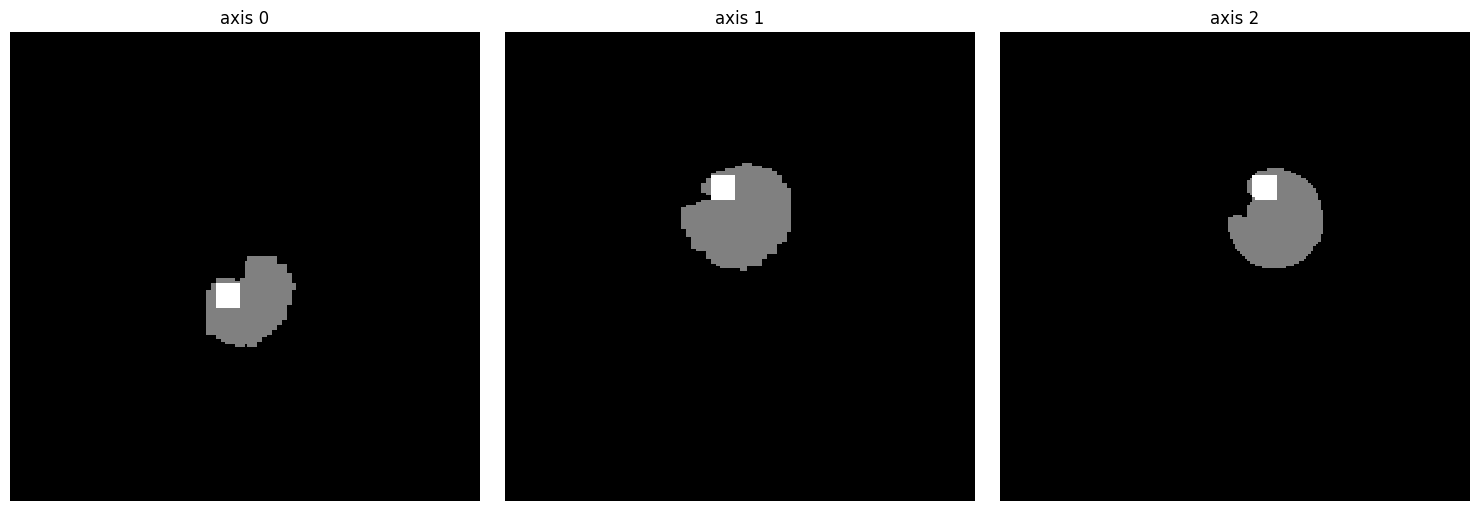

0.9725651577503429


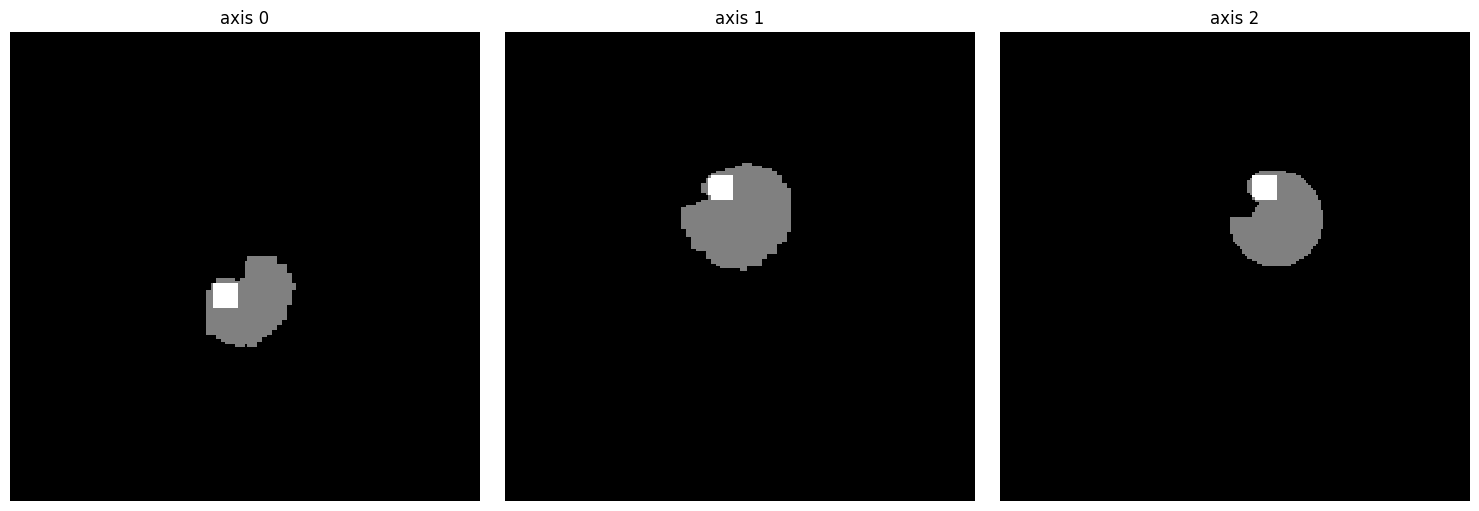

In [88]:
# x_db_calib
def calculate_iou(window, mask):
    xmin, ymin, zmin, xmax, ymax, zmax = window
    window_mask = np.zeros_like(mask)
    window_mask[xmin:xmax,  ymin:ymax, zmin:zmax] = 1

    # mask_non_zero = mask > 0
    intersection = np.logical_and(mask, window_mask).sum()
    box_volume = np.sum(window_mask)
    iou = intersection / box_volume if box_volume != 0 else 0
    return iou

    
i=32957
x_db_calib = load_db_calib_train_from_generator(positions[i], b, dim=12) 


box = np.zeros((192, 192, 192), dtype=int)
x1, y1, z1, x2, y2, z2 = positions[i]
box[x1:x2+1, y1:y2+1, z1:z2+1] = 1
# if calculate_iou(x_db_calib[i],b)!=None:
mean_slice_numbers = tuple(np.median(indices) for indices in np.where(box != 0))
ne.plot.volume3D(b+box,slice_nos=mean_slice_numbers)

for j in range(len(x_db_calib)):
    box = np.zeros((192, 192, 192), dtype=int)
    x1, y1, z1, x2, y2, z2 = x_db_calib[j]
    box[x1:x2+1, y1:y2+1, z1:z2+1] = 1
    mean_slice_numbers = tuple(np.median(indices) for indices in np.where(box != 0))
    print(calculate_iou(x_db_calib[j],b))
    # iou=calculate_iou(x_db_calib[j],b)
    # print(iou)
    ne.plot.volume3D(b+box,slice_nos=mean_slice_numbers)

# ne.plot.volume3D(box,slice_nos=mean_slice_numbers)

In [41]:
x_db_calib[0]

(58, 90, 74, 72, 104, 88)